# DISTRICT DE SANTE DE YOKO
## RAPPORT ANNUEL PBF

### Loading data and required package

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Bad key savefig.frameon in file c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log fi

In [2]:
scores = pd.read_csv('data/data_pbf_annuel_2022.csv')

In [3]:
scores.shape

(240, 283)

In [4]:
scores.isnull().sum()

organisationunitid                              0
organisationunitname                            0
organisationunitcode                            0
organisationunitdescription                    72
periodid                                        0
                                             ... 
QoC-PMA-Points - Plan d’action trimestriel    240
QoC-PMA-Points - Planification Familiale      240
QoC-PMA-Points - Salle d’hospitalisation      240
QoC-PMA-Points - Tuberculose                  240
QoC-PMA-Points - Vaccination                  240
Length: 283, dtype: int64

### Data preparation

In [5]:
# Import dictionnary where keys are old name of column and values are new and shortest column
from pbf_dict_columns import dict_cols

In [6]:
for c in scores.columns:
    print(c)

organisationunitid
organisationunitname
organisationunitcode
organisationunitdescription
periodid
periodname
periodcode
perioddescription
QOC-PMA-1.1-Carte sanitaire de l’aire de santé disponible et affichée (format A3 au moins)
QOC-PMA-1.10-Disponibilité de radio ou téléphone portable
QOC-PMA-1.11-Cuisine pour les patients hospitalisés est disponible et propre
QOC-PMA-1.12-Disponibilité d’une morgue/ chambre mortuaire
QOC-PMA-1.2-La carte sanitaire comporte les centres d’état civil principaux et secondaires de l’aire de santé
QOC-PMA-1.3-Rapports mensuels  (RMA, PEV, PTME PALU, SR,  AVP, CDV, MAPE hebdomadaire, grilles d’évaluation qualité des FOSA par le régulateur)
QOC-PMA-1.4-Au moins 80 % des recommandations formulées lors de l’évaluation qualité du trimestre dernier ont été appliqués
QOC-PMA-1.5-La FOSA a renseigné les données du RMA  pour les 3 derniers mois dans le DHIS 2 du SNIS au moins 80 % des recommandations formulées lors de l’évaluation qualité du trimestre dernier ont é

In [7]:
indicateurs = list(dict_cols.keys())

In [8]:
indicateurs

['organisationunitname',
 'periodname',
 'periodcode',
 'QOC-PMA-1.1-Carte sanitaire de l’aire de santé disponible et affichée (format A3 au moins)',
 'QOC-PMA-1.2-La carte sanitaire comporte les centres d’état civil principaux et secondaires de l’aire de santé',
 'QOC-PMA-1.3-Rapports mensuels  (RMA, PEV, PTME PALU, SR,  AVP, CDV, MAPE hebdomadaire, grilles d’évaluation qualité des FOSA par le régulateur)',
 'QOC-PMA-1.4-Au moins 80 % des recommandations formulées lors de l’évaluation qualité du trimestre dernier ont été appliqués',
 'QOC-PMA-1.5-La FOSA a renseigné les données du RMA  pour les 3 derniers mois dans le DHIS 2 du SNIS au moins 80 % des recommandations formulées lors de l’évaluation qualité du trimestre dernier ont été appliqués',
 'QOC-PMA-1.6-Horaire du travail et planning de garde disponible et affiché dans tous les services y compris le bureau du chef de centre',
 'QOC-PMA-1.7-La FOSA dispose d’un plan de développement d’infrastructure',
 'QOC-PMA-1.8-Procès-verbal d

In [9]:
new_indicateurs = list(dict_cols.values())

In [10]:
new_indicateurs

['FOSA',
 'période',
 'Trimestre',
 'carte sanitaire',
 "carte sanitaire et centre d'état civil",
 'rapports mensuels',
 ' 80 % recommandations qualité',
 'trois RMA dans DHIS2',
 'horaire et planning travail',
 "plan d'infrastructures",
 'PV reunions mensuelles',
 'fiches de référence',
 'téléphone portable',
 'cuisine',
 'morgue',
 'BP disponible',
 "plan d'action avec acteurs",
 "rapport d'analyse BP",
 ' 80 % des 5 problèmes clés',
 'documents financiers bien tenus',
 'revenus inférieur à 60 % recettes',
 'critères de primes connus de tous',
 'clôture disponible',
 'pou dans la cour',
 'tri de déchet',
 'latrines et toilettes suffisantes',
 'douches suffisantes',
 'incinérateur',
 'fosse à déchet',
 'Propreté de la cour',
 'entretien de la cour',
 'sterilisationselon les normes',
 'hygiène salle de soins',
 "bonne condition d'attente pour CE",
 'tarifs affichés',
 'système de tri CE',
 'salle de CE en bon état',
 'confidentialité de la CE',
 'salle de CE éclairée',
 'CE par IDE',
 

In [11]:
# Function which return the category according to the indicator. Indicator with the same begining belong to same category 
def get_category(indicator):
    col = indicator.split('.')[0]
    if col == "QOC-PMA-1":
        return "Indicateurs généraux"
    elif col == "QOC-PMA-2":
        return "Business plan trimestriel"
    elif col == "QOC-PMA-3":
        return "Partie financière"
    elif col == "QOC-PMA-4":
        return "Hygiène et stérilisation"        
    elif col == "QOC-PMA-5":
        return "Consultation externe"
    elif col == "QOC-PMA-6":
        return "Planification familiale"  
    elif col == "QOC-PMA-7":
        return "Laboratoire"
    elif col == "QOC-PMA-8":
        return "Salle d'hospitalisation"
    elif col == "QOC-PMA-9":
        return "Gestion des médicaments"
    elif col == "QOC-PMA-10":
        return "Médicaments traceurs"
    elif col == "QOC-PMA-11":
        return "Maternité"
    elif col == "QOC-PMA-12":
        return "Petite chirurgie"
    elif col == "QOC-PMA-13":
        return "TB"
    elif col == "QOC-PMA-14":
        return "Vaccination"
    elif col == "QOC-PMA-15":
        return "CPN"
    elif col == "QOC-PMA-16":
        return "VIH"
    elif col == "QOC-PMA-17":
        return "PBF communautaire"
    elif col == "QOC-PMA-18":
        return "Malnutrition"
    elif col == "QOC-PMA-19":
        return "Etat civil"
    else:
        return "Infos_FOSA_periode"

In [12]:
# create a dictionnary where keys are indicators and values are categories
dict_cat = {}
for c in indicateurs:
    if get_category(c):
        dict_cat[c] = get_category(c)

In [13]:
unique_categories = set(dict_cat.values())

In [14]:
unique_categories = list(unique_categories)

In [15]:
unique_categories

['Consultation externe',
 'Médicaments traceurs',
 'Gestion des médicaments',
 'Petite chirurgie',
 'Vaccination',
 'PBF communautaire',
 'Planification familiale',
 'Infos_FOSA_periode',
 'Indicateurs généraux',
 'Maternité',
 'Laboratoire',
 "Salle d'hospitalisation",
 'Etat civil',
 'TB',
 'Hygiène et stérilisation',
 'Malnutrition',
 'Partie financière',
 'CPN',
 'VIH',
 'Business plan trimestriel']

In [16]:
# function that return a list of indicator belonging to same category
def get_category_indicator_list(cat):
    ind_cat_list = []
    for k, v in dict_cat.items():
        if v == cat:
            ind_cat_list.append(k)
    return ind_cat_list

### Create 19 list of indicators. Each list gather indicators of same category. We add 2 others lists. a list of mother and child indicators and another list for all indicators.

In [17]:
indicateurs_cs_externe_list = get_category_indicator_list("Consultation externe")

In [18]:
indicateurs_pf_list = get_category_indicator_list('Planification familiale')

In [19]:
indicateurs_labo_list = get_category_indicator_list("Laboratoire")

In [20]:
indicateurs_hospi_list = get_category_indicator_list("Salle d'hospitalisation")

In [21]:
indicateurs_gest_med_list = get_category_indicator_list("Gestion des médicaments")

In [22]:
indicateurs_med_traceurs_list = get_category_indicator_list("Médicaments traceurs")

In [23]:
indicateurs_maternite_list = get_category_indicator_list("Maternité")

In [24]:
indicateurs_petite_chirurgie_list = get_category_indicator_list("Petite chirurgie")

In [25]:
indicateurs_TB_list = get_category_indicator_list("TB")

In [26]:
indicateurs_vaccinations_list = get_category_indicator_list("Vaccination")

In [27]:
indicateurs_cpn_list = get_category_indicator_list("CPN")

In [28]:
indicateurs_vih_list = get_category_indicator_list("VIH")

In [29]:
indicateurs_pbf_communautaire_list = get_category_indicator_list("PBF communautaire")

In [30]:
indicateurs_malnutrition_list = get_category_indicator_list("Malnutrition")

In [31]:
indicateurs_etat_civil_list = get_category_indicator_list("Etat civil")

In [32]:
indicateurs_generaux_list = get_category_indicator_list("Indicateurs généraux")

In [33]:
indicateurs_FOSA_periode_list = get_category_indicator_list("Infos_FOSA_periode")

In [34]:
indicateurs_business_plan_trimestriel_list = get_category_indicator_list("Business plan trimestriel")

In [35]:
indicateurs_partie_financière_list = get_category_indicator_list("Partie financière")

In [36]:
indicateurs_hygiene_sterilisation_list = get_category_indicator_list("Hygiène et stérilisation")

In [37]:
indicateurs_sante_mere_enfant = indicateurs_pf_list + indicateurs_maternite_list + indicateurs_vaccinations_list + indicateurs_cpn_list

In [38]:
indicateurs_all_cat_list = indicateurs_business_plan_trimestriel_list + indicateurs_cpn_list + indicateurs_cs_externe_list + indicateurs_etat_civil_list + indicateurs_generaux_list + indicateurs_gest_med_list + indicateurs_hospi_list + indicateurs_hygiene_sterilisation_list + indicateurs_labo_list + indicateurs_malnutrition_list + indicateurs_maternite_list + indicateurs_med_traceurs_list + indicateurs_partie_financière_list + indicateurs_pbf_communautaire_list + indicateurs_petite_chirurgie_list + indicateurs_pf_list + indicateurs_vaccinations_list + indicateurs_vih_list

In [39]:
indicateurs_all_cat_list

['QOC-PMA-2.1-Business plan trimestriel de la FS disponible et accessible',
 'QOC-PMA-2.2-Plan d’action élaboré avec les acteurs clés',
 'QOC-PMA-2.3-Rapports mensuels d’analyse de réalisations du business plan',
 'QOC-PMA-2.4-Les cinq problèmes clés du Business Plan du trimestre dernier ont été réalisés à au moins 80%',
 'QOC-PMA-15.1-Plan de préparation à l’accouchement disponible et suivis',
 'QOC-PMA-15.2-Pèse personne bien réglé à zéro (pèse personne propre pour la CPN)',
 'QOC-PMA-15.3-Ruban PB disponible et en bon état (bonne lisibilité)',
 "QOC-PMA-15.4-Détermination de l'état nutritionnel de toute femme en CPN",
 'QOC-PMA-15.5-Fiche CPN (pour la FS) disponible et bien remplie',
 'QOC-PMA-15.6-Fiche et Registre CPN (pour la FS) montre l’administration de Fer Folate), TPI et VAT',
 'QOC-PMA-15.7-Carnet de la CPN (pour la maman) disponible',
 'QOC-PMA-15.8-Registre de la CPN disponible et bien rempli',
 'QOC-PMA-5.1-Bonnes conditions d’attente pour la Consultation Externe',
 'QOC

In [40]:
list_facilities = scores['organisationunitname'].unique()

In [41]:
list_facilities

array(['CENTRE SANTE INTEGRE  de GAH', 'CMA Ngambe Tikar',
       'CSI BENG-BENG', 'CSI Doume', 'CSI Kong', 'CSI Linte',
       'CSI Mangaï', 'CSI Mankim', 'CSI Minfoumbe', 'CSI Nditam',
       'CMA NDJOLE', 'Cabinet de soins Denise Ngambe Tikar',
       'Centre Santé les Premices', 'Centre de santé la Grâce de OUE',
       "Centre de santé privé  de l'eglise Lutherienne de Ngambe Tikar",
       'Centre de santé privé EEC Ngambe Tikar',
       'Centre de santé privé protestant Yoko', 'Family Health Care',
       'Infirmerie de la Prison Yoko',
       'Centre de Sante Omega Health  Care'], dtype=object)

In [42]:
# We drop two health facilities "Centre de santé de la Grâce de OUE" and "CMA NDJOLE                                                                                    "
scores.drop(scores[scores['organisationunitname'] == "Centre de santé la Grâce de OUE"].index, inplace=True)
scores.drop(scores[scores['organisationunitname'] == "CMA NDJOLE"].index, inplace=True)

In [43]:
scores.shape

(216, 283)

In [44]:
# Function which return dataframe with column(indicator) belong to one category
def get_dataframe(df, list_cat_ind, indicateurs_FOSA_periode_list):
    # Slicing dataframe with the desired column
    df_new = df[list_cat_ind + indicateurs_FOSA_periode_list]
    # Create 2 new columns from 1 other column by slicing the value differently 
    df_new['Trim'] = df_new['periodcode'].str[-1]
    df_new['Year'] = df_new['periodcode'].str[:4]
    # Change the column name and return a new dataframe
    df_new = df_new.rename(columns=dict_cols)
    return df_new

In [45]:
# function which transform wide form data to long form
def get_dataframe_to_plot(dataframe):
    # drop 2 columns and set index with 3 columns
    score_df = dataframe.drop(['période', 'Trimestre'], axis=1).set_index(['FOSA', 'Trim', 'Year'])
    # get a series by summing each row of all columns
    score_series = score_df.sum(axis=1)
    # name this series as score
    score_series.name = "score"
    # transform series to dataframe
    score_df = score_series.to_frame()
    # reset index
    score_df = score_df.reset_index()
    # return dataframe
    return score_df

In [46]:
# Custom function to draw horizontal line representing max value of a category score
def add_max_score(score_max=None, **kws):
    if not score_max:
        return
    m = score_max
    ax = plt.gca()
    ax.axhline(m, color='green', ls='--')

In [47]:
indicateurs_name_list = ["pbf_com",  "business plan", "cs ext", "cpn", "etat civil", "finances", "gestion med", 
                         "hospitalisation", "hygiène", "indicateurs généraux", "laboratoire", "malnutrition", 
                         "maternite", "med traceurs", "petite chirurgie", "planning familial", "vaccination",
                         "vih", "mère enfant", "total"]

In [48]:
categories_list = [indicateurs_pbf_communautaire_list,  indicateurs_business_plan_trimestriel_list, 
                   indicateurs_cs_externe_list, indicateurs_cpn_list, indicateurs_etat_civil_list, 
                   indicateurs_partie_financière_list, indicateurs_gest_med_list, indicateurs_hospi_list, 
                   indicateurs_hygiene_sterilisation_list, indicateurs_generaux_list, indicateurs_labo_list,
                   indicateurs_malnutrition_list, indicateurs_maternite_list, indicateurs_med_traceurs_list,
                   indicateurs_petite_chirurgie_list, indicateurs_pf_list, indicateurs_vaccinations_list,
                   indicateurs_vih_list, indicateurs_sante_mere_enfant, indicateurs_all_cat_list]

In [49]:
score_max_list = [13, 10, 40, 16, 15, 8, 15, 10, 22, 20, 10, 16, 33, 15, 5, 25, 24, 20, 98,317]

In [50]:
scores_labo = get_dataframe(scores, indicateurs_labo_list, indicateurs_FOSA_periode_list)
scores_labo_to_print = get_dataframe_to_plot(scores_labo)
scores_labo_to_print

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    7.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    7.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

# Evolution des scores par trimestre pour les années 2019, 2020, 2021 pour chaque FOSA

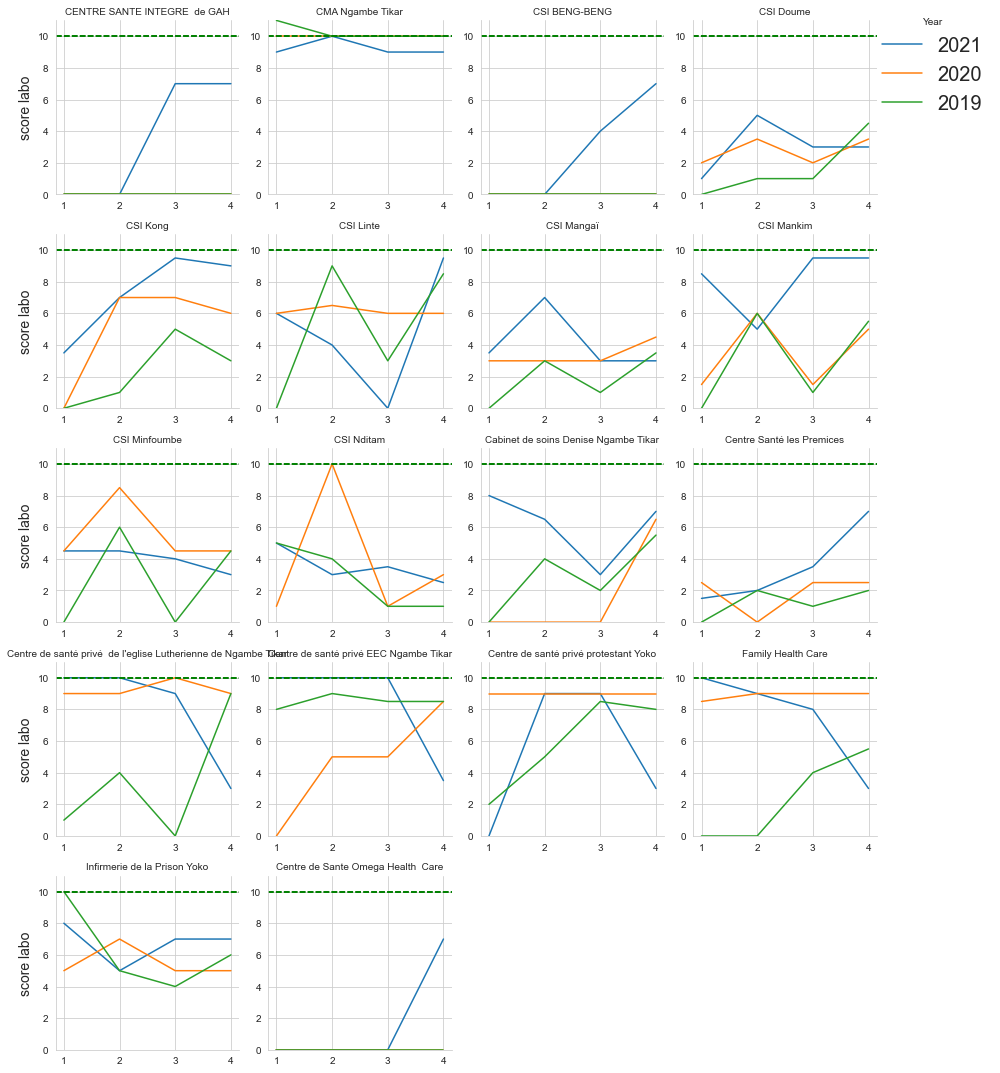

In [51]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_labo_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,11], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=10)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score labo', fontsize=14);
g.savefig("images/Performance_evolution/labo")

In [52]:
scores_vaccination = get_dataframe(scores, indicateurs_vaccinations_list, indicateurs_FOSA_periode_list)
scores_vaccination_to_print  = get_dataframe_to_plot(scores_vaccination)
scores_vaccination_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   15.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   15.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

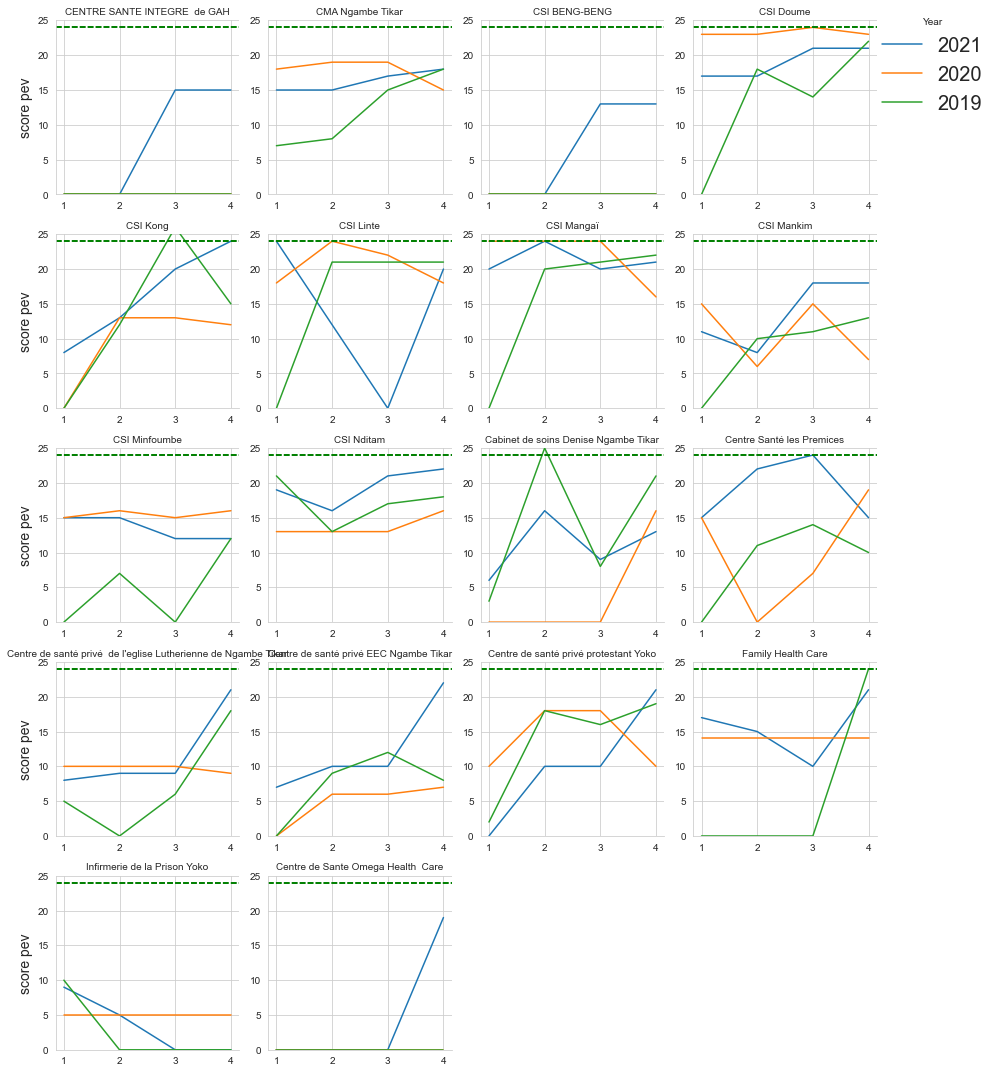

In [53]:
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_vaccination_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,25], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=24)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score pev', fontsize=14);
g.savefig("images/Performance_evolution/vaccination")

In [54]:
scores_indicateurs_generaux  = get_dataframe(scores, indicateurs_generaux_list, indicateurs_FOSA_periode_list)
scores_indicateurs_generaux_to_print   = get_dataframe_to_plot(scores_indicateurs_generaux)
scores_indicateurs_generaux_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   10.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   10.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

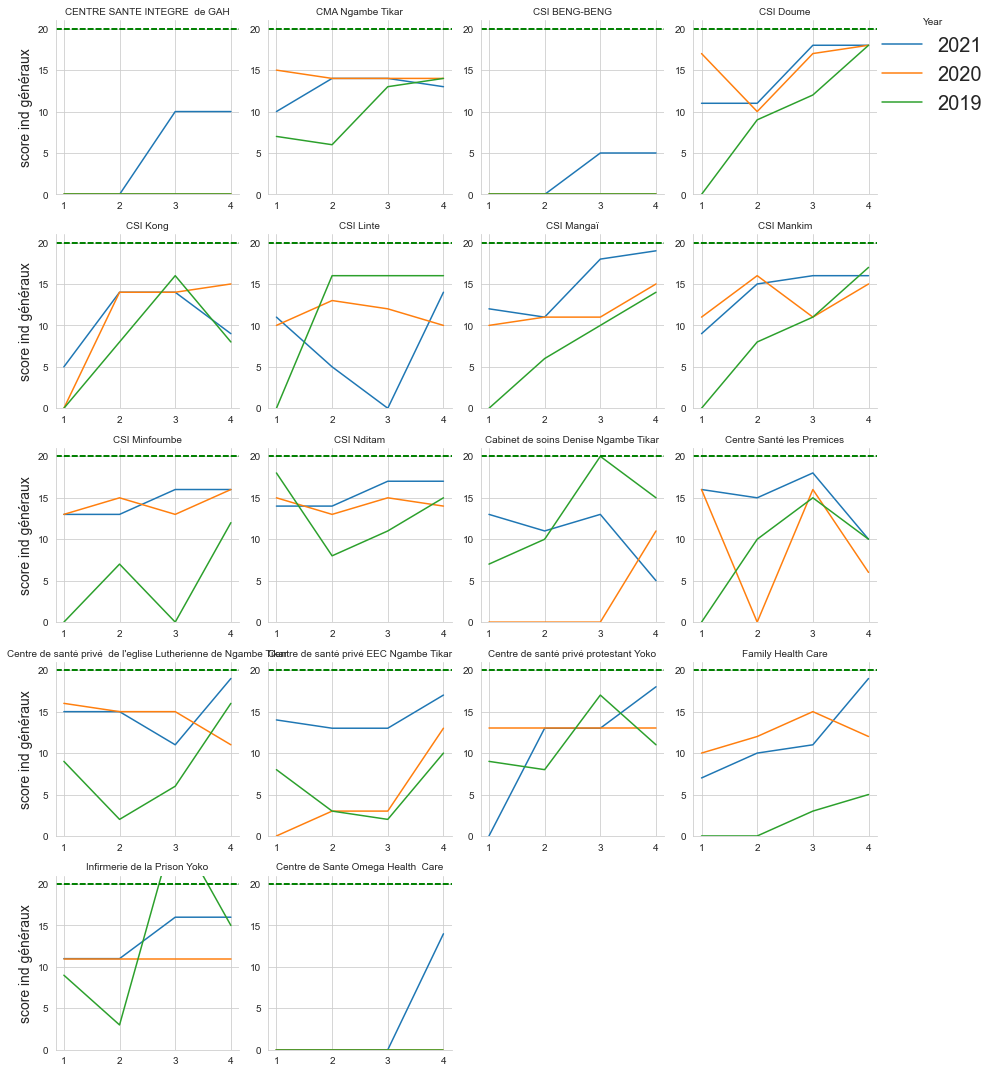

In [55]:
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_indicateurs_generaux_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,21], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=20)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score ind généraux', fontsize=14);
g.savefig("images/Performance_evolution/ind_generaux")

In [56]:
scores_petite_chirurgie  = get_dataframe(scores, indicateurs_petite_chirurgie_list, indicateurs_FOSA_periode_list)
scores_petite_chirurgie_to_print = get_dataframe_to_plot(scores_petite_chirurgie)
scores_petite_chirurgie_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    5.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    6.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

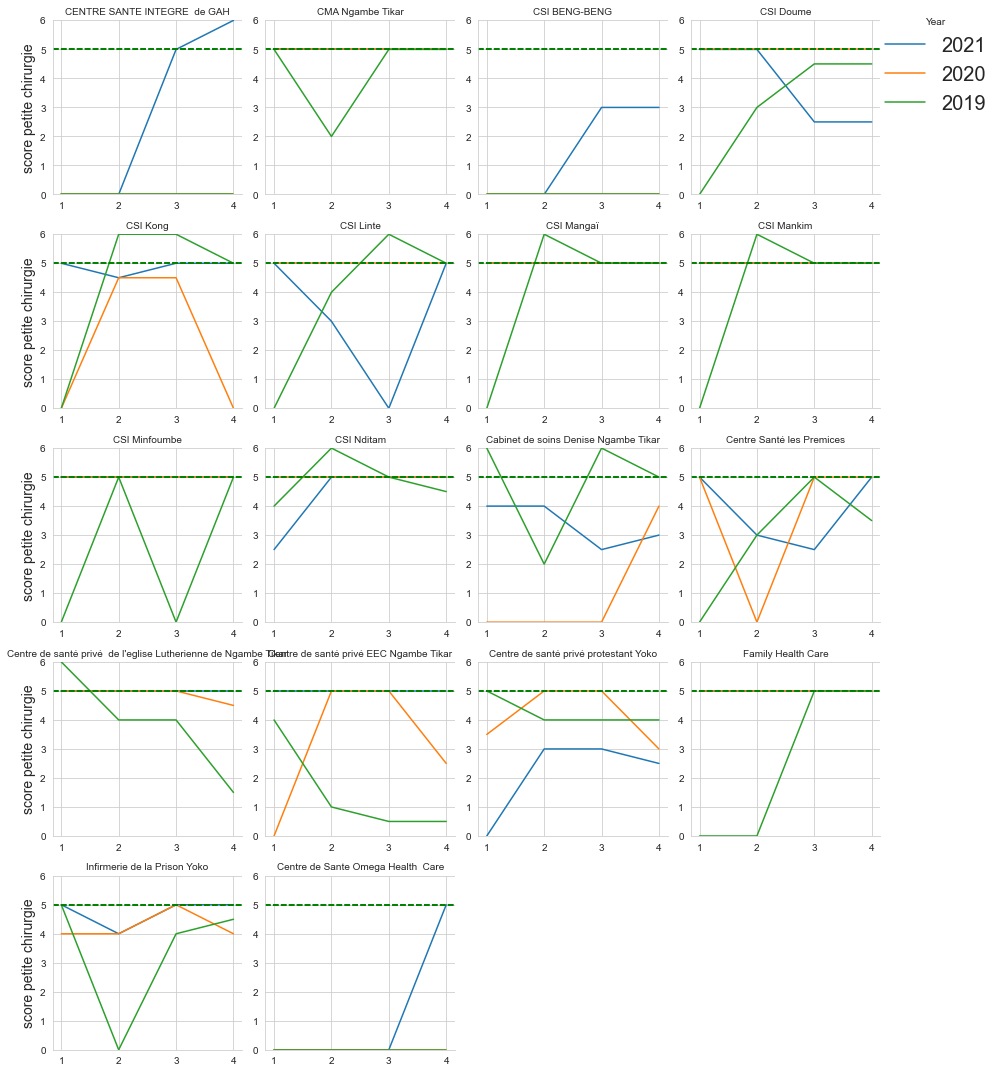

In [57]:
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_petite_chirurgie_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,6], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=5)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score petite chirurgie', fontsize=14);
g.savefig("images/Performance_evolution/petite_chirurgie")

In [58]:
scores_malnutrition = get_dataframe(scores, indicateurs_malnutrition_list, indicateurs_FOSA_periode_list)
scores_malnutrition_to_print = get_dataframe_to_plot(scores_malnutrition)
scores_malnutrition_to_print  

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    0.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    0.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

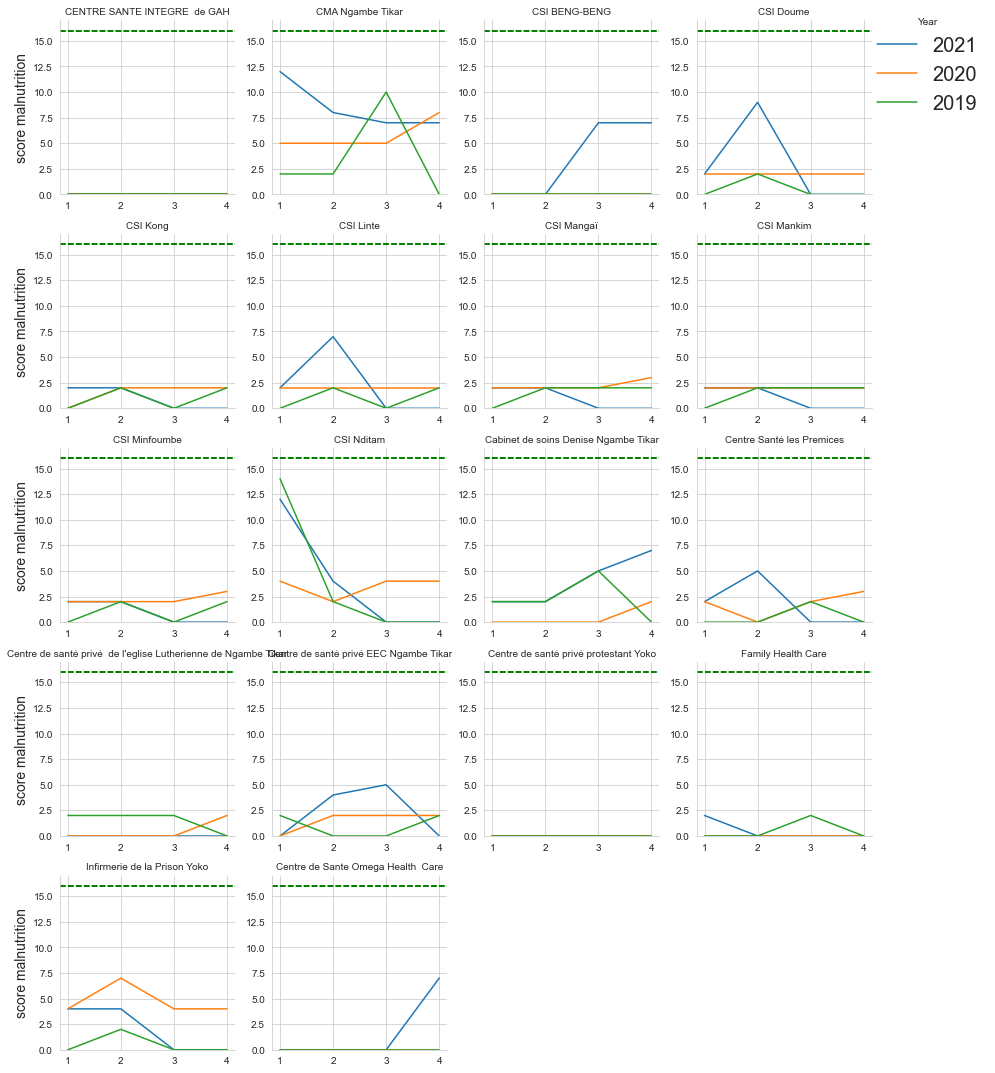

In [59]:
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_malnutrition_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,17], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=16)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score malnutrition', fontsize=14);
g.savefig("images/Performance_evolution/malnutrition")

In [60]:
scores_finances = get_dataframe(scores, indicateurs_partie_financière_list, indicateurs_FOSA_periode_list)
scores_finances_to_print = get_dataframe_to_plot(scores_finances)
scores_finances_to_print  

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    2.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    4.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

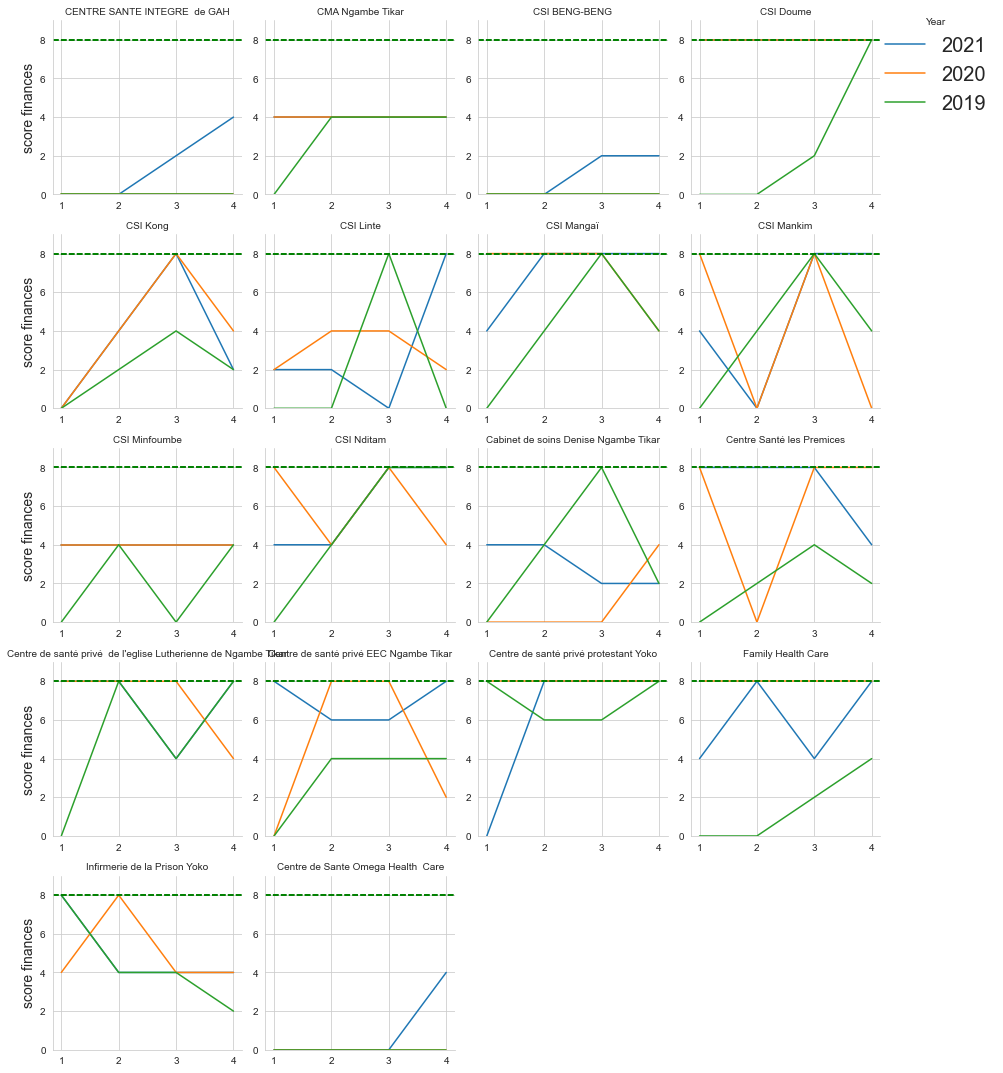

In [61]:
sns.set_style('whitegrid')
g = sns.FacetGrid(scores_finances_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,9], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=8)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score finances', fontsize=14);
g.savefig("images/Performance_evolution/finance")

In [62]:
scores_business_plan = get_dataframe(scores, indicateurs_business_plan_trimestriel_list, indicateurs_FOSA_periode_list)
scores_business_plan_to_print = get_dataframe_to_plot(scores_business_plan)
scores_business_plan_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    8.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    8.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

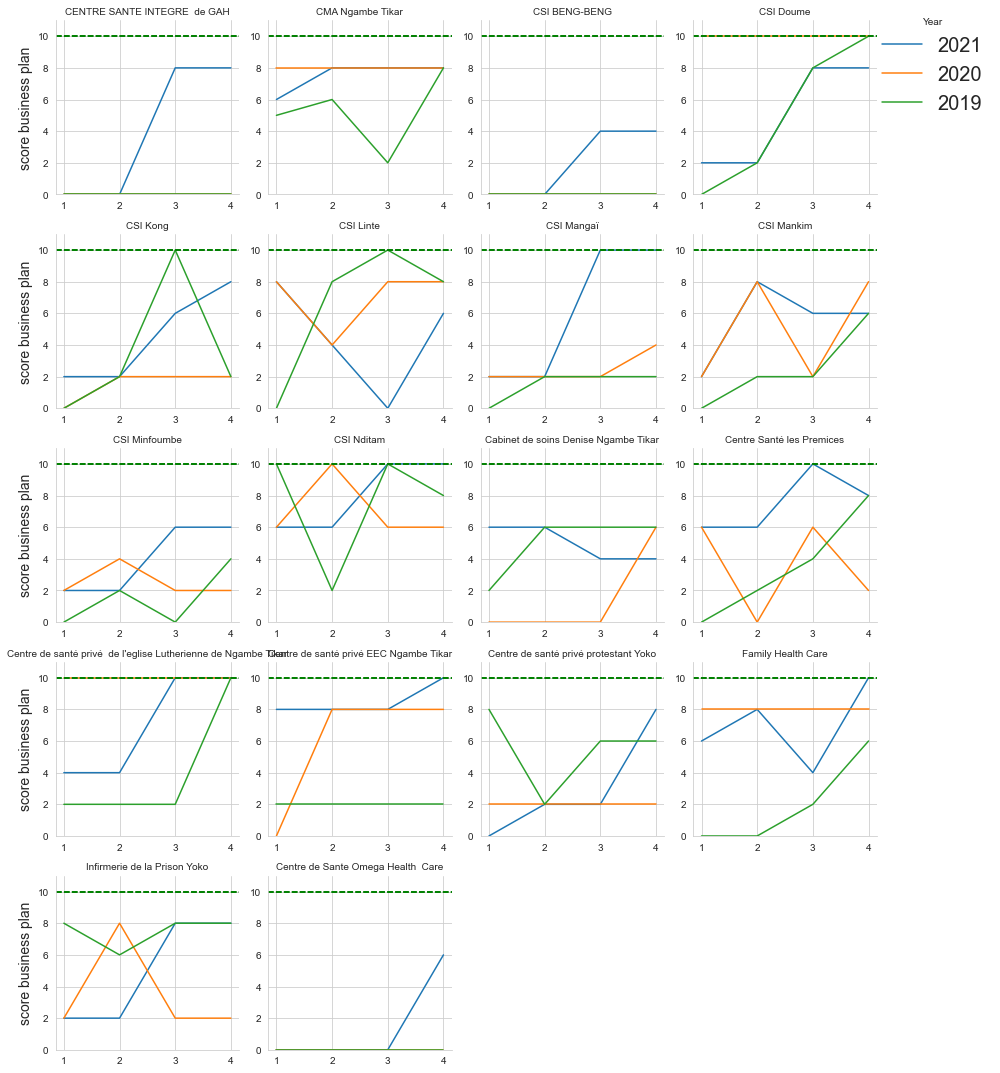

In [63]:
g = sns.FacetGrid(scores_business_plan_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,11], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=10)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score business plan', fontsize=14);
g.savefig("images/Performance_evolution/business_plan")

In [64]:
scores_hygiene = get_dataframe(scores, indicateurs_hygiene_sterilisation_list, indicateurs_FOSA_periode_list)
scores_hygiene_to_print = get_dataframe_to_plot(scores_hygiene)
scores_hygiene_to_print  

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   15.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   17.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

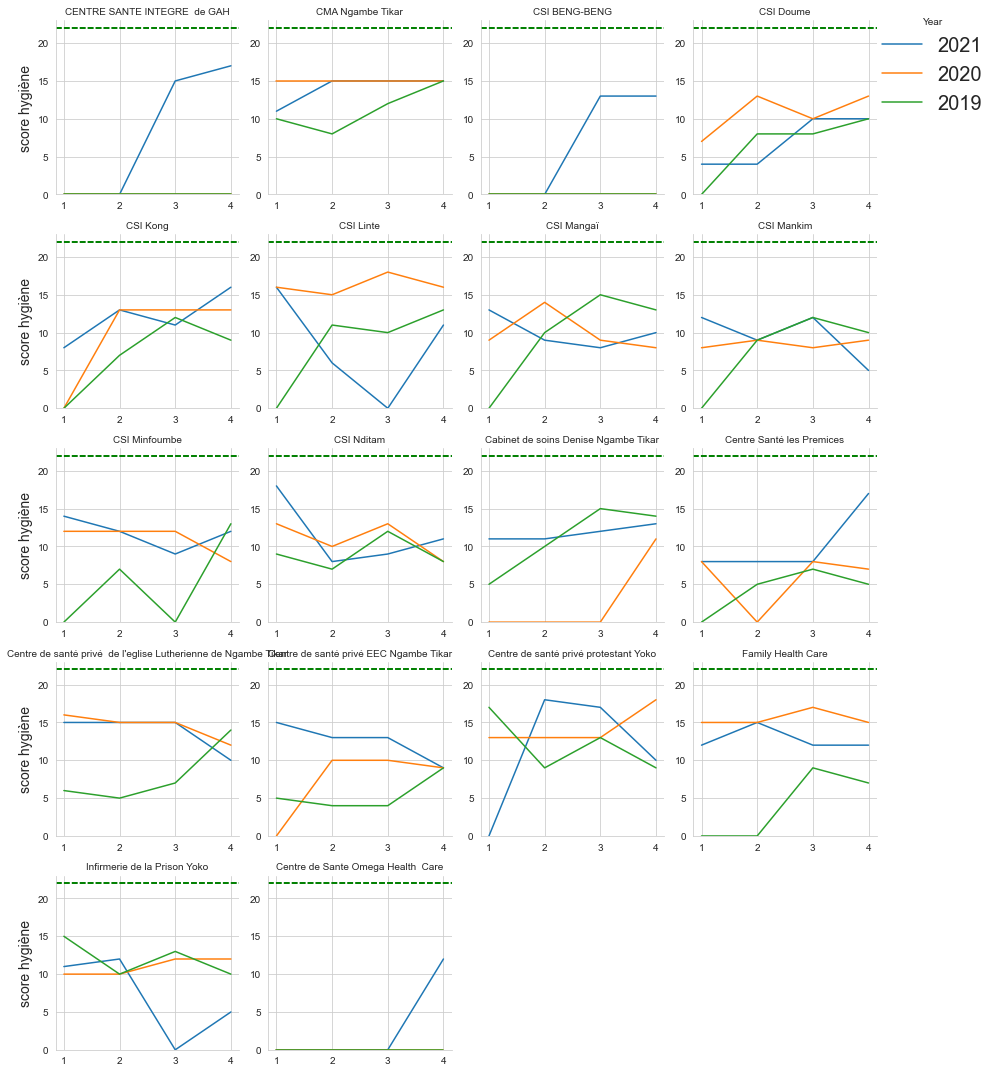

In [65]:
g = sns.FacetGrid(scores_hygiene_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,23], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=22)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score hygiène', fontsize=14);
g.savefig("images/Performance_evolution/hygiene")

In [66]:
scores_consultation_externe = get_dataframe(scores, indicateurs_cs_externe_list, indicateurs_FOSA_periode_list)
scores_consultation_externe_to_print = get_dataframe_to_plot(scores_consultation_externe)
scores_consultation_externe_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   29.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   31.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

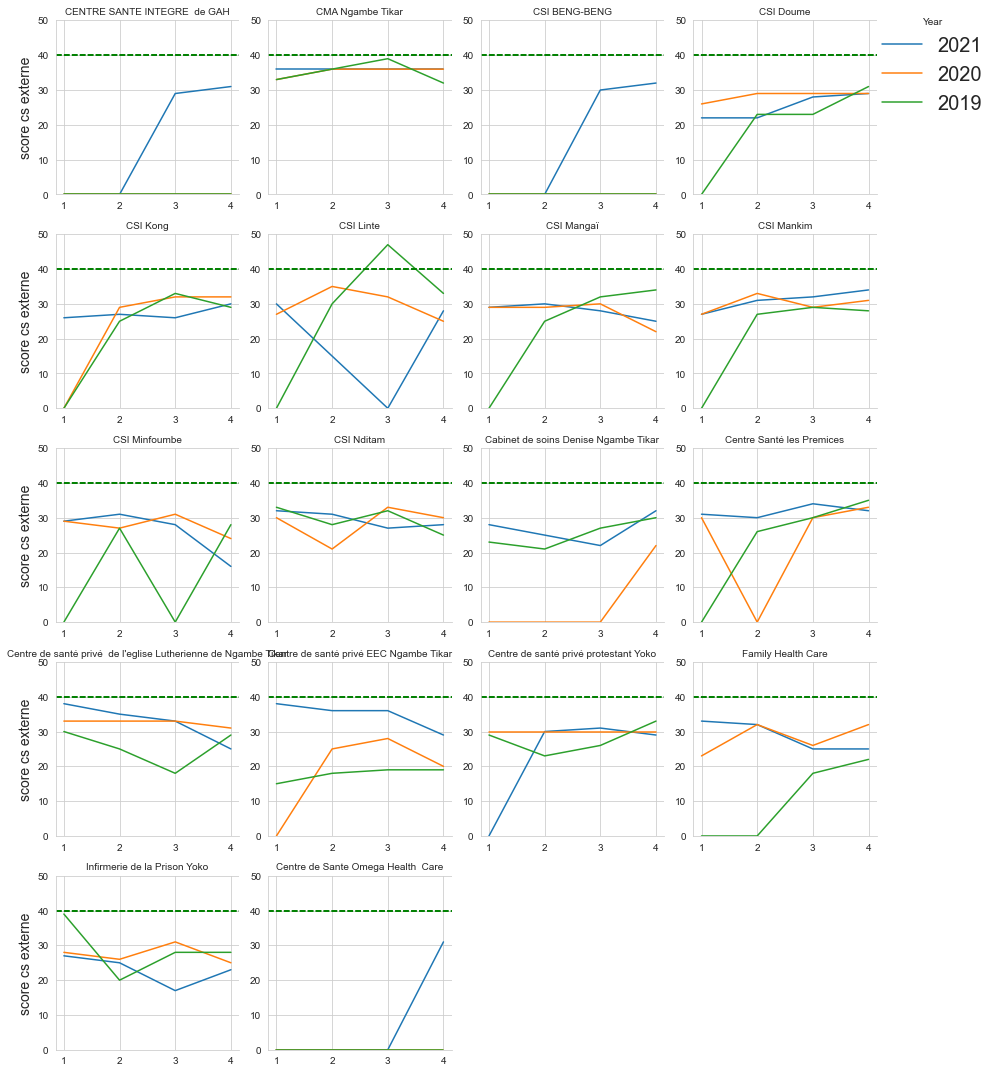

In [67]:
g = sns.FacetGrid(scores_consultation_externe_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,50], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=40)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score cs externe', fontsize=14);
g.savefig("images/Performance_evolution/cs_externe")

In [68]:
scores_planning_familial = get_dataframe(scores, indicateurs_pf_list, indicateurs_FOSA_periode_list)
scores_planning_familial_to_print = get_dataframe_to_plot(scores_planning_familial)
scores_planning_familial_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   18.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   18.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

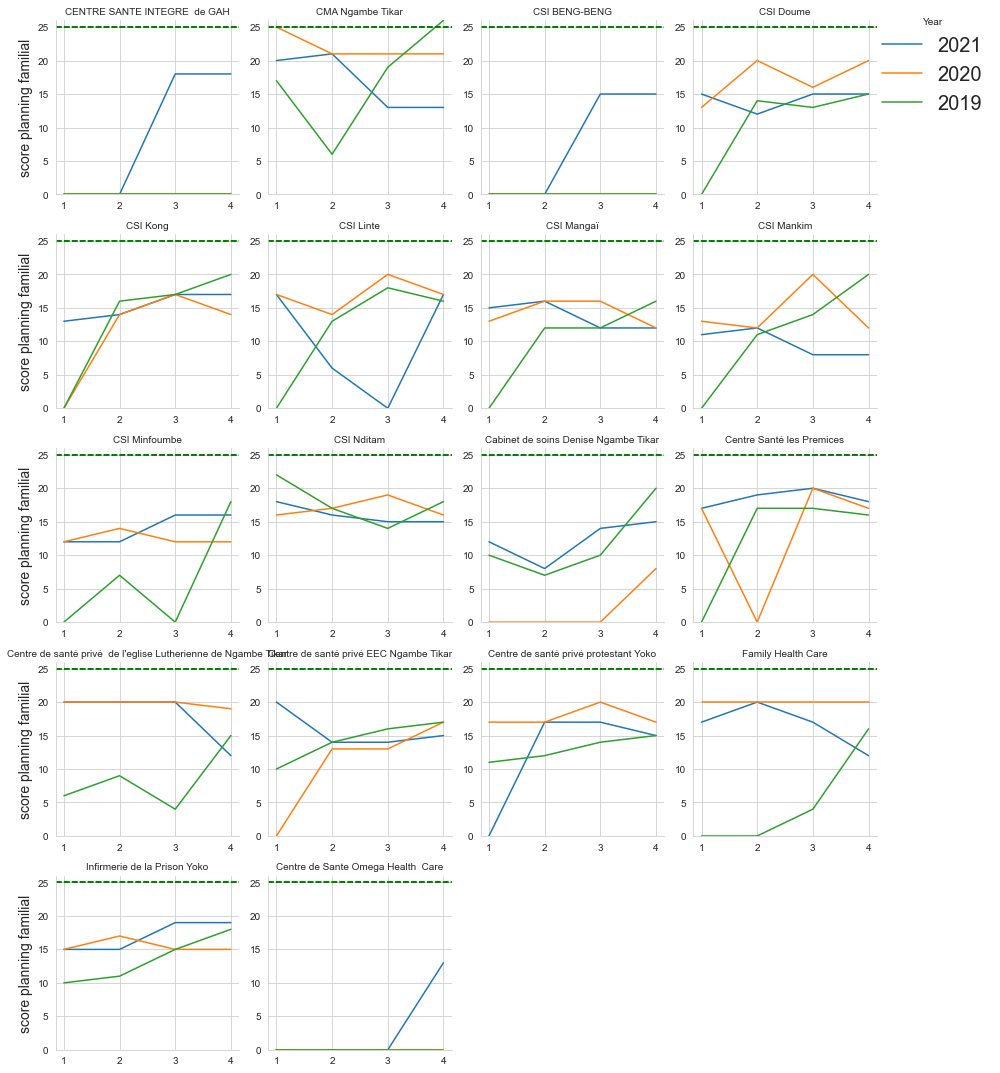

In [69]:
g = sns.FacetGrid(scores_planning_familial_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,26], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=25)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score planning familial', fontsize=14);
g.savefig("images/Performance_evolution/planning_familial")

In [70]:
scores_hospitalisation = get_dataframe(scores, indicateurs_hospi_list, indicateurs_FOSA_periode_list)
scores_hospitalisation_to_print = get_dataframe_to_plot(scores_hospitalisation)
scores_hospitalisation_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    7.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    7.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

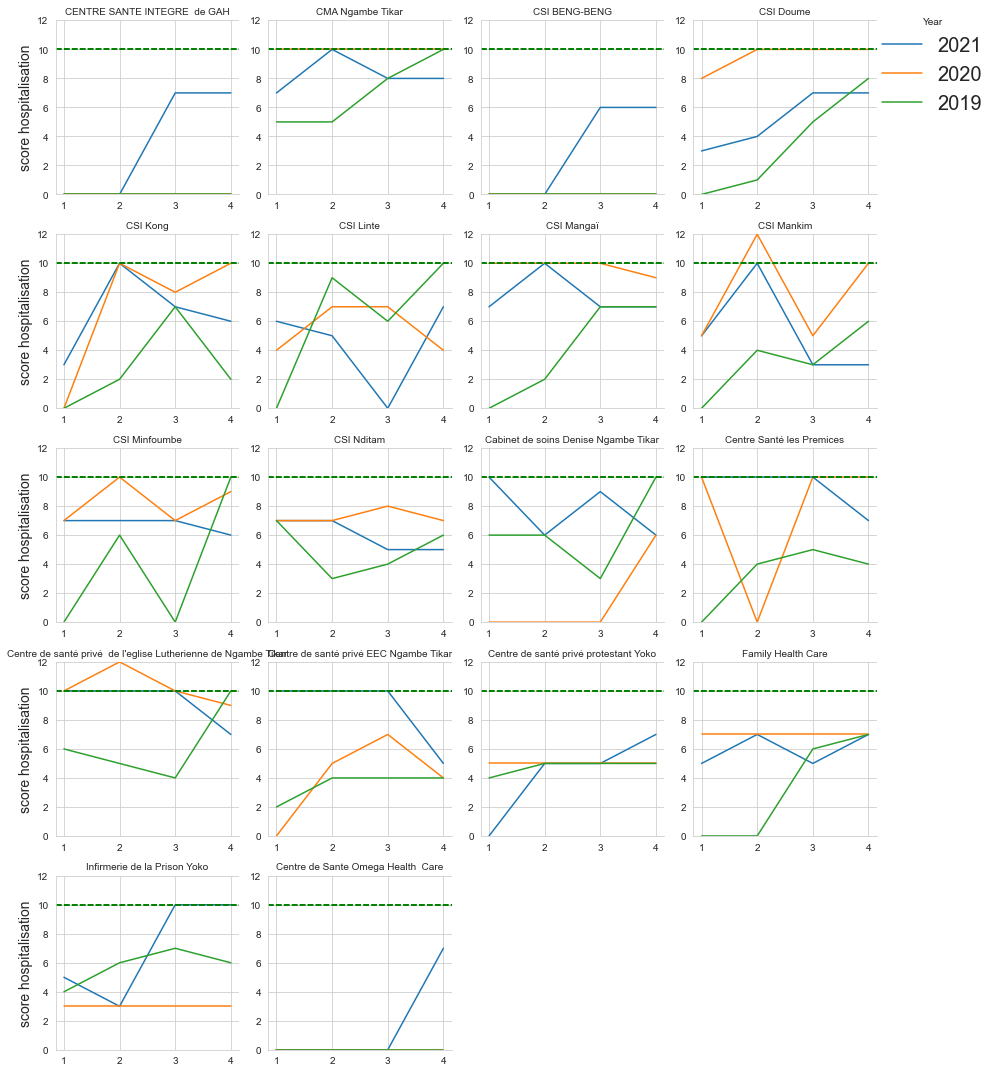

In [71]:
g = sns.FacetGrid(scores_hospitalisation_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,12], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=10)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score hospitalisation', fontsize=14);
g.savefig("images/Performance_evolution/hospitalisation")

In [72]:
scores_gest_med = get_dataframe(scores, indicateurs_gest_med_list, indicateurs_FOSA_periode_list)
scores_gest_med_to_print = get_dataframe_to_plot(scores_gest_med)
scores_gest_med_to_print  

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   13.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   13.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

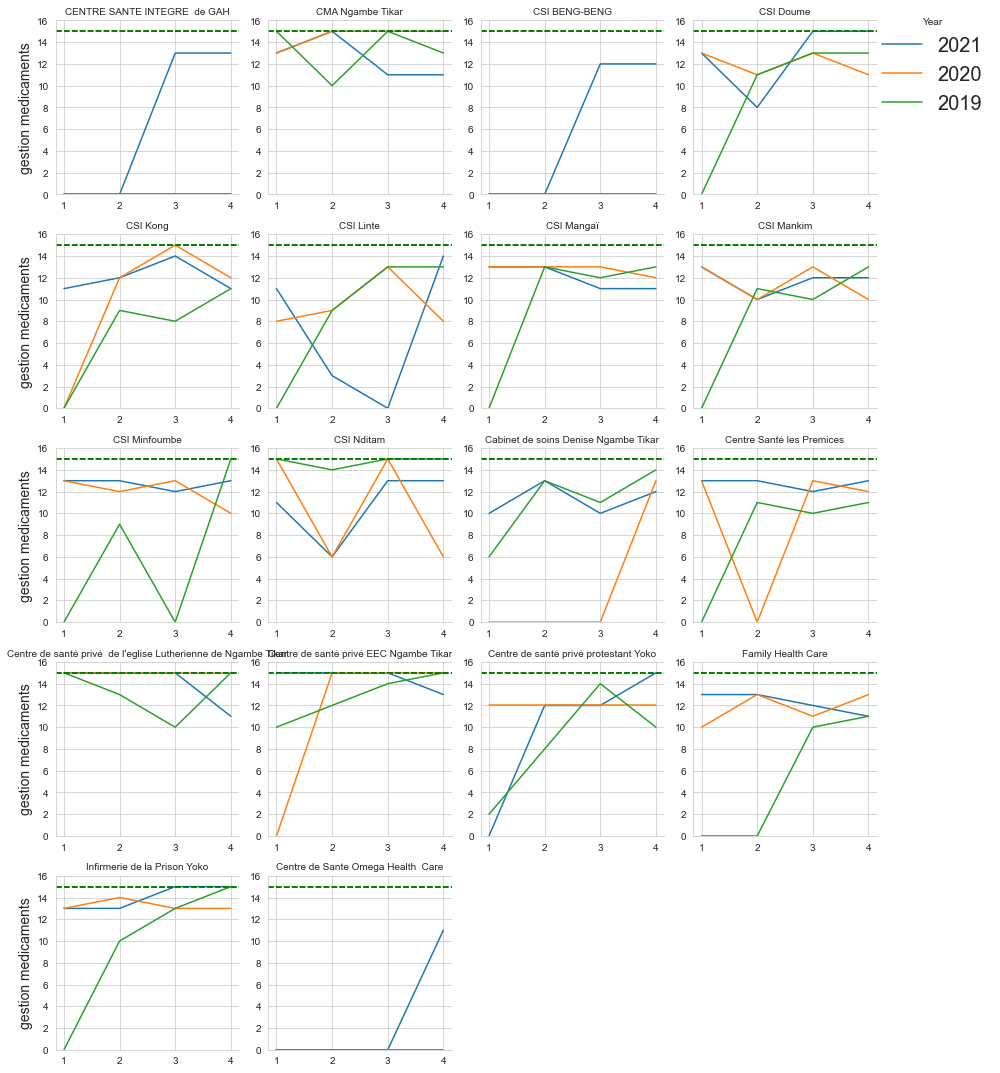

In [73]:
g = sns.FacetGrid(scores_gest_med_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,16], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=15)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'gestion medicaments', fontsize=14);
g.savefig("images/Performance_evolution/gest_med")

In [74]:
scores_med_traceurs = get_dataframe(scores, indicateurs_med_traceurs_list, indicateurs_FOSA_periode_list)
scores_med_traceurs_to_print = get_dataframe_to_plot(scores_med_traceurs)
scores_med_traceurs_to_print  

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   14.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   14.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

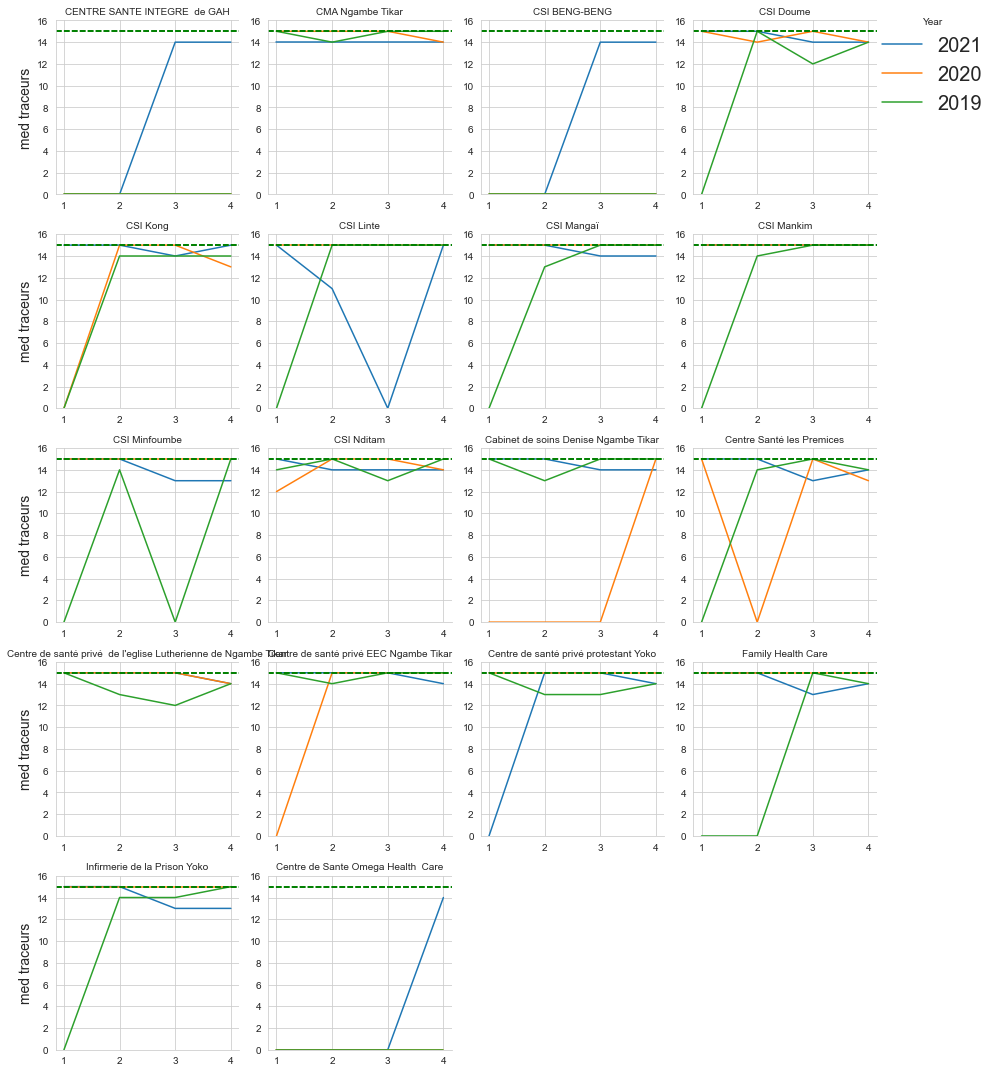

In [75]:
g = sns.FacetGrid(scores_med_traceurs_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,16], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=15)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'med traceurs', fontsize=14);
g.savefig("images/Performance_evolution/med_traceurs")

In [76]:
scores_maternite = get_dataframe(scores, indicateurs_maternite_list, indicateurs_FOSA_periode_list)
scores_maternite_to_print = get_dataframe_to_plot(scores_maternite)
scores_maternite_to_print  

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   24.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   24.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

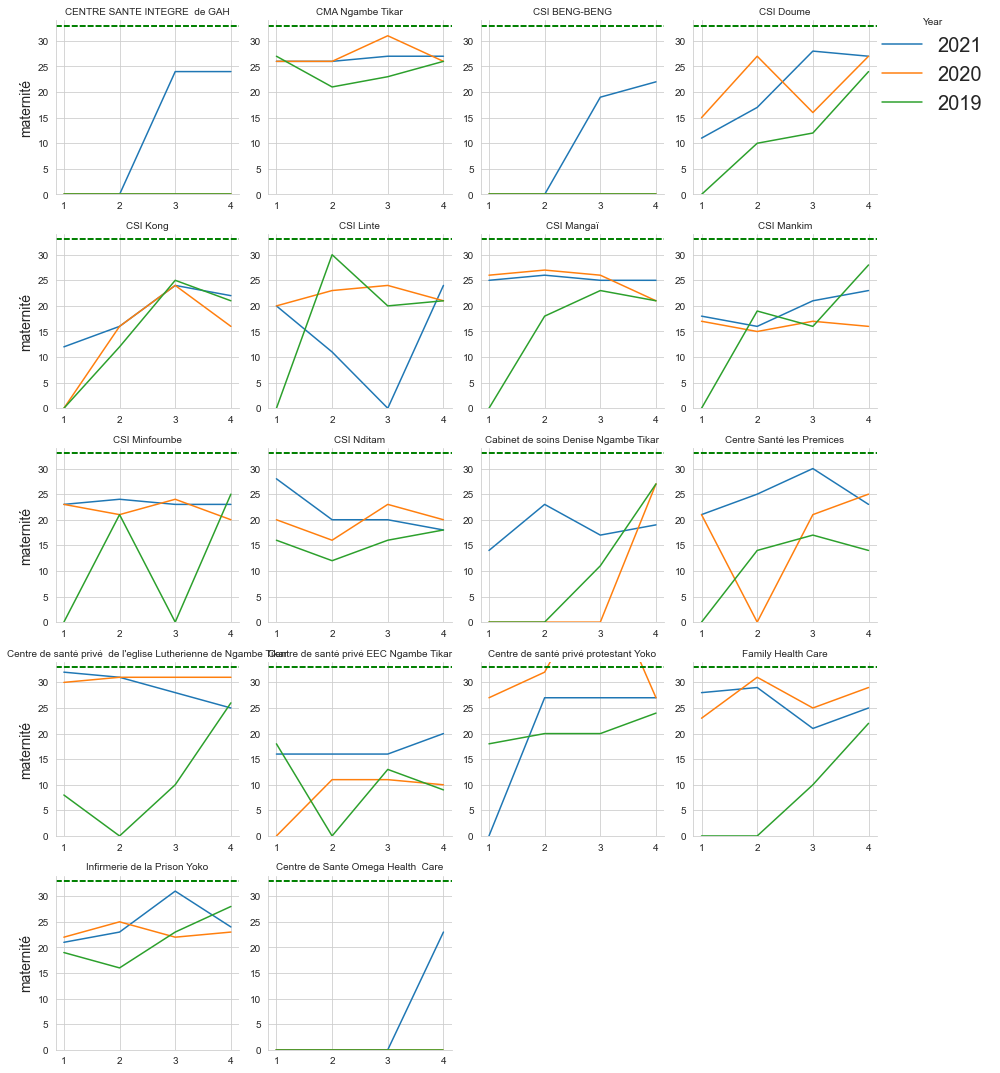

In [77]:
g = sns.FacetGrid(scores_maternite_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,34], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=33)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'maternité', fontsize=14);
g.savefig("images/Performance_evolution/maternite")

In [78]:
scores_cpn = get_dataframe(scores, indicateurs_cpn_list, indicateurs_FOSA_periode_list)
scores_cpn_to_print = get_dataframe_to_plot(scores_cpn)
scores_cpn_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    9.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    9.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

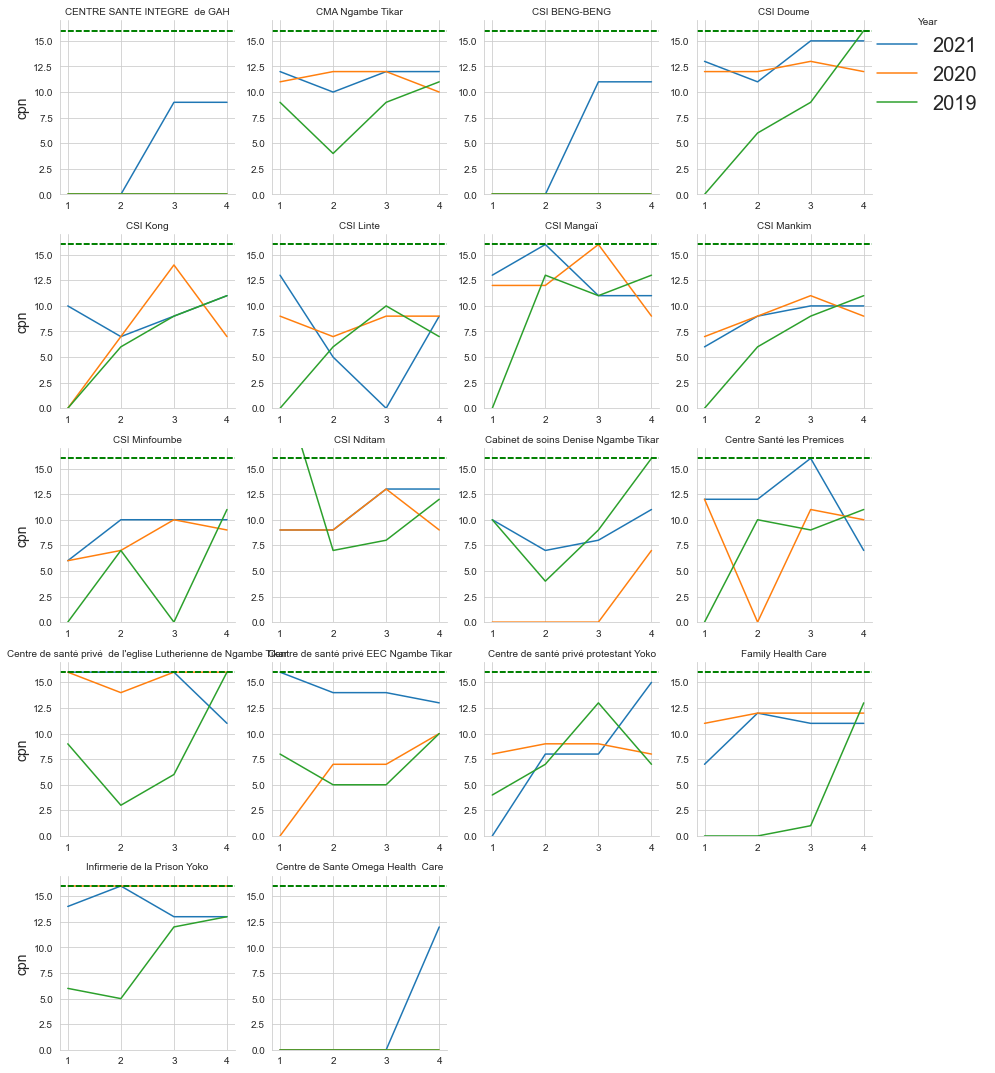

In [79]:
g = sns.FacetGrid(scores_cpn_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,17], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=16)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'cpn', fontsize=14);
g.savefig("images/Performance_evolution/cpn")

In [80]:
scores_vih  = get_dataframe(scores, indicateurs_vih_list, indicateurs_FOSA_periode_list)
scores_vih_to_print = get_dataframe_to_plot(scores_vih)
scores_vih_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    0.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    0.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

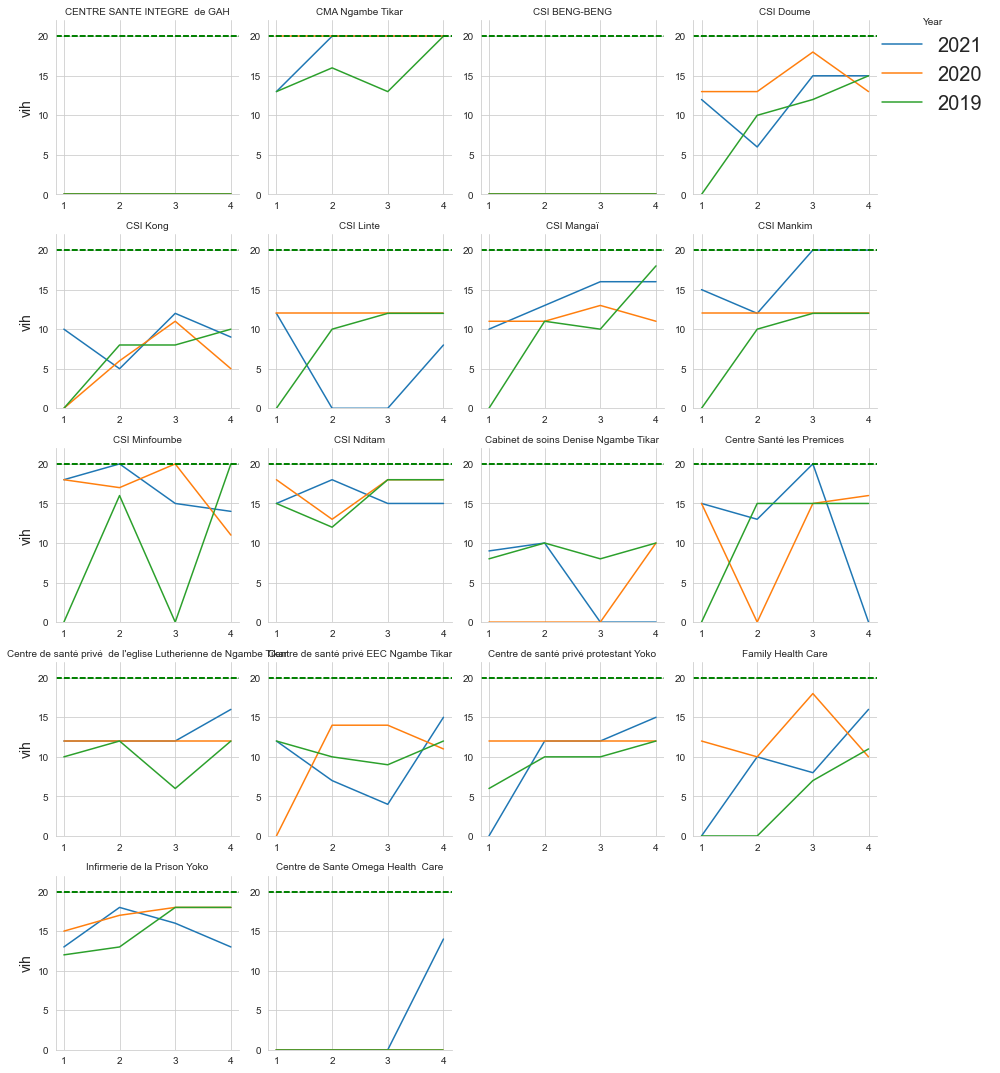

In [81]:
g = sns.FacetGrid(scores_vih_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,22], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=20)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'vih', fontsize=14);
g.savefig("images/Performance_evolution/vih")

In [82]:
scores_pbf_com = get_dataframe(scores, indicateurs_pbf_communautaire_list, indicateurs_FOSA_periode_list)
scores_pbf_com_to_print = get_dataframe_to_plot(scores_pbf_com)
scores_pbf_com_to_print

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021    2.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021    2.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

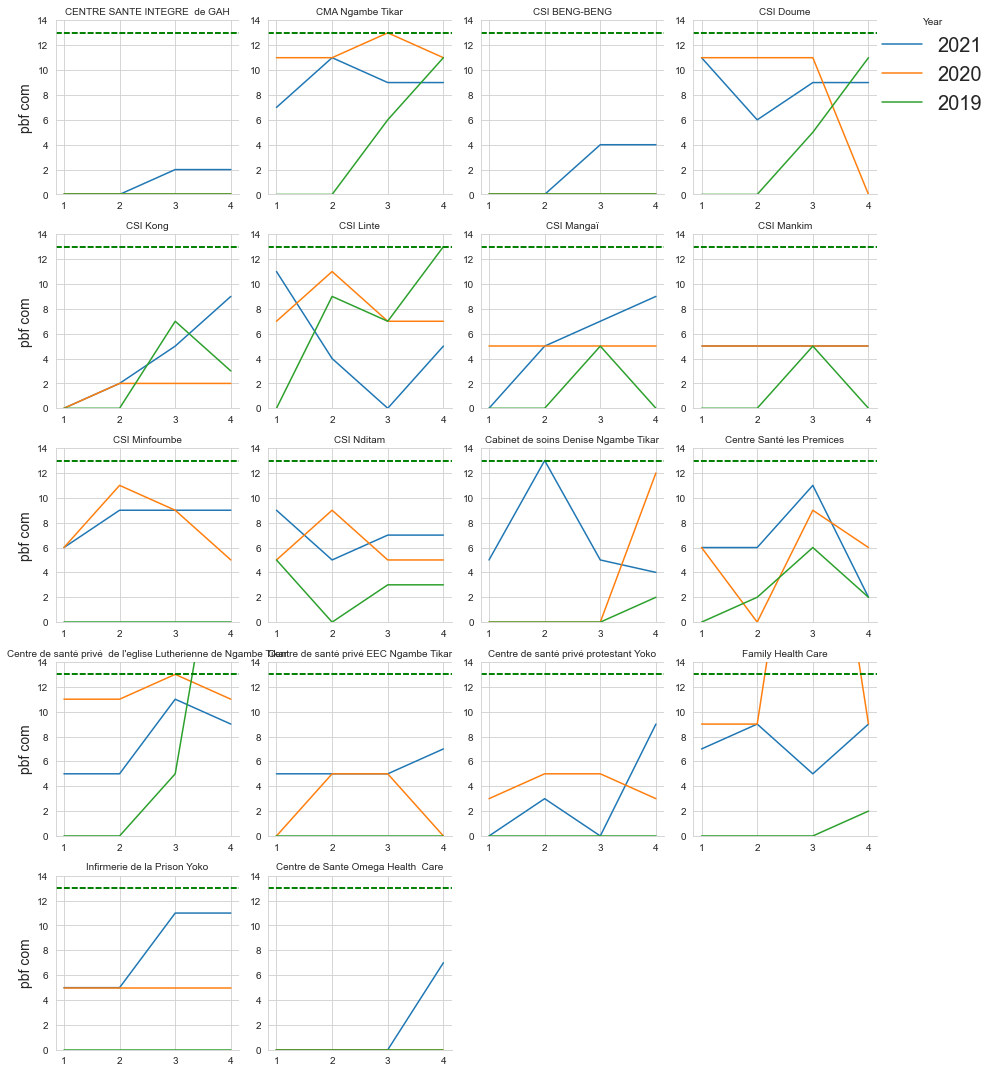

In [83]:
g = sns.FacetGrid(scores_pbf_com_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,14], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=13)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'pbf com', fontsize=14);
g.savefig("images/Performance_evolution/pbf_com")

In [84]:
scores_etat_civil = get_dataframe(scores, indicateurs_etat_civil_list, indicateurs_FOSA_periode_list)
scores_etat_civil_to_print = get_dataframe_to_plot(scores_etat_civil)
scores_etat_civil_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   10.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   10.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

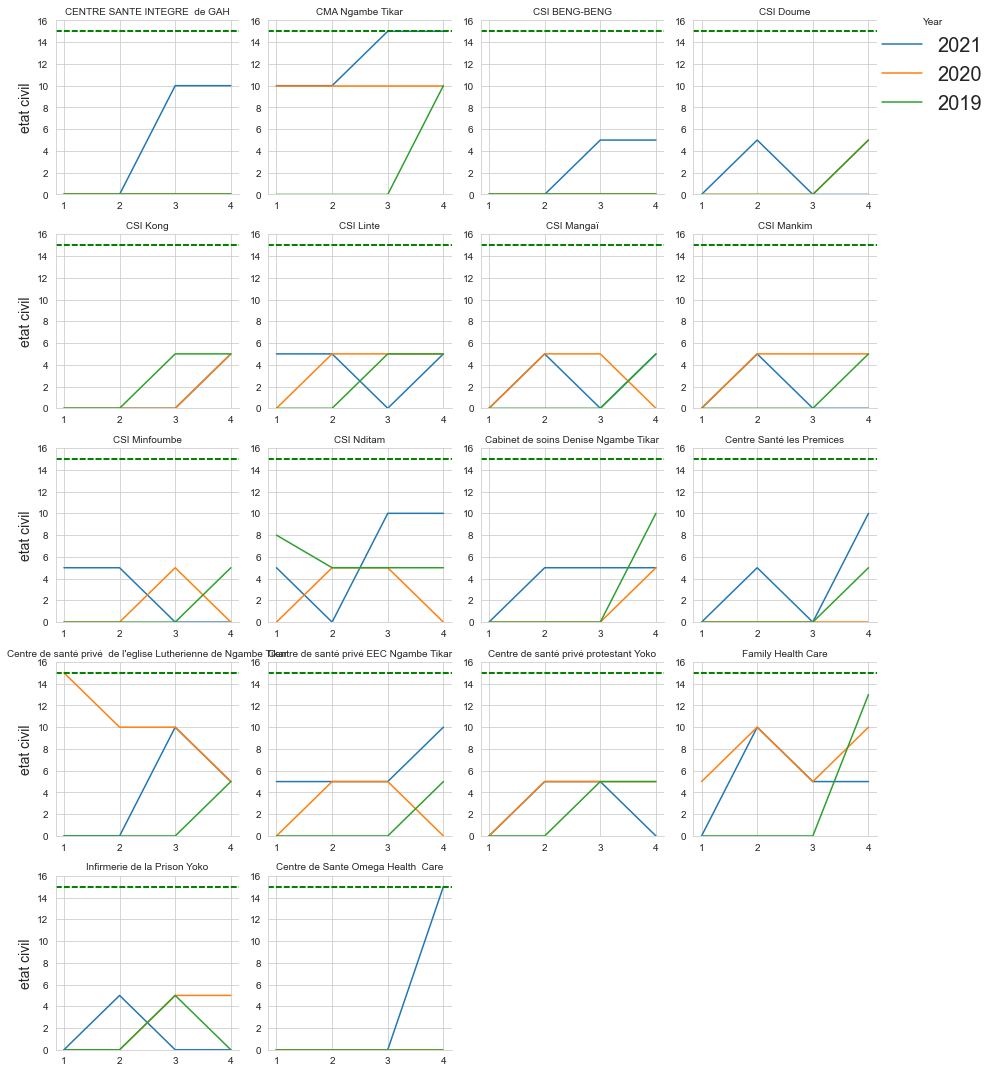

In [85]:
g = sns.FacetGrid(scores_etat_civil_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,16], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=15)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'etat civil', fontsize=14);
g.savefig("images/Performance_evolution/etat_civil")

In [86]:
scores_sante_mere_enfant = get_dataframe(scores, indicateurs_sante_mere_enfant, indicateurs_FOSA_periode_list)
scores_sante_mere_enfant_to_print = get_dataframe_to_plot(scores_sante_mere_enfant)
scores_sante_mere_enfant_to_print

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021   66.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021   66.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

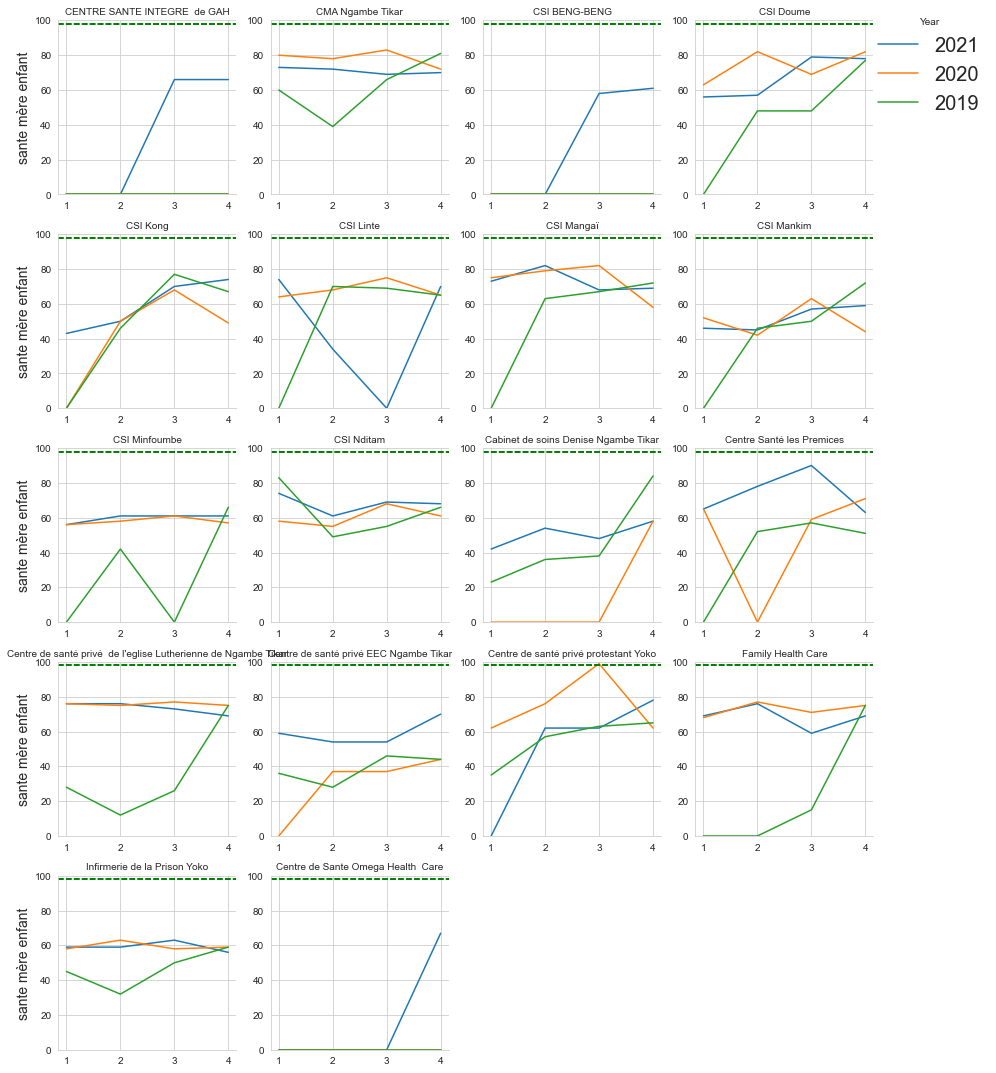

In [87]:
g = sns.FacetGrid(scores_sante_mere_enfant_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,100], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=98)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'sante mère enfant', fontsize=14);
g.savefig("images/Performance_evolution/sante_mere_enfant")

In [88]:
scores_total = get_dataframe(scores, indicateurs_all_cat_list, indicateurs_FOSA_periode_list)
scores_total_to_print = get_dataframe_to_plot(scores_total)
scores_total_to_print 

FOSA Trim  Year  score
0          CENTRE SANTE INTEGRE  de GAH    1  2021    0.0
1          CENTRE SANTE INTEGRE  de GAH    2  2021    0.0
2          CENTRE SANTE INTEGRE  de GAH    3  2021  188.0
3          CENTRE SANTE INTEGRE  de GAH    4  2021  195.0
4          CENTRE SANTE INTEGRE  de GAH    1  2020    0.0
..                                  ...  ...   ...    ...
211  Centre de Sante Omega Health  Care    4  2020    0.0
212  Centre de Sante Omega Health  Care    1  2019    0.0
213  Centre de Sante Omega Health  Care    2  2019    0.0
214  Centre de Sante Omega Health  Care    3  2019    0.0
215  Centre de Sante Omega Health  Care    4  2019    0.0

[216 rows x 4 columns]

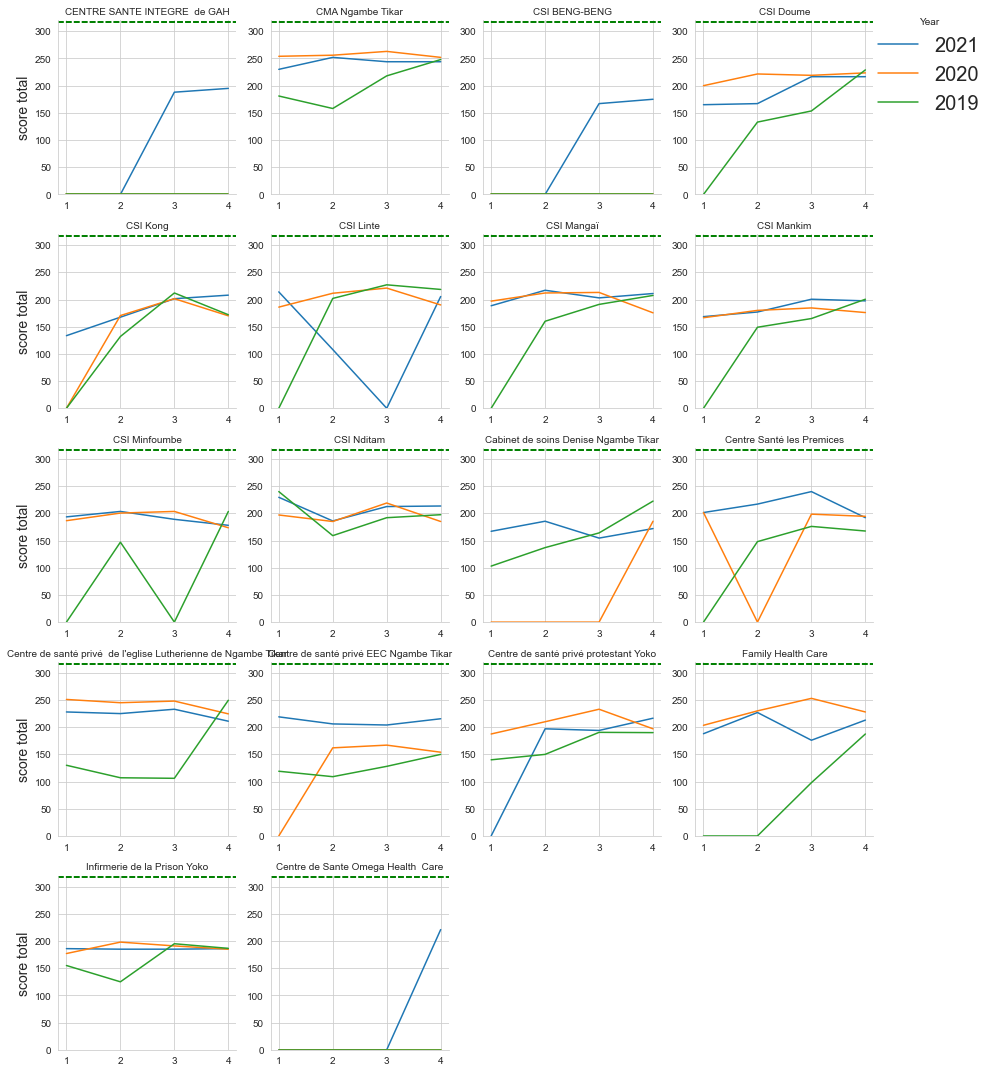

In [89]:
g = sns.FacetGrid(scores_total_to_print, col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,320], hue="Year")
g.map_dataframe(sns.lineplot, x="Trim", y="score")
g.map_dataframe(add_max_score, score_max=317)
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.set_axis_labels(None, 'score total', fontsize=14);
g.savefig("images/Performance_evolution/total")

# Ranking des formations sanitaires selon leur score de catégories pour T4 2021

In [90]:
# list des scores des différentes catégories
scores_list = [scores_pbf_com_to_print,
               scores_business_plan_to_print, 
               scores_consultation_externe_to_print, 
               scores_cpn_to_print, 
               scores_etat_civil_to_print, 
               scores_finances_to_print, 
               scores_gest_med_to_print, 
               scores_hospitalisation_to_print, 
               scores_hygiene_to_print, 
               scores_indicateurs_generaux_to_print, 
               scores_labo_to_print, 
               scores_malnutrition_to_print, 
               scores_maternite_to_print, 
               scores_med_traceurs_to_print, 
                scores_petite_chirurgie_to_print, 
               scores_planning_familial_to_print, 
               scores_vaccination_to_print, 
               scores_vih_to_print, 
               scores_sante_mere_enfant_to_print, 
               scores_total_to_print]

In [91]:
score_max_list = [13, 10, 40, 16, 15, 8, 15, 10, 22, 20, 10, 16, 33, 15, 5, 25, 24, 20, 98,317]

In [92]:
categories_list = [indicateurs_pbf_communautaire_list,  
                   indicateurs_business_plan_trimestriel_list, 
                   indicateurs_cs_externe_list, 
                   indicateurs_cpn_list, 
                   indicateurs_etat_civil_list, 
                   indicateurs_partie_financière_list, 
                   indicateurs_gest_med_list, 
                   indicateurs_hospi_list, 
                   indicateurs_hygiene_sterilisation_list, 
                   indicateurs_generaux_list, 
                   indicateurs_labo_list,
                   indicateurs_malnutrition_list, 
                   indicateurs_maternite_list, 
                   indicateurs_med_traceurs_list,
                   indicateurs_petite_chirurgie_list, 
                   indicateurs_pf_list, 
                   indicateurs_vaccinations_list,
                   indicateurs_vih_list, 
                   indicateurs_sante_mere_enfant, 
                   indicateurs_all_cat_list]

In [93]:
indicateurs_name_list = ["pbf_com",  "business plan", "cs ext", "cpn", "etat civil", "finances", "gestion med", 
                         "hospitalisation", "hygiène", "indicateurs généraux", "laboratoire", "malnutrition", 
                         "maternite", "med traceurs", "petite chirurgie", "planning familial", "vaccination",
                         "vih", "mère enfant", "total"]

In [94]:
zipped = zip(scores_list, score_max_list, indicateurs_name_list)
list_zipped = list(zipped)

In [95]:
dataframes = []
for i in list_zipped:
    df = i[0]
    score_max = i[1]
    name = i[2]
    bool = (df["Year"] == "2021") & (df["Trim"] == "4")
    df = df[bool]
    m = df["score"].mean(skipna=True)
    df = df.drop(["Trim", "Year"], axis = 1)
    dataframes.append((name, m, score_max, df))

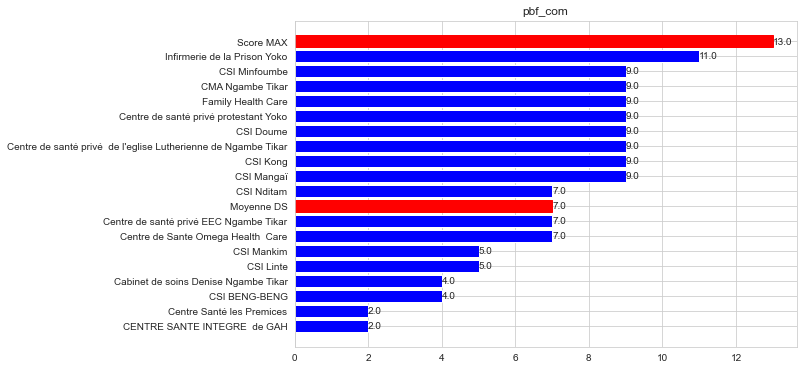

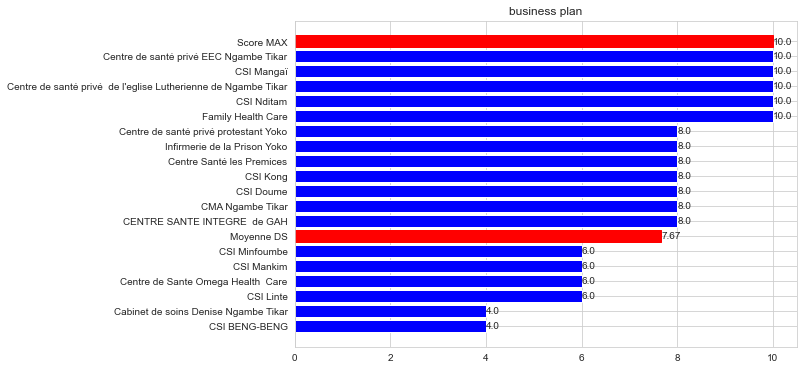

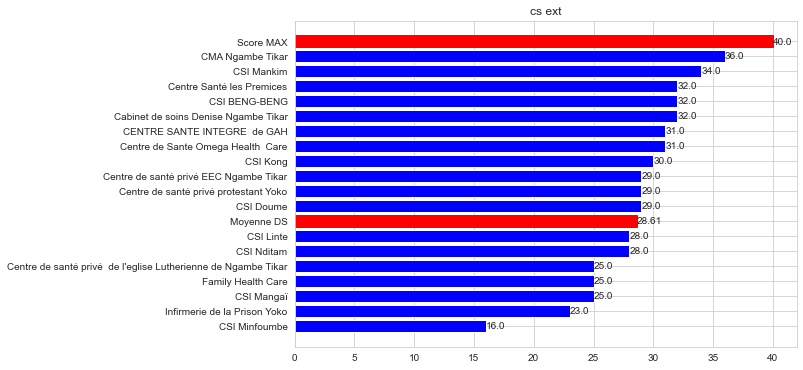

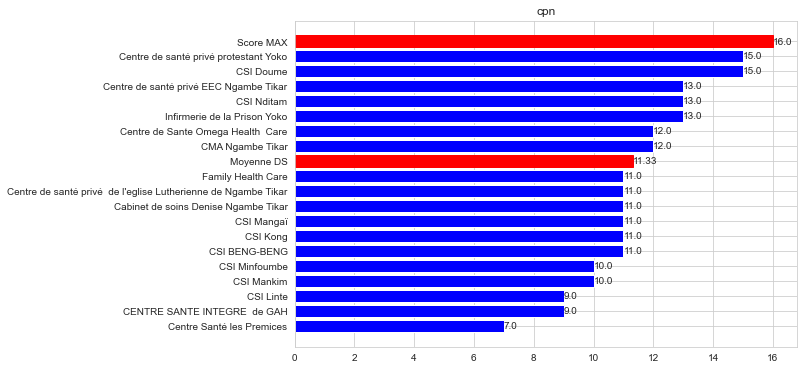

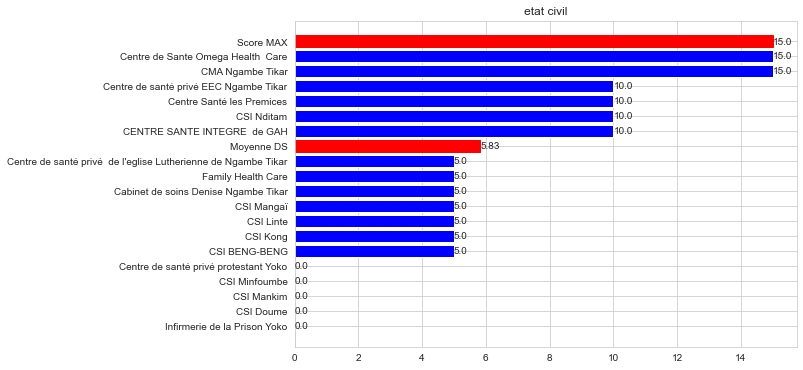

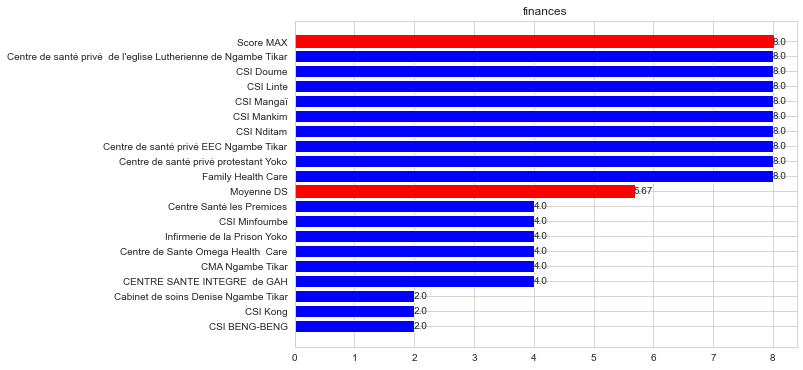

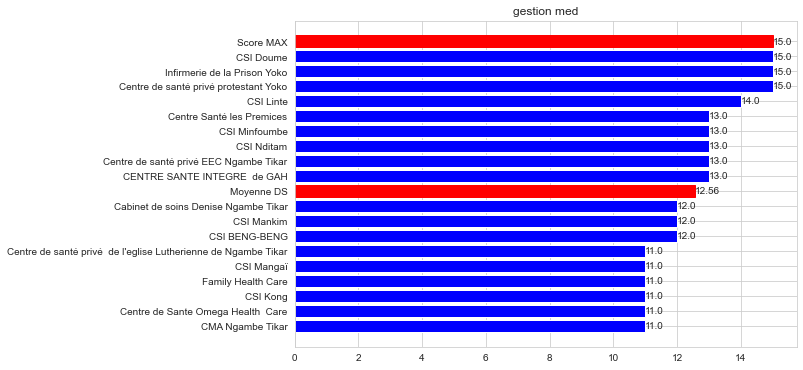

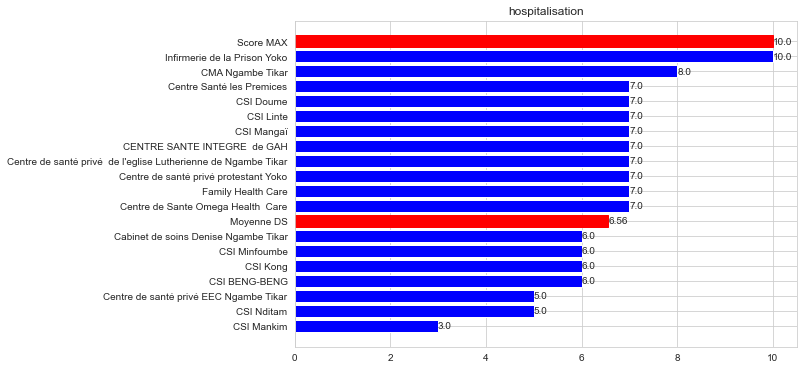

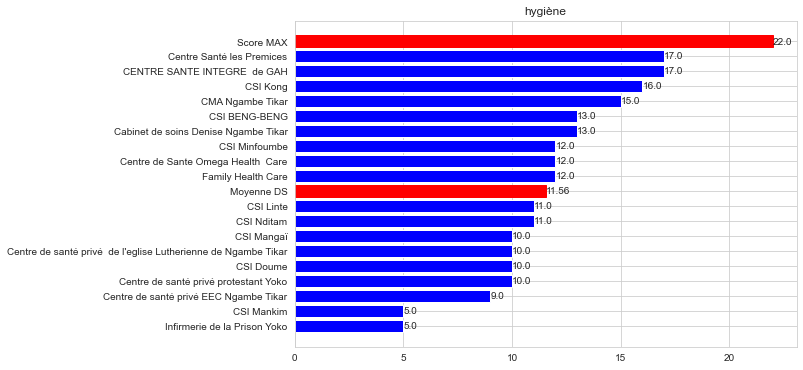

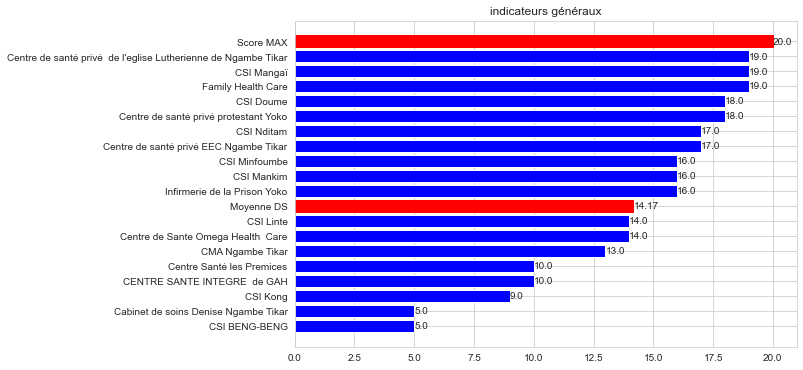

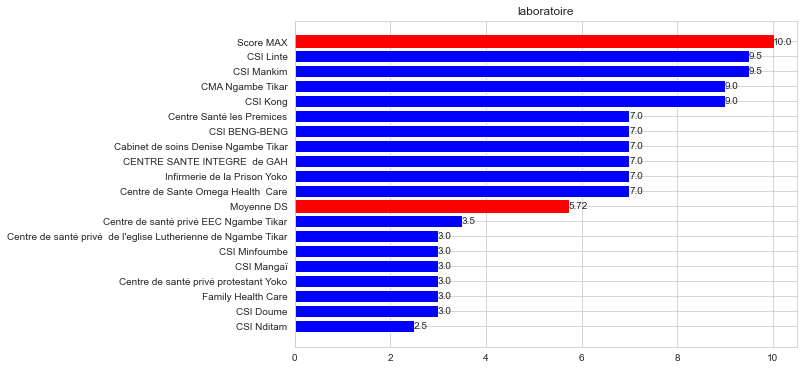

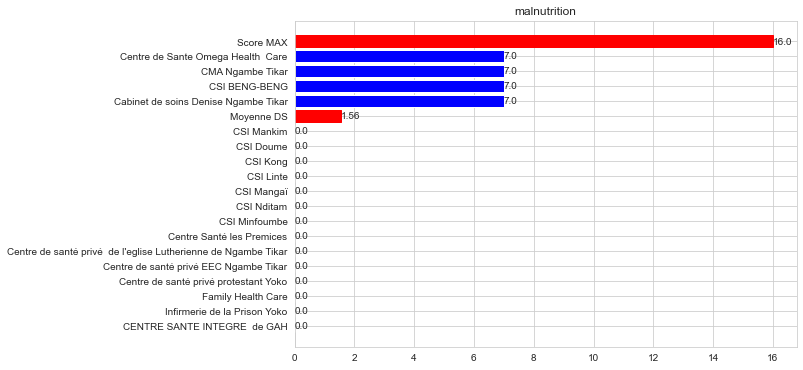

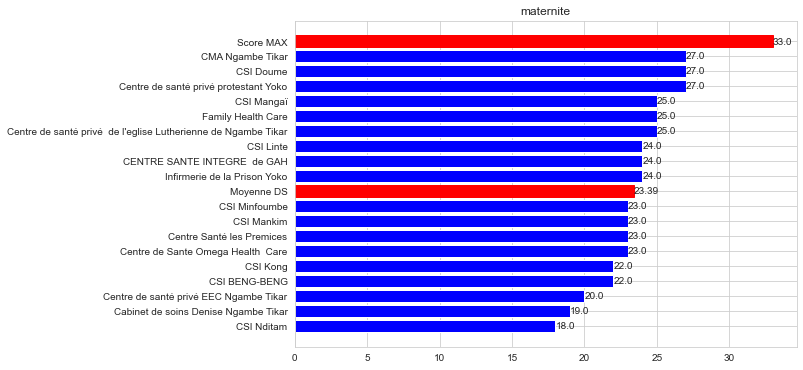

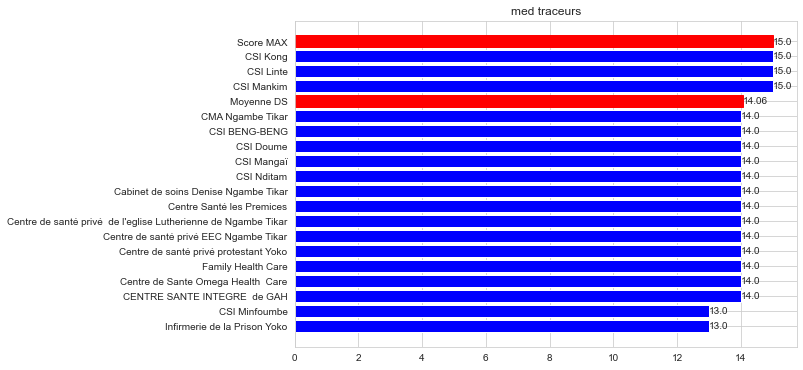

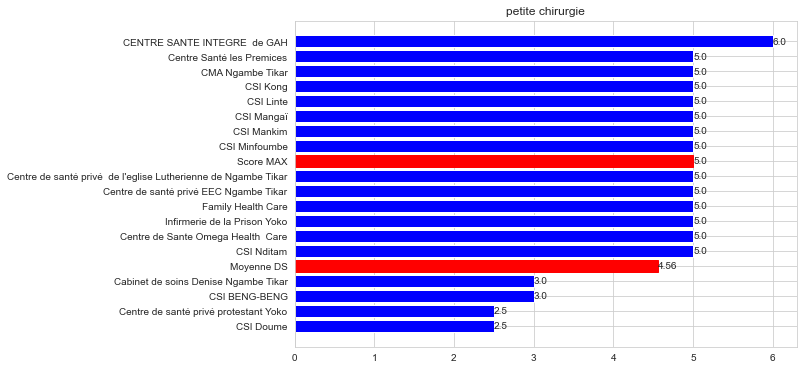

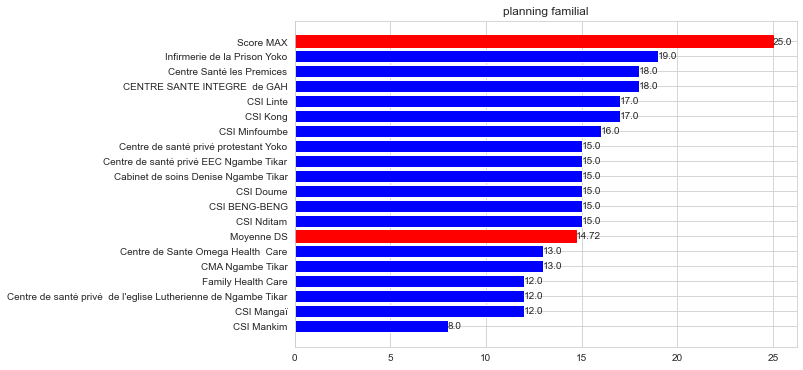

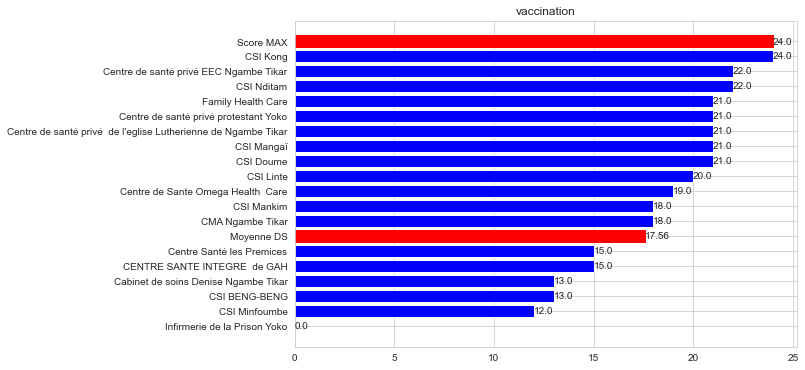

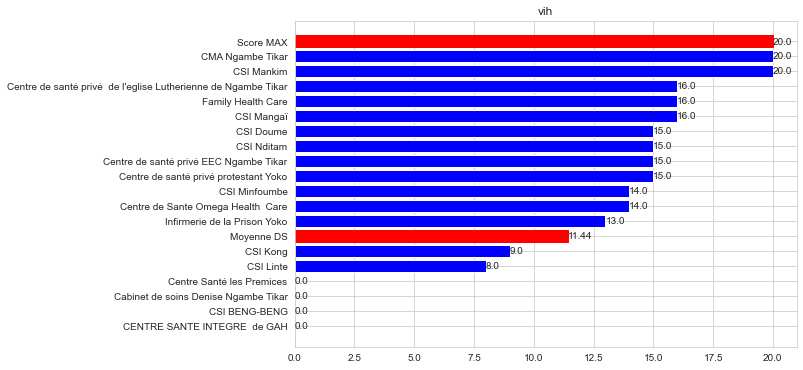

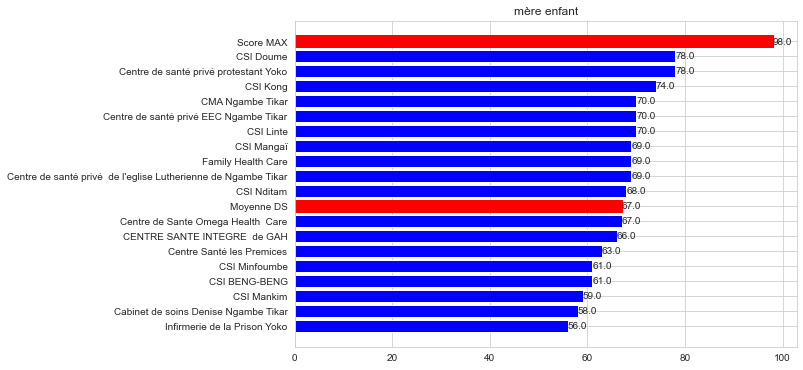

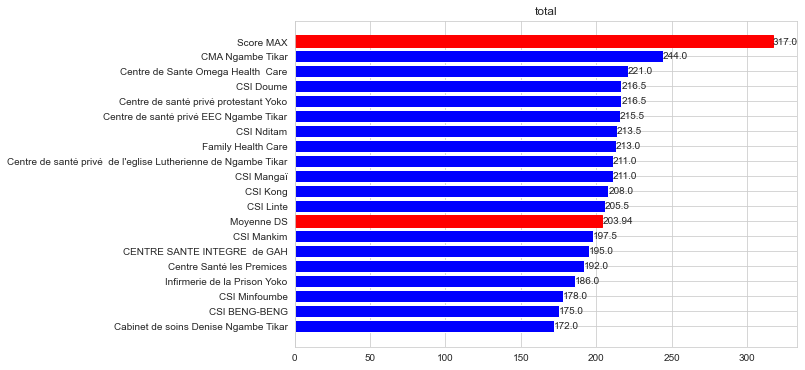

In [96]:
for row in dataframes:
    name = row[0]
    m = row[1]
    score_max = row[2]
    df = row[3]
        
    df = df.append([{"FOSA": "Moyenne DS", "score":np.round(m,2)}, {"FOSA": "Score MAX", "score":score_max}], ignore_index=True)
    df.sort_values("score", inplace=True)
    df.reset_index(drop=True, inplace=True)
        
    fig = plt.figure(figsize=(9,6))
    ax = plt.subplot(111)
    ret = ax.barh(df["FOSA"], df["score"], color="blue") 
        
    ind_moyen_score = df[df["FOSA"] == "Moyenne DS"].index[0].astype(np.int32)
    ind_max_score = df[df["FOSA"] == "Score MAX"].index[0].astype(np.int32)
        
    ret[ind_moyen_score].set_color("red")
    ret[ind_max_score].set_color("red")
        
    for pY, pX in enumerate(df["score"]):
        ax.annotate("{:,}".format(pX), xy=(pX,pY), va="center")
    plt.title(name)
    plt.savefig("images/Ranking/ranking_" + name)
    plt.savefig("images/Ranking/svg/ranking_" + name + ".svg")
    plt.show()

In [97]:
def get_df_with_trim_and_year(df):
    df_new = df.copy()
    b1 = df["Year"] == "2021"
    return  df_new[b1]

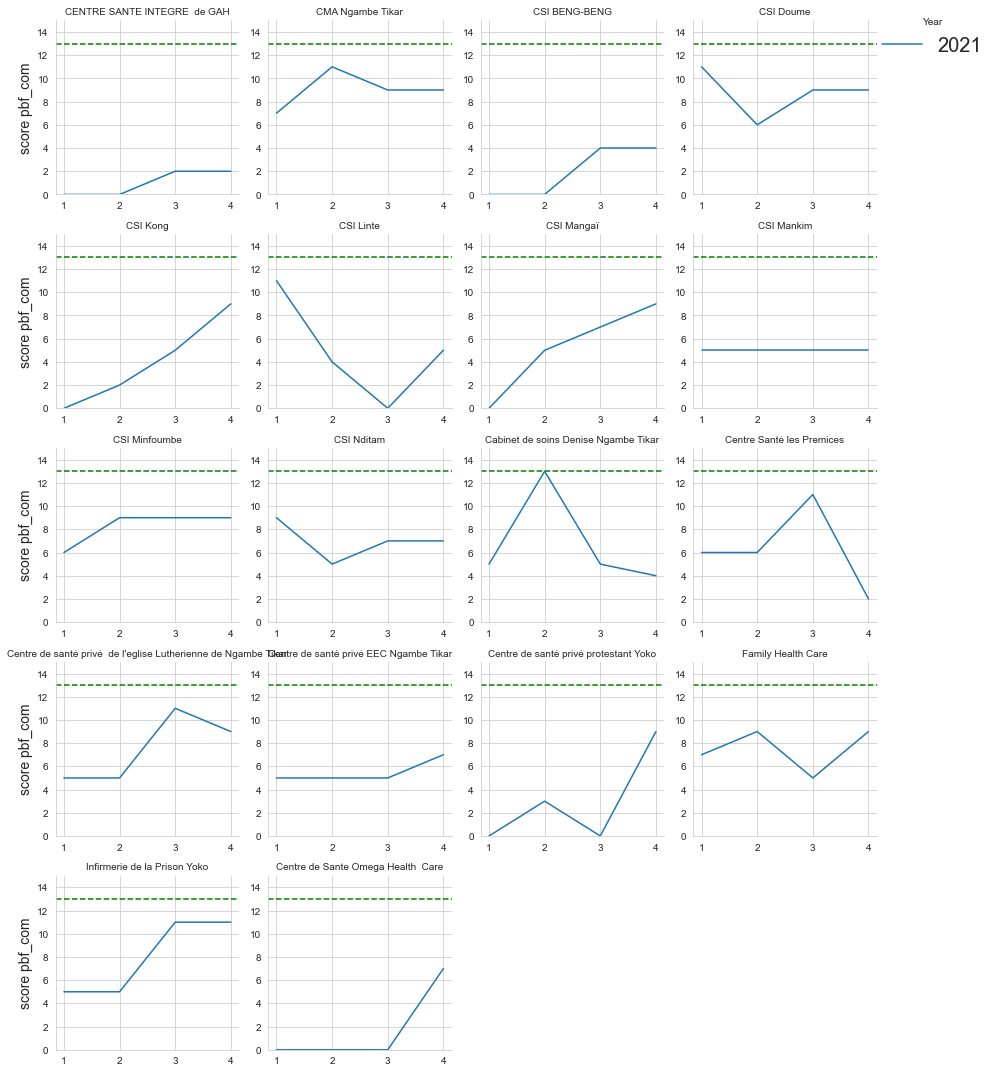

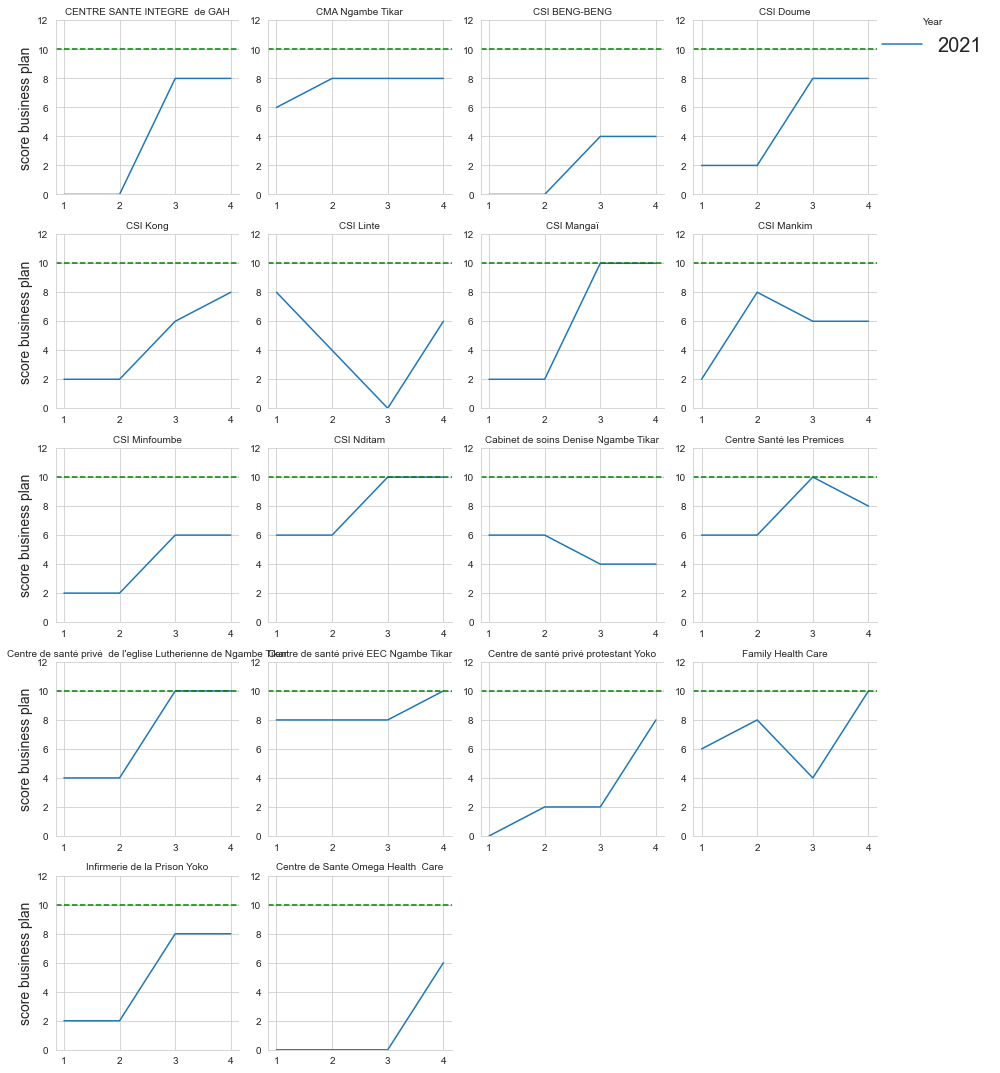

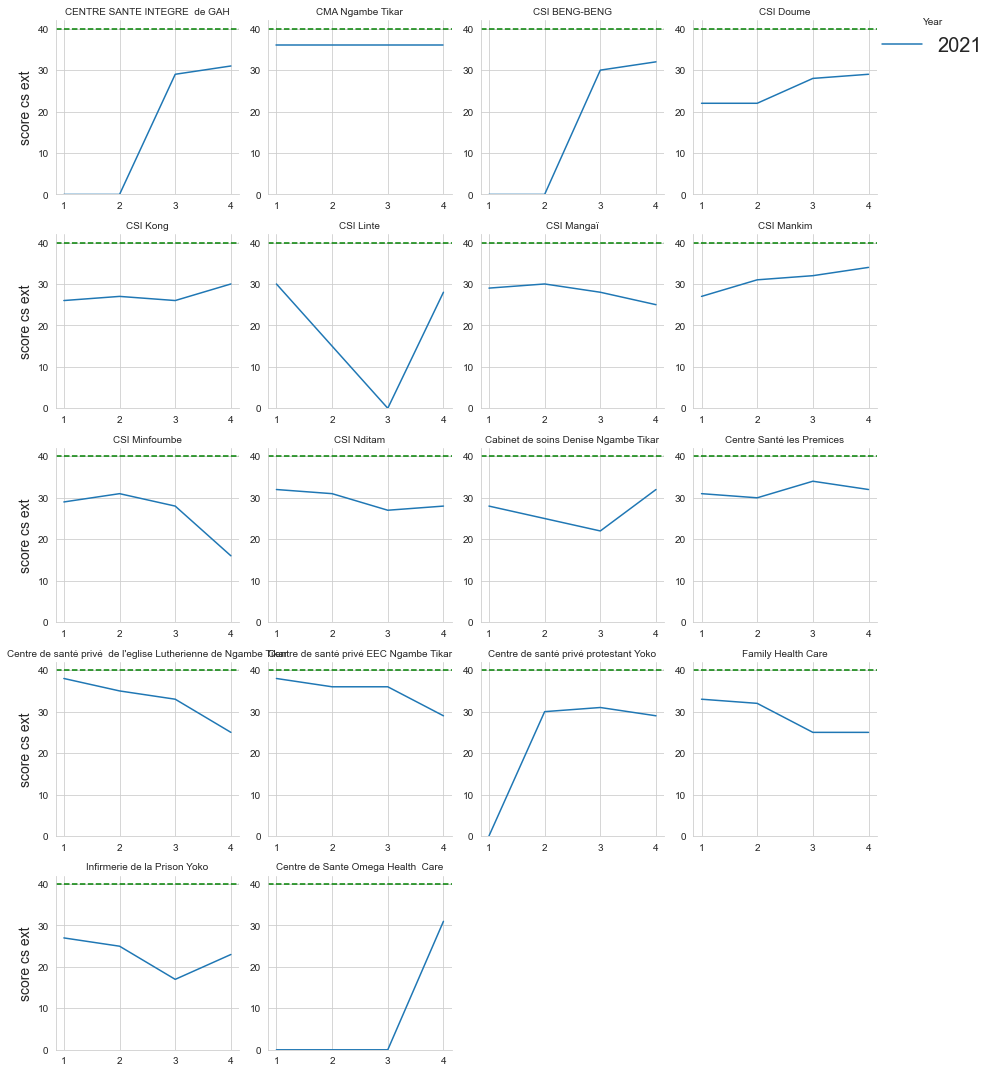

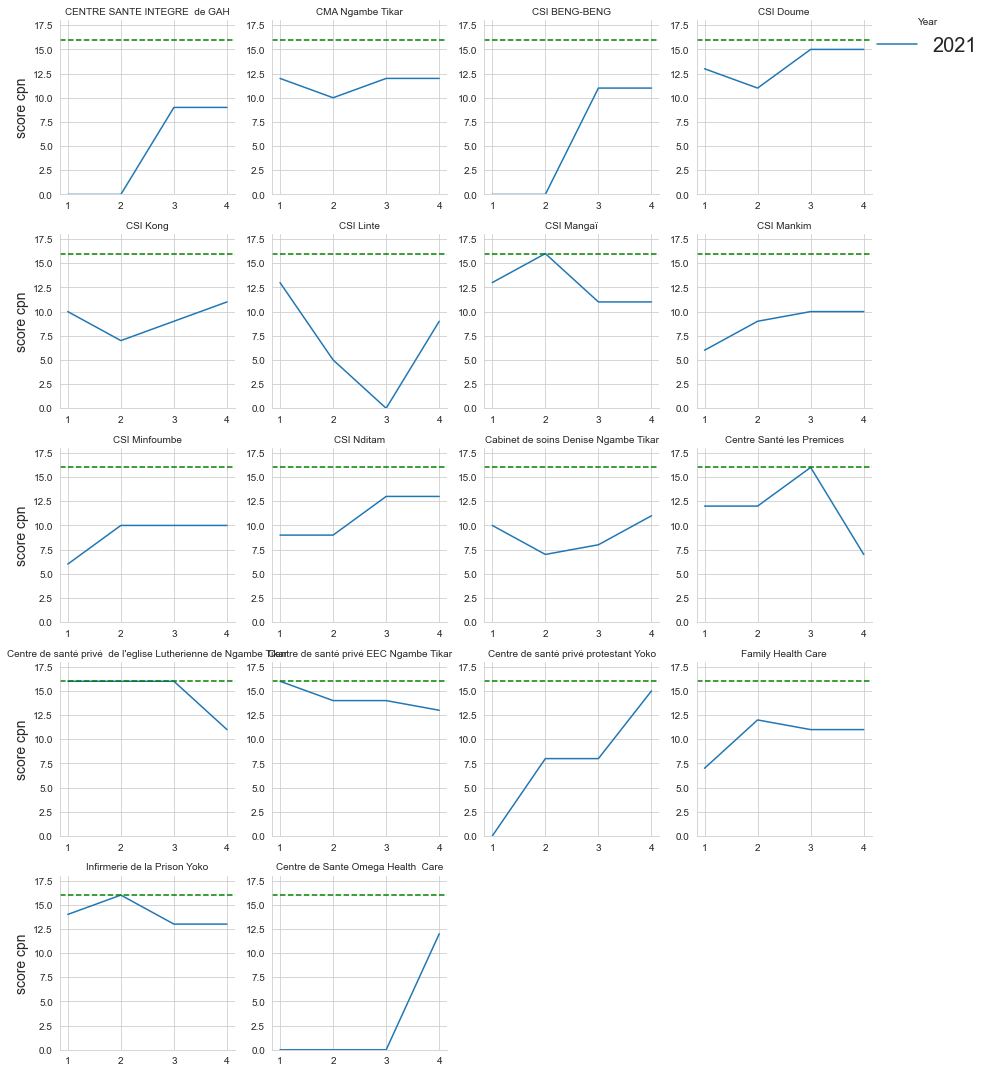

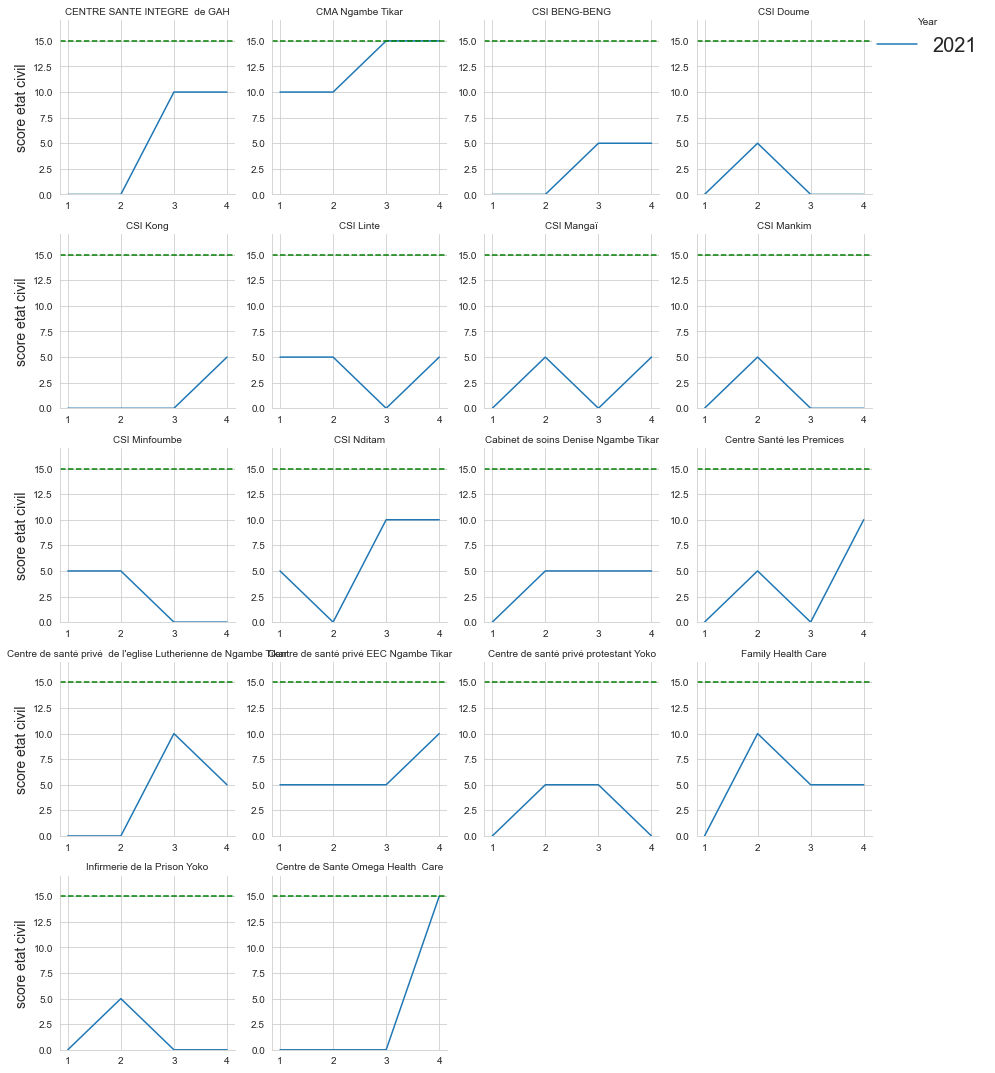

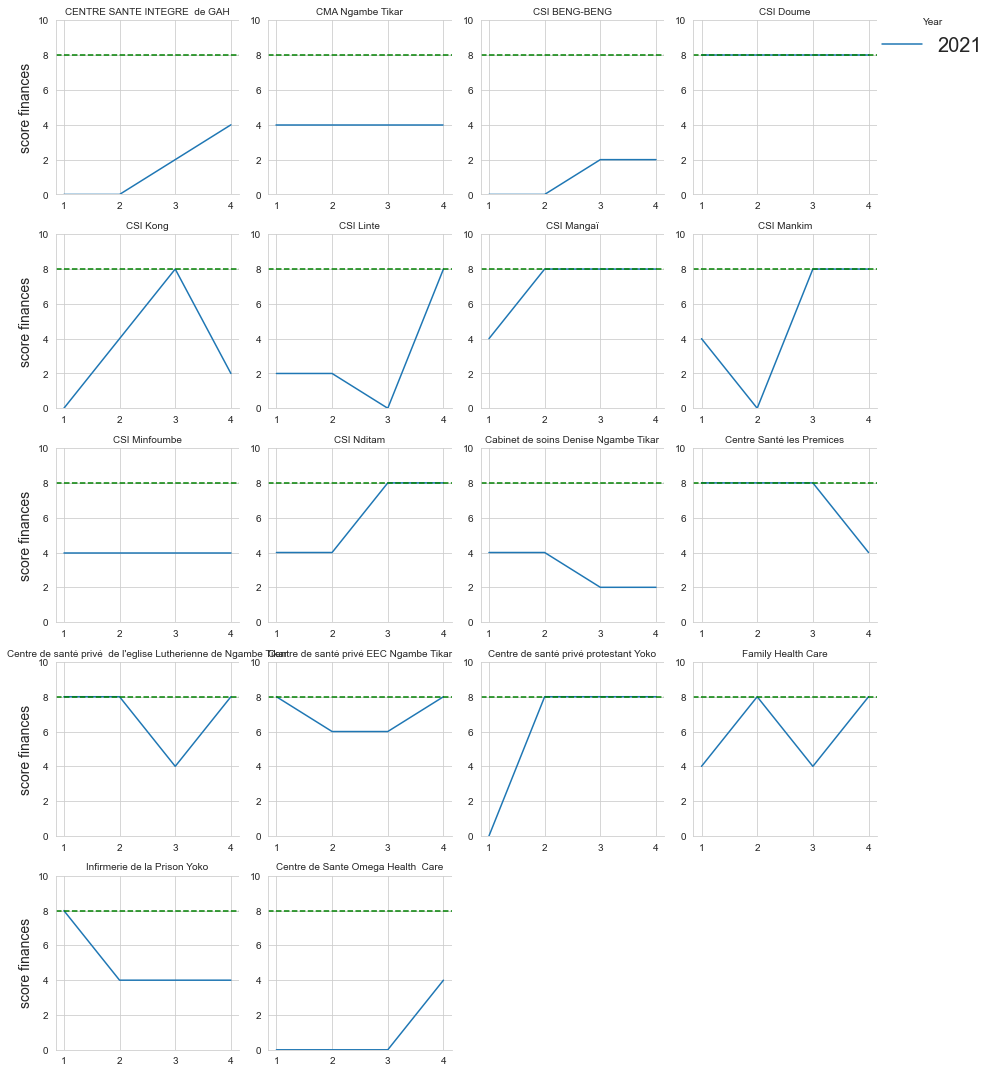

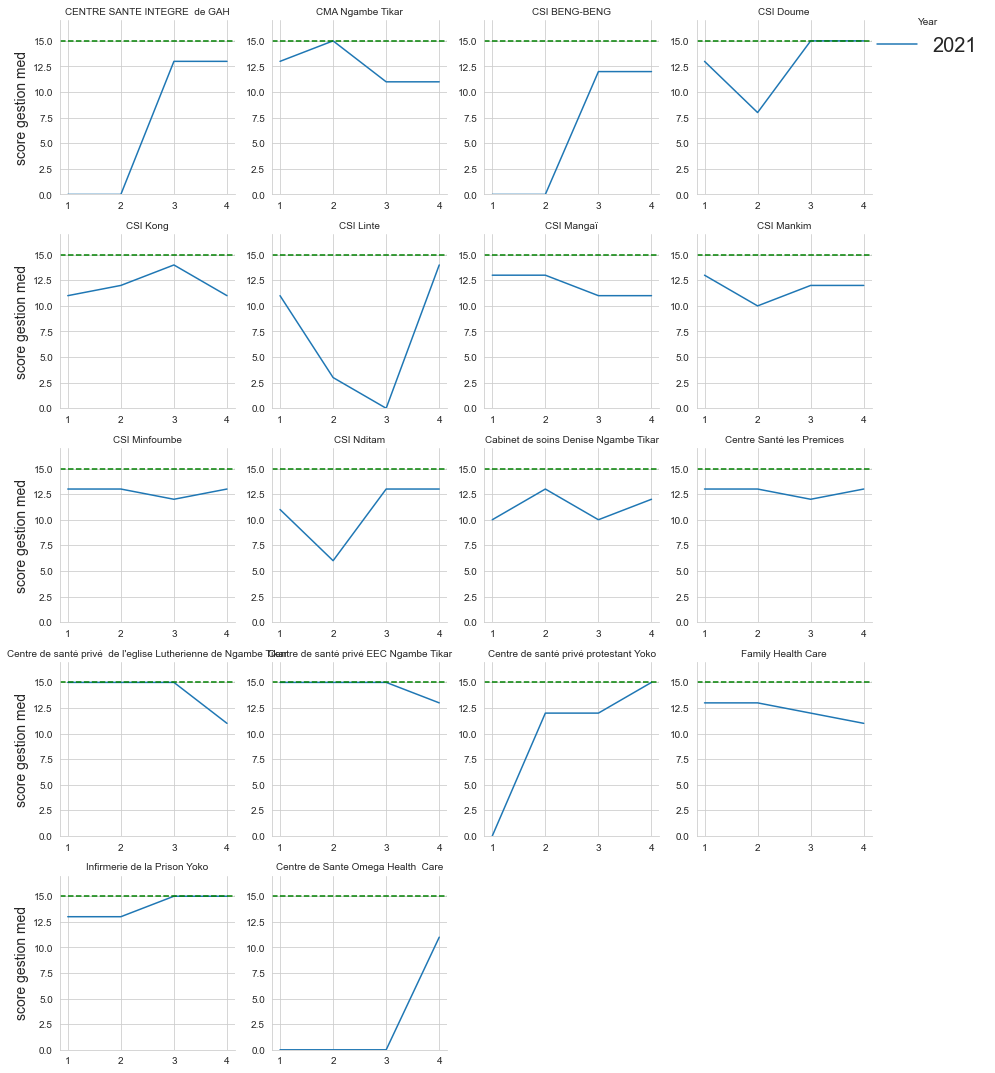

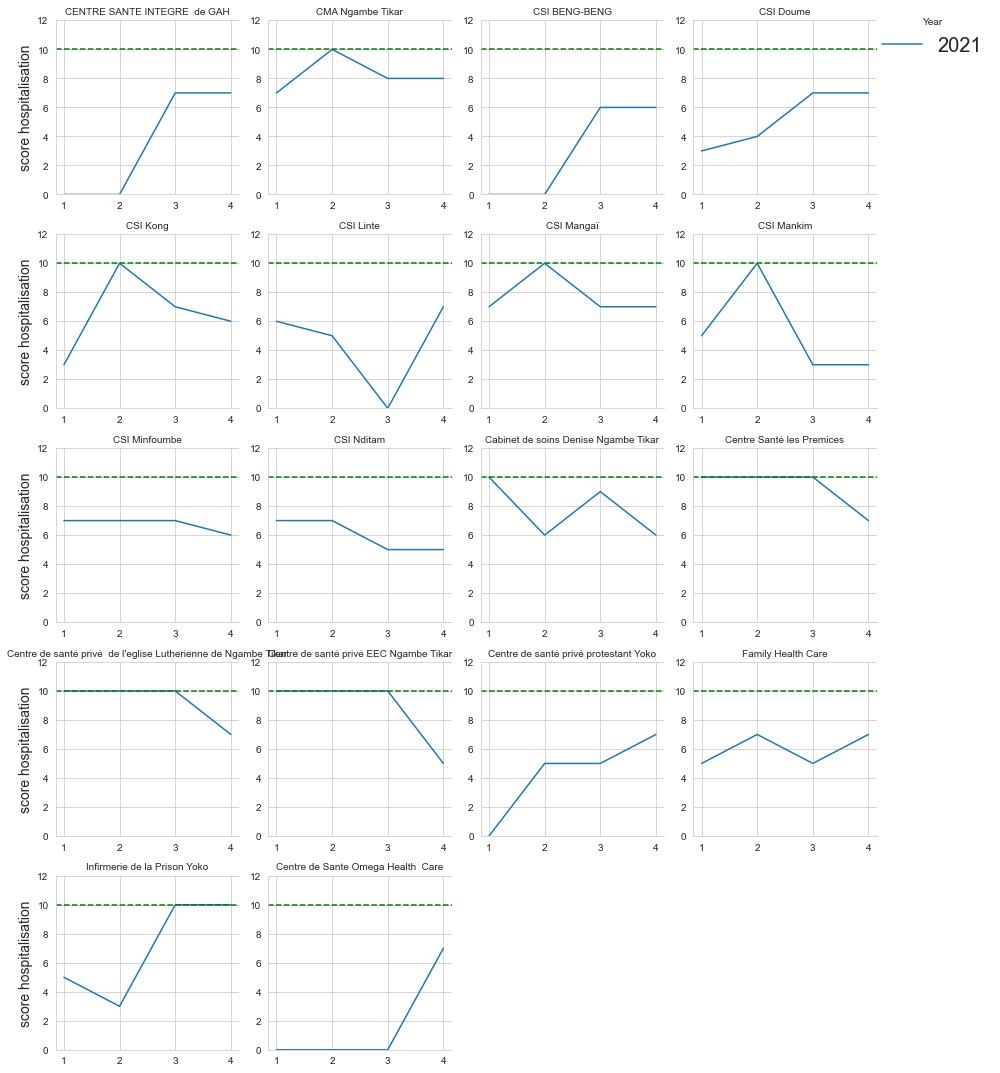

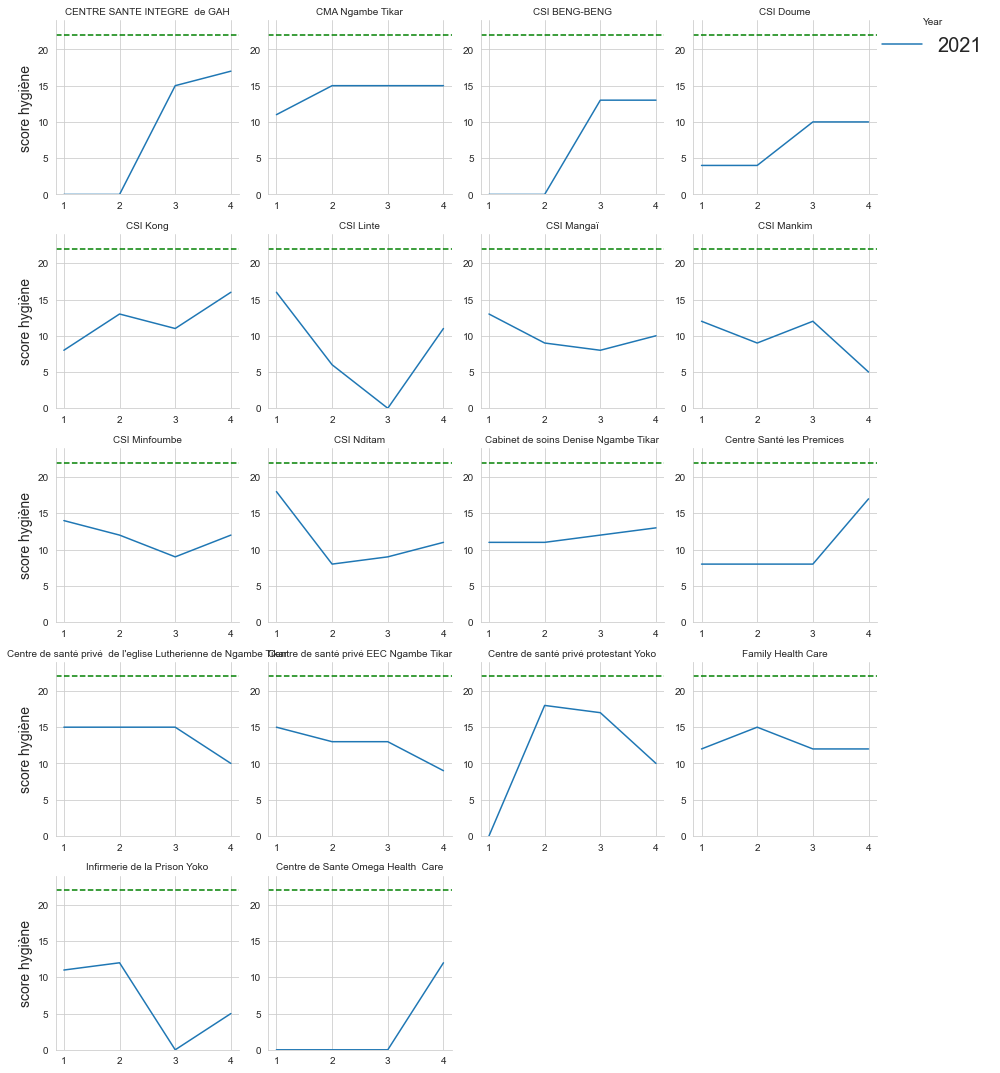

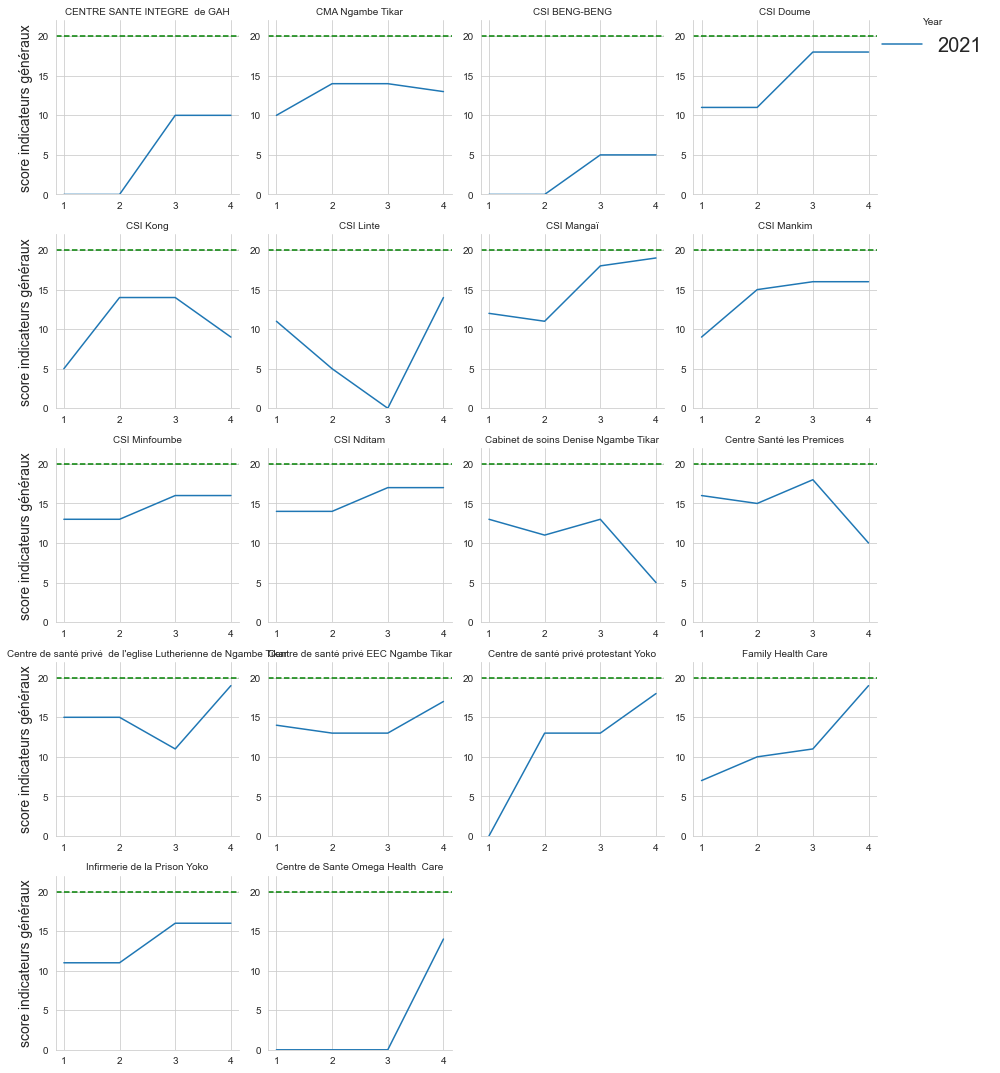

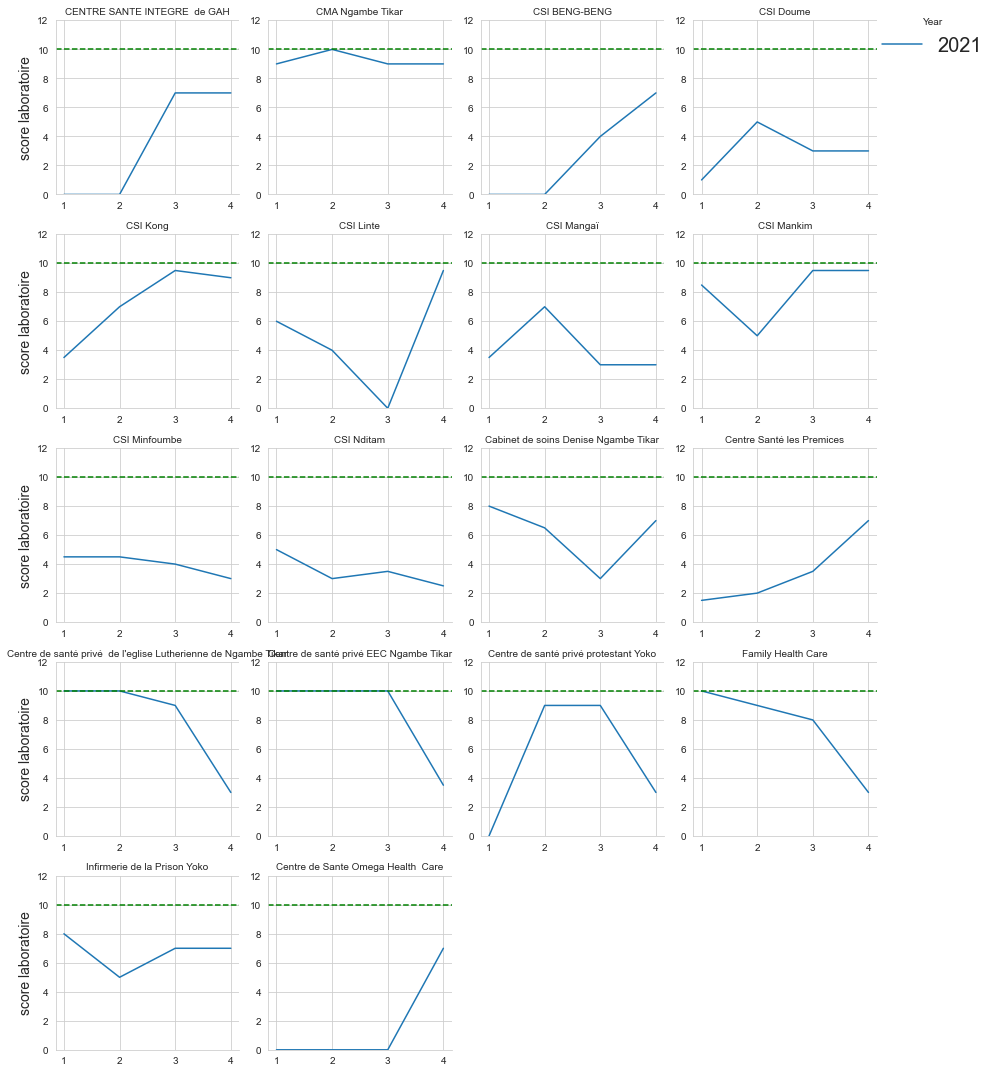

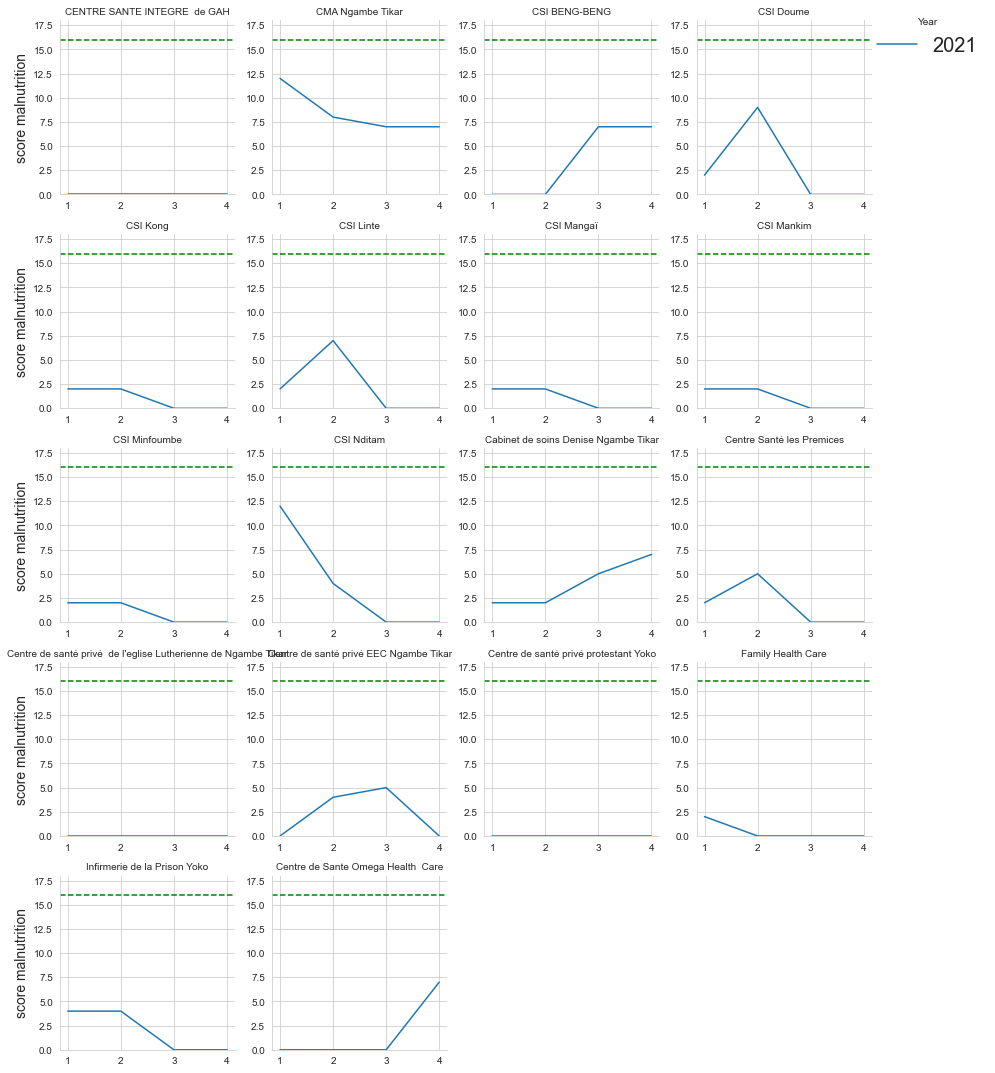

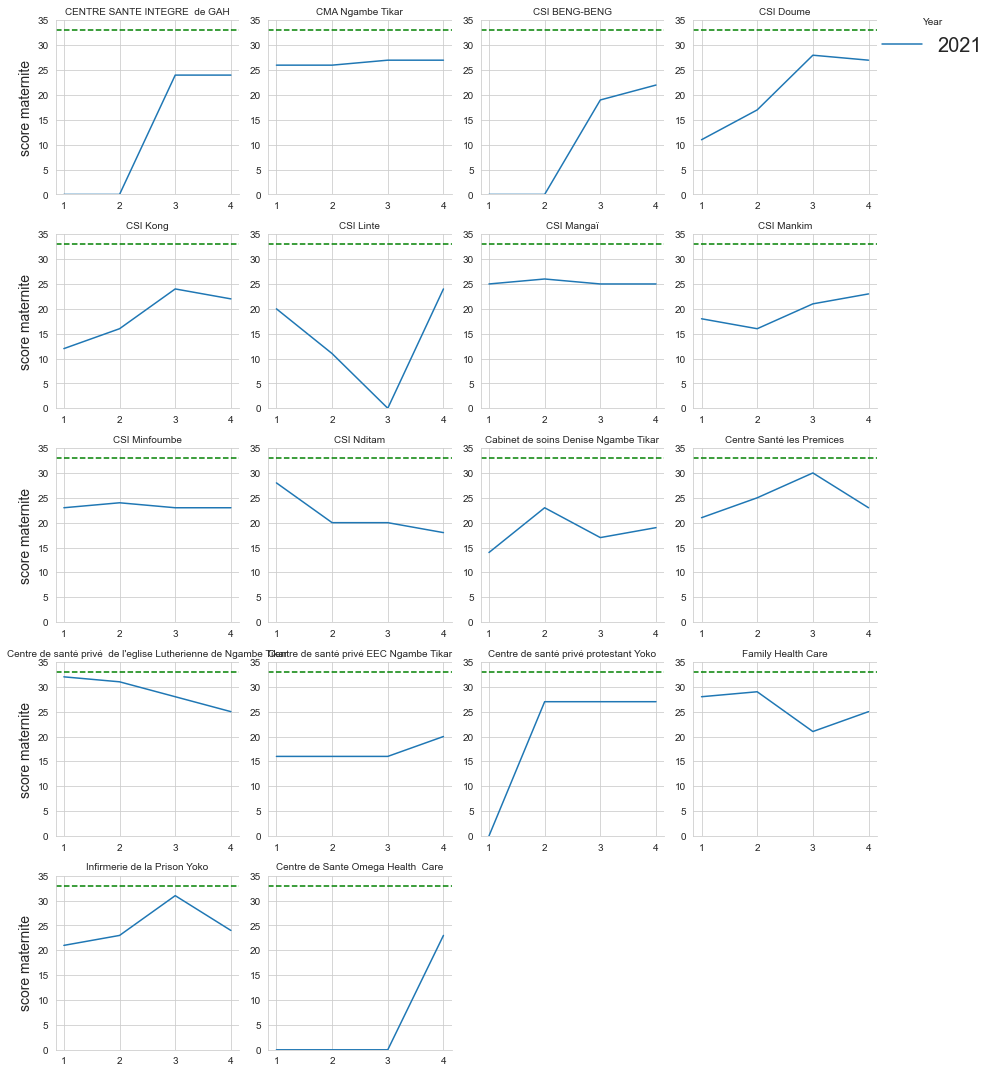

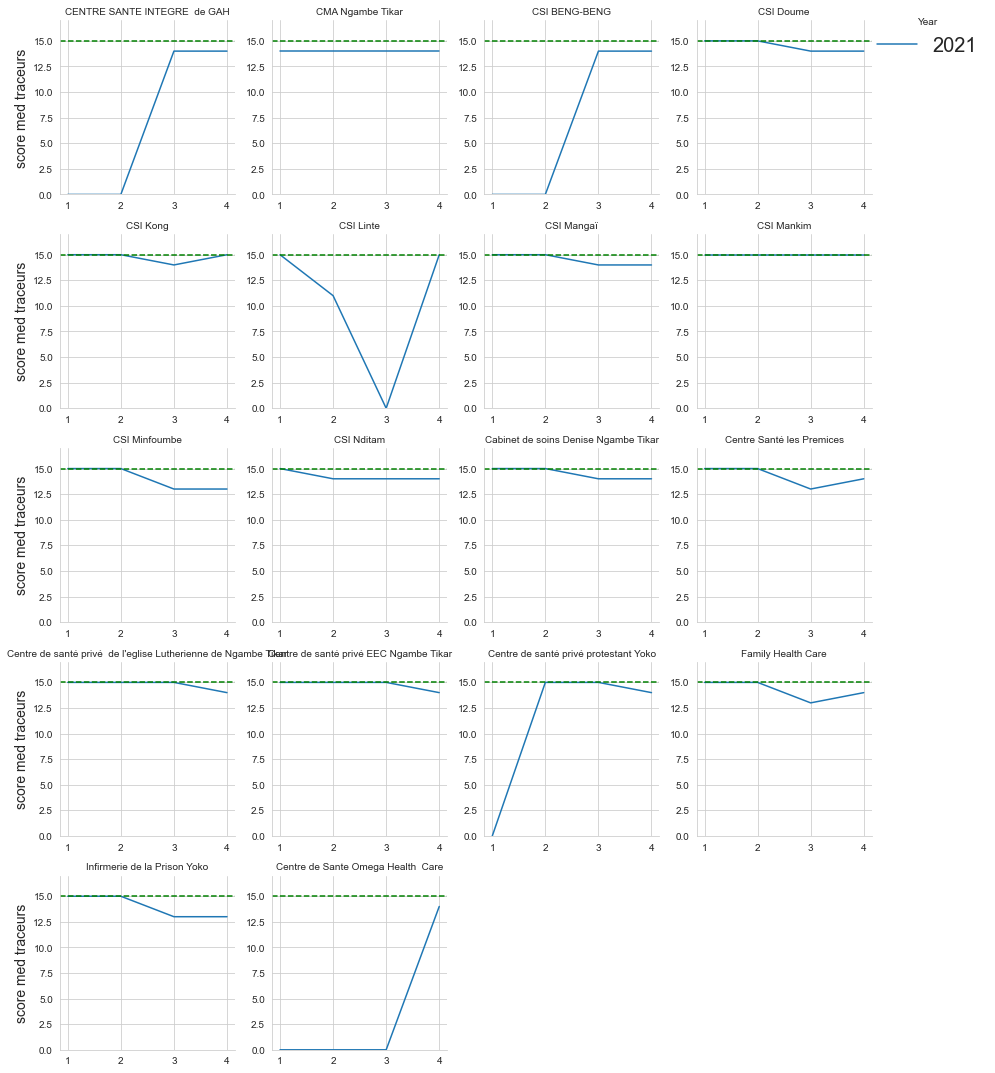

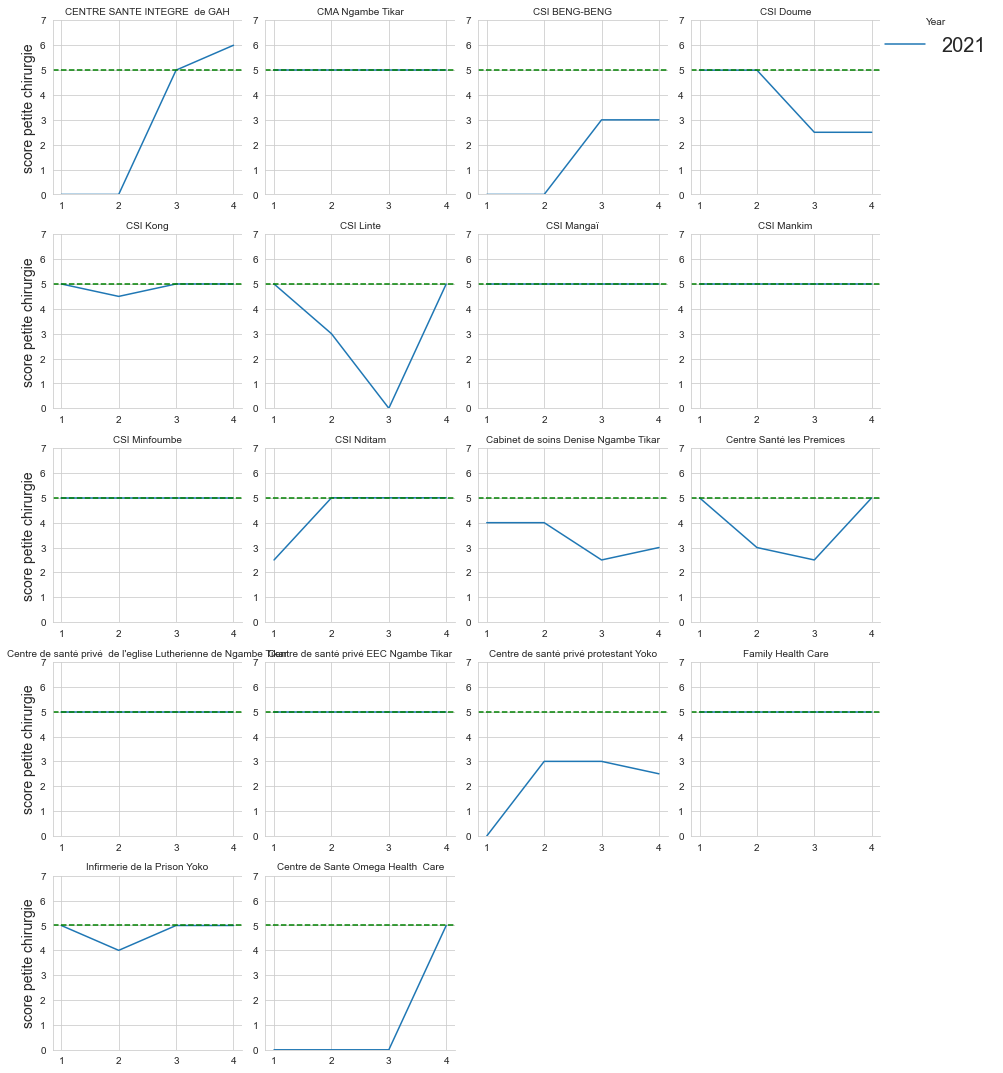

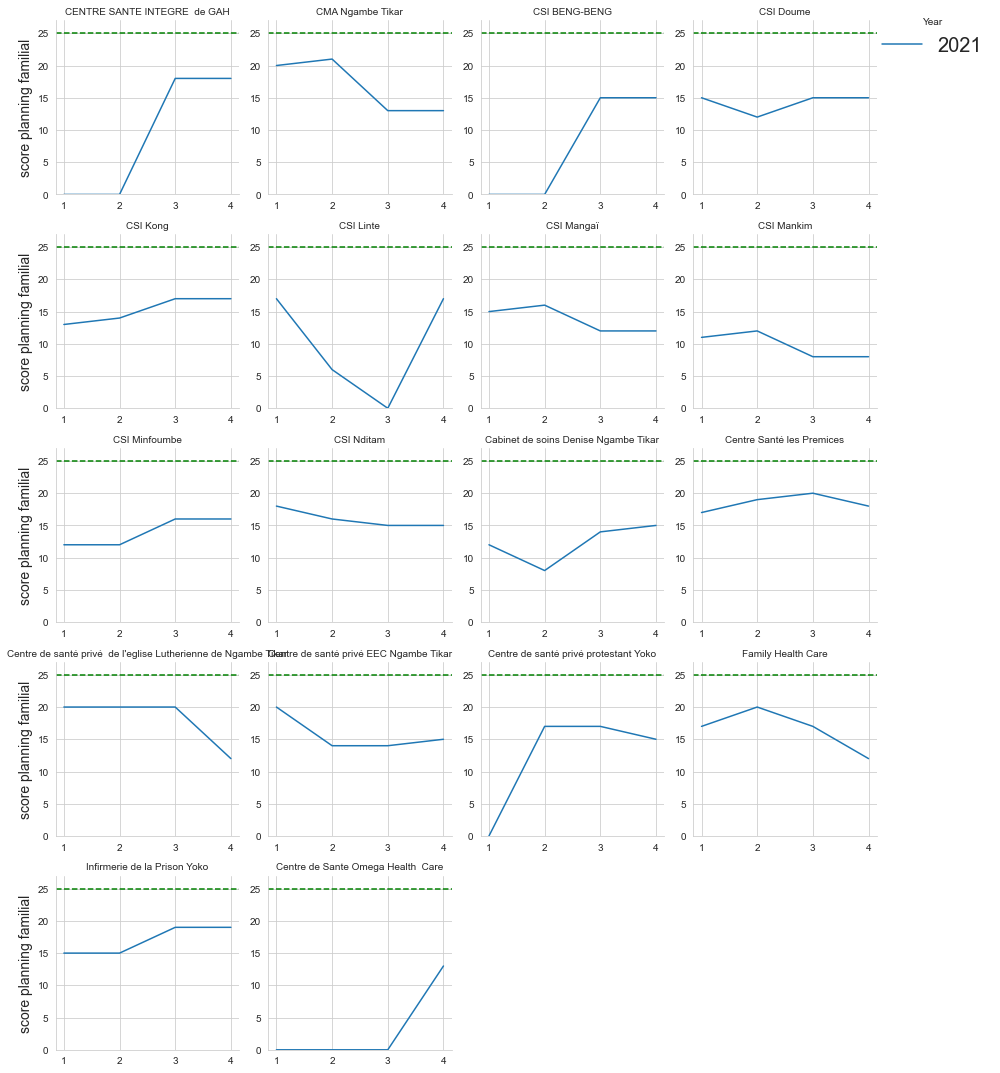

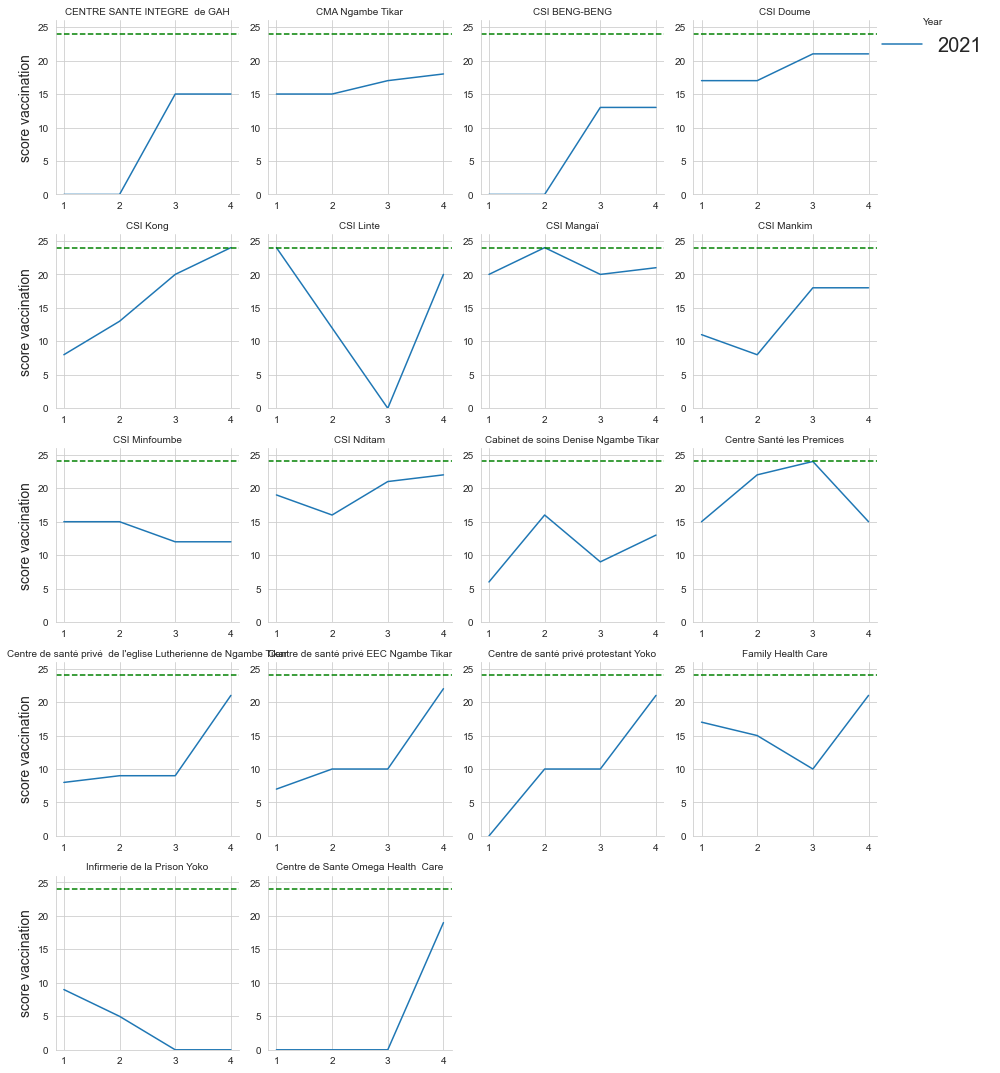

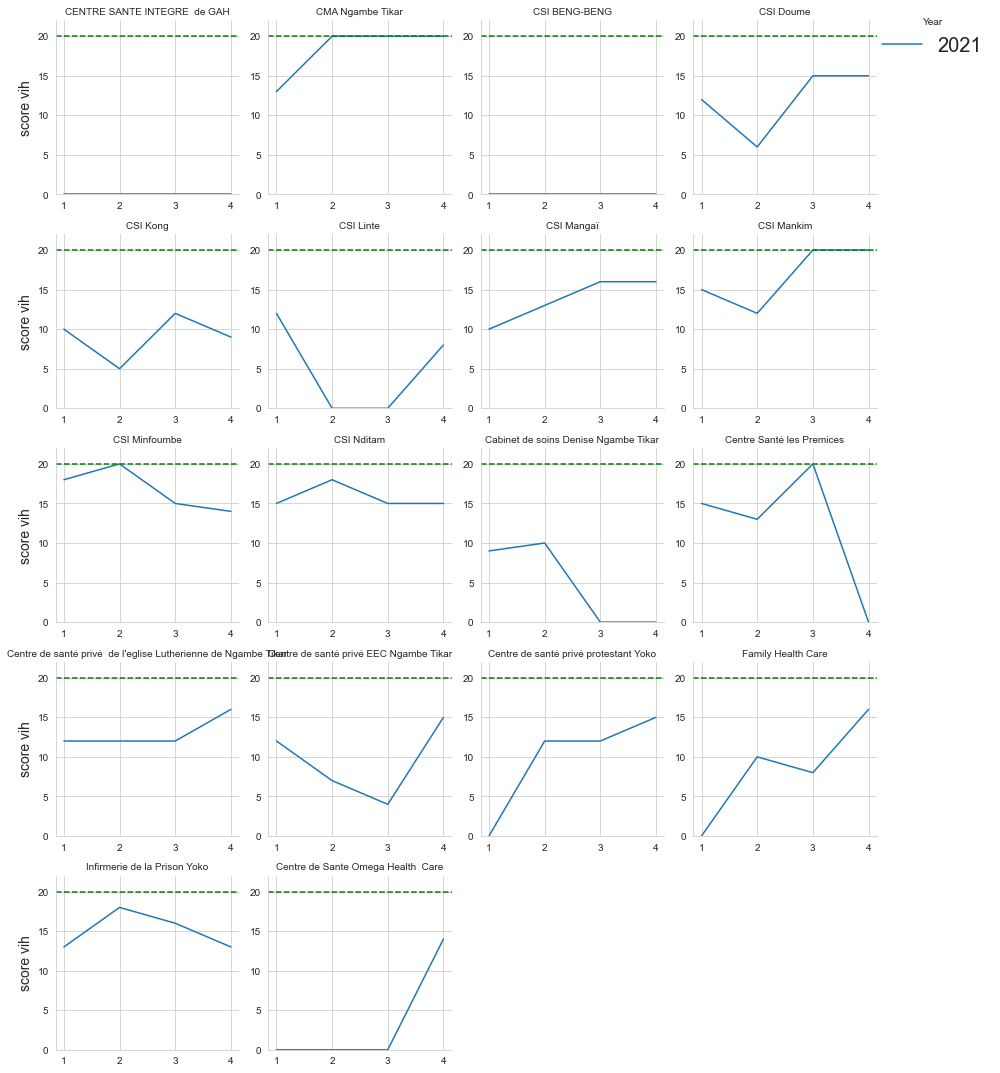

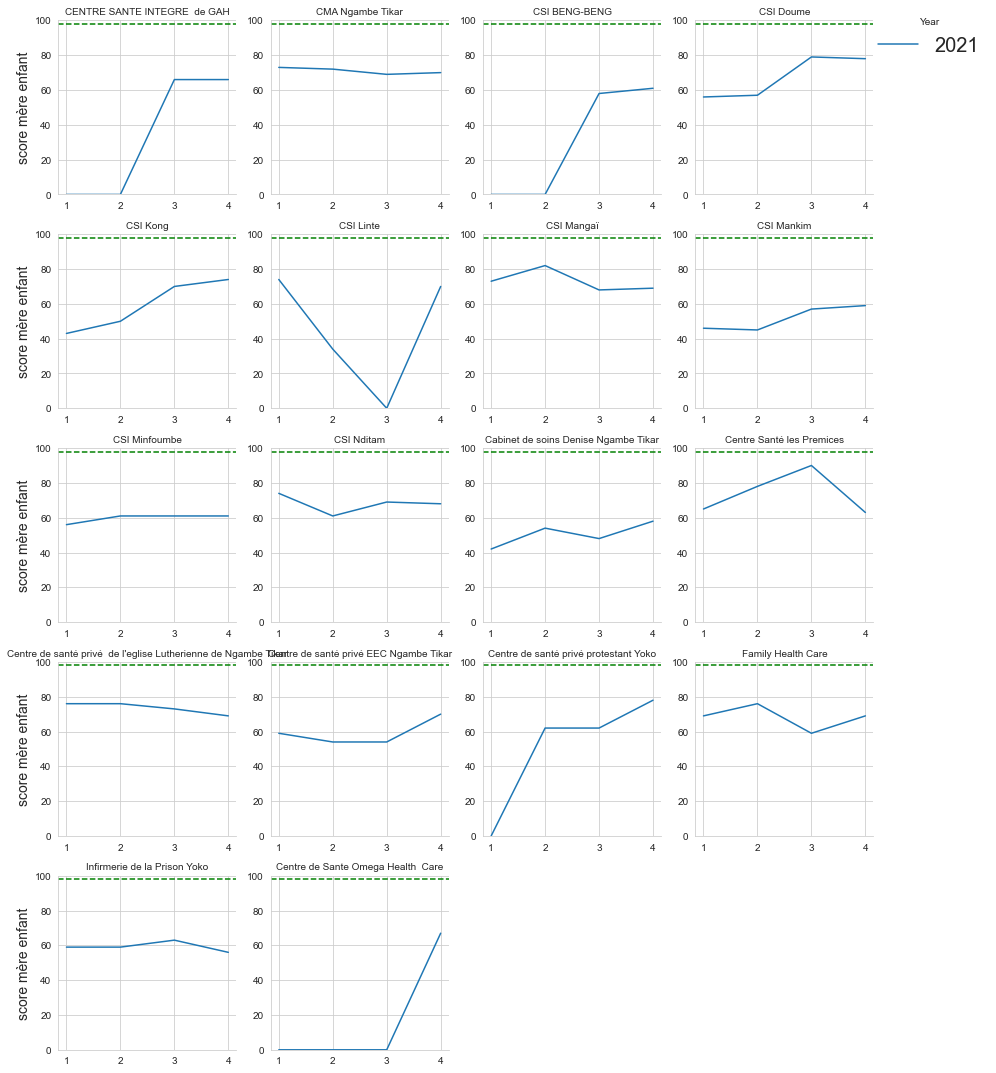

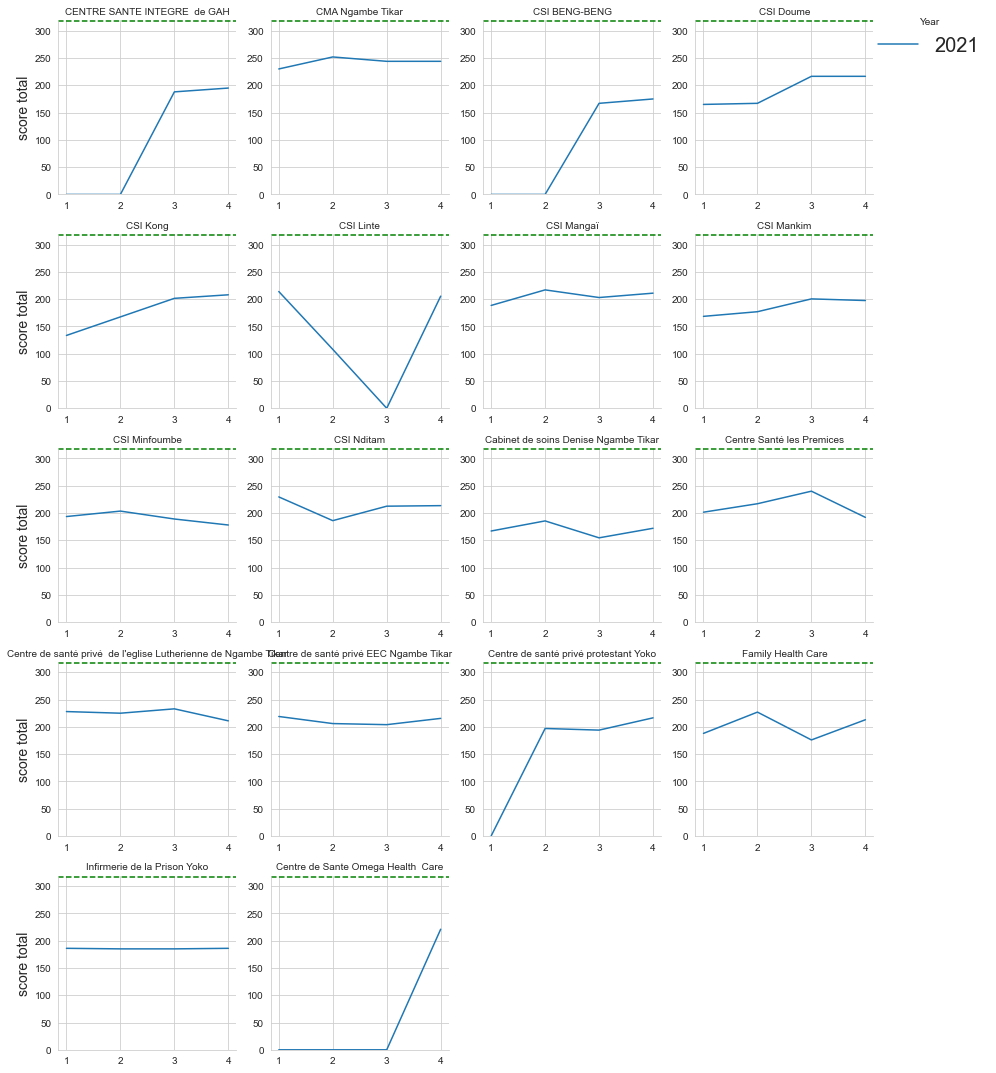

In [98]:
for name, list_cat, score_max in zip(indicateurs_name_list, categories_list, score_max_list):
    globals()[f'scores_{name}'] = get_dataframe(scores, list_cat, indicateurs_FOSA_periode_list)
    globals()[f'scores_{name}_to_print'] = get_dataframe_to_plot(globals()[f'scores_{name}'])
    globals()[f'scores_{name}_to_print'] = get_df_with_trim_and_year(globals()[f'scores_{name}_to_print'])
    globals()[f'scores_{name}_to_print'].to_excel("data_output/" + name + ".xlsx") 
    
    globals()[f'scores_{name}_to_print_2'] = globals()[f'scores_{name}_to_print'].pivot(index="FOSA", columns="Trim", values="score")
    globals()[f'scores_{name}_to_print_2'] = globals()[f'scores_{name}_to_print_2'].reset_index()
    globals()[f'scores_{name}_to_print_2'].columns.name = None
    globals()[f'scores_{name}_to_print_2']['moyenne'] = round((globals()[f'scores_{name}_to_print_2']['1'] + globals()[f'scores_{name}_to_print_2']['2'] + globals()[f'scores_{name}_to_print_2']['3'] +  globals()[f'scores_{name}_to_print_2']['4'])/4, 2)
    globals()[f'scores_{name}_to_print_2']['evolution_3_to_4'] = globals()[f'scores_{name}_to_print_2']['4'] - globals()[f'scores_{name}_to_print_2']['3']
    globals()[f'scores_{name}_to_print_2'].to_excel("data_output/" + name + "_2.xlsx")
        
    g = sns.FacetGrid(globals()[f'scores_{name}_to_print'], col = "FOSA", col_wrap = 4, sharey=False, sharex=False, ylim=[0,score_max + 2], hue="Year")
    g.map_dataframe(sns.lineplot, x="Trim", y="score")
    g.map_dataframe(add_max_score, score_max=score_max)
    g.add_legend(loc='upper right', fontsize=20);
    g.set_titles(col_template='{col_name}')
    g.set_axis_labels(None, 'score ' + name, fontsize=14);
    g.savefig("images/Performance_evolution/" + name + "_2")

# Détails des performance (score) de chaque indicateurs par formation sanitaire et reroupées par catégorie de la santé mère enfant

# Vaccination

In [99]:
vaccination_df = get_dataframe(scores, indicateurs_vaccinations_list, indicateurs_FOSA_periode_list)

In [100]:
vaccination_df

chaîne du froid ace thermomètre  registre PEV  \
0                                NaN           NaN   
1                                NaN           NaN   
2                                3.0           1.0   
3                                3.0           1.0   
4                                NaN           NaN   
..                               ...           ...   
235                              NaN           NaN   
236                              NaN           NaN   
237                              NaN           NaN   
238                              NaN           NaN   
239                              NaN           NaN   

     conditions d'attente adéquates pour PEV  jetons au PEV  pèse bébé au PEV  \
0                                        NaN            NaN               NaN   
1                                        NaN            NaN               NaN   
2                                        1.0            1.0               1.0   
3                                        1.0            1.0               1.0   
4                                        NaN            NaN               NaN   
..                                       ...            ...               ...   
235                                      NaN            NaN               NaN   
236                                      NaN            NaN               NaN   
237                                      NaN            NaN               NaN   
238                                      NaN            NaN               NaN   
239                                      NaN            NaN               NaN   

     planning PEV  90 % de séance PEV réalisées  liste de PDV PEV  \
0             NaN                           NaN               NaN   
1             NaN                           NaN               NaN   
2             NaN                           NaN               NaN   
3             NaN                           NaN               NaN   
4             NaN                           NaN               NaN   
..            ...                           ...               ...   
235           NaN                           NaN               NaN   
236           NaN                           NaN               NaN   
237           NaN                           NaN               NaN   
238           NaN                           NaN               NaN   
239           NaN                           NaN               NaN   

     besoins en vaccins connus  vaccins disponibles  ...  \
0                          NaN                  NaN  ...   
1                          NaN                  NaN  ...   
2                          2.0                  NaN  ...   
3                          2.0                  NaN  ...   
4                          NaN                  NaN  ...   
..                         ...                  ...  ...   
235                        NaN                  NaN  ...   
236                        NaN                  NaN  ...   
237                        NaN                  NaN  ...   
238                        NaN                  NaN  ...   
239                        NaN                  NaN  ...   

     chaîne du froid avec energie  accumulateurs congélés  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             1.0                     1.0   
3                             1.0                     1.0   
4                             NaN                     NaN   
..                            ...                     ...   
235                           NaN                     NaN   
236                           NaN                     NaN   
237                           NaN                     NaN   
238                           NaN                     NaN   
239                           NaN                     NaN   

     seringues disponibles au PEV  déchets dans sacs poubelles au PEV  \
0                          

In [101]:
vaccination_df = vaccination_df.drop(columns=["Trimestre", "période"], axis=1)
vaccination_df

chaîne du froid ace thermomètre  registre PEV  \
0                                NaN           NaN   
1                                NaN           NaN   
2                                3.0           1.0   
3                                3.0           1.0   
4                                NaN           NaN   
..                               ...           ...   
235                              NaN           NaN   
236                              NaN           NaN   
237                              NaN           NaN   
238                              NaN           NaN   
239                              NaN           NaN   

     conditions d'attente adéquates pour PEV  jetons au PEV  pèse bébé au PEV  \
0                                        NaN            NaN               NaN   
1                                        NaN            NaN               NaN   
2                                        1.0            1.0               1.0   
3                                        1.0            1.0               1.0   
4                                        NaN            NaN               NaN   
..                                       ...            ...               ...   
235                                      NaN            NaN               NaN   
236                                      NaN            NaN               NaN   
237                                      NaN            NaN               NaN   
238                                      NaN            NaN               NaN   
239                                      NaN            NaN               NaN   

     planning PEV  90 % de séance PEV réalisées  liste de PDV PEV  \
0             NaN                           NaN               NaN   
1             NaN                           NaN               NaN   
2             NaN                           NaN               NaN   
3             NaN                           NaN               NaN   
4             NaN                           NaN               NaN   
..            ...                           ...               ...   
235           NaN                           NaN               NaN   
236           NaN                           NaN               NaN   
237           NaN                           NaN               NaN   
238           NaN                           NaN               NaN   
239           NaN                           NaN               NaN   

     besoins en vaccins connus  vaccins disponibles  vaccins rangés  \
0                          NaN                  NaN             NaN   
1                          NaN                  NaN             NaN   
2                          2.0                  NaN             1.0   
3                          2.0                  NaN             1.0   
4                          NaN                  NaN             NaN   
..                         ...                  ...             ...   
235                        NaN                  NaN             NaN   
236                        NaN                  NaN             NaN   
237                        NaN                  NaN             NaN   
238                        NaN                  NaN             NaN   
239                        NaN                  NaN             NaN   

     chaîne du froid avec energie  accumulateurs congélés  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             1.0                     1.0   
3                             1.0                     1.0   
4                             NaN                     NaN   
..                            ...                     ...   
235                           NaN                     NaN   
236                           NaN                     NaN   
237                           NaN                     NaN   
238                           NaN                     NaN   
239                           

In [102]:
vaccination_df_melt = vaccination_df.melt(id_vars=["FOSA", "Year", "Trim"])
vaccination_df_melt

FOSA  Year Trim  \
0           CENTRE SANTE INTEGRE  de GAH  2021    1   
1           CENTRE SANTE INTEGRE  de GAH  2021    2   
2           CENTRE SANTE INTEGRE  de GAH  2021    3   
3           CENTRE SANTE INTEGRE  de GAH  2021    4   
4           CENTRE SANTE INTEGRE  de GAH  2020    1   
...                                  ...   ...  ...   
3451  Centre de Sante Omega Health  Care  2020    4   
3452  Centre de Sante Omega Health  Care  2019    1   
3453  Centre de Sante Omega Health  Care  2019    2   
3454  Centre de Sante Omega Health  Care  2019    3   
3455  Centre de Sante Omega Health  Care  2019    4   

                              variable  value  
0      chaîne du froid ace thermomètre    NaN  
1      chaîne du froid ace thermomètre    NaN  
2      chaîne du froid ace thermomètre    3.0  
3      chaîne du froid ace thermomètre    3.0  
4      chaîne du froid ace thermomètre    NaN  
...                                ...    ...  
3451  carnet de vaccination disponible    NaN  
3452  carnet de vaccination disponible    NaN  
3453  carnet de vaccination disponible    NaN  
3454  carnet de vaccination disponible    NaN  
3455  carnet de vaccination disponible    NaN  

[3456 rows x 5 columns]

In [103]:
vaccination_df_melt = vaccination_df_melt[(vaccination_df_melt["Year"] == "2021") & (vaccination_df_melt["Trim"] == "4")]
vaccination_df_melt

FOSA  Year Trim  \
3               CENTRE SANTE INTEGRE  de GAH  2021    4   
15                          CMA Ngambe Tikar  2021    4   
27                             CSI BENG-BENG  2021    4   
39                                 CSI Doume  2021    4   
51                                  CSI Kong  2021    4   
...                                      ...   ...  ...   
3399  Centre de santé privé EEC Ngambe Tikar  2021    4   
3411   Centre de santé privé protestant Yoko  2021    4   
3423                      Family Health Care  2021    4   
3435            Infirmerie de la Prison Yoko  2021    4   
3447      Centre de Sante Omega Health  Care  2021    4   

                              variable  value  
3      chaîne du froid ace thermomètre    3.0  
15     chaîne du froid ace thermomètre    NaN  
27     chaîne du froid ace thermomètre    NaN  
39     chaîne du froid ace thermomètre    3.0  
51     chaîne du froid ace thermomètre    3.0  
...                                ...    ...  
3399  carnet de vaccination disponible    1.0  
3411  carnet de vaccination disponible    1.0  
3423  carnet de vaccination disponible    1.0  
3435  carnet de vaccination disponible    NaN  
3447  carnet de vaccination disponible    1.0  

[288 rows x 5 columns]

In [104]:
vaccination_df_melt = vaccination_df_melt.fillna(0)
vaccination_df_melt

FOSA  Year Trim  \
3               CENTRE SANTE INTEGRE  de GAH  2021    4   
15                          CMA Ngambe Tikar  2021    4   
27                             CSI BENG-BENG  2021    4   
39                                 CSI Doume  2021    4   
51                                  CSI Kong  2021    4   
...                                      ...   ...  ...   
3399  Centre de santé privé EEC Ngambe Tikar  2021    4   
3411   Centre de santé privé protestant Yoko  2021    4   
3423                      Family Health Care  2021    4   
3435            Infirmerie de la Prison Yoko  2021    4   
3447      Centre de Sante Omega Health  Care  2021    4   

                              variable  value  
3      chaîne du froid ace thermomètre    3.0  
15     chaîne du froid ace thermomètre    0.0  
27     chaîne du froid ace thermomètre    0.0  
39     chaîne du froid ace thermomètre    3.0  
51     chaîne du froid ace thermomètre    3.0  
...                                ...    ...  
3399  carnet de vaccination disponible    1.0  
3411  carnet de vaccination disponible    1.0  
3423  carnet de vaccination disponible    1.0  
3435  carnet de vaccination disponible    0.0  
3447  carnet de vaccination disponible    1.0  

[288 rows x 5 columns]

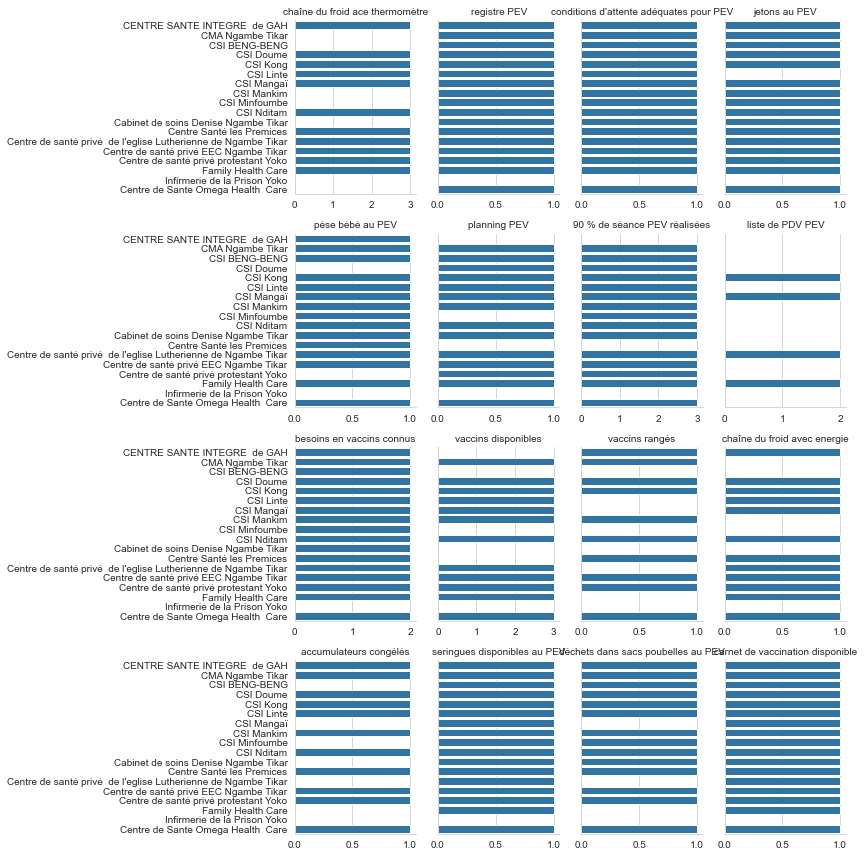

In [105]:
g = sns.FacetGrid(vaccination_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
#g.set_axis_labels(None, 'score ', fontsize=14);
g.savefig("images/Performance_evolution/" + "vaccination_details_2")

# Consultations prénatales

In [106]:
cpn_df = get_dataframe(scores, indicateurs_cpn_list, indicateurs_FOSA_periode_list)
cpn_df = cpn_df.drop(columns=["Trimestre", "période"], axis=1)
cpn_df_melt = cpn_df.melt(id_vars=["FOSA", "Year", "Trim"])
cpn_df_melt = cpn_df_melt[(cpn_df_melt["Year"] == "2021") & (cpn_df_melt["Trim"] == "4")]
cpn_df_melt = cpn_df_melt.fillna(0)

''

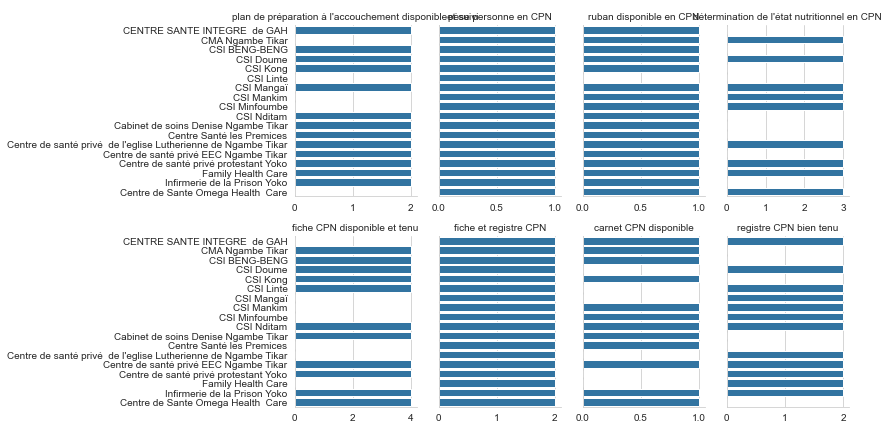

In [107]:
g = sns.FacetGrid(cpn_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right');
g.set_titles(col_template='{col_name}')
#g.set_axis_labels(None, 'score ', fontsize=14);
g.savefig("images/Performance_evolution/" + "cpn_detail_2")
;

# Maternité

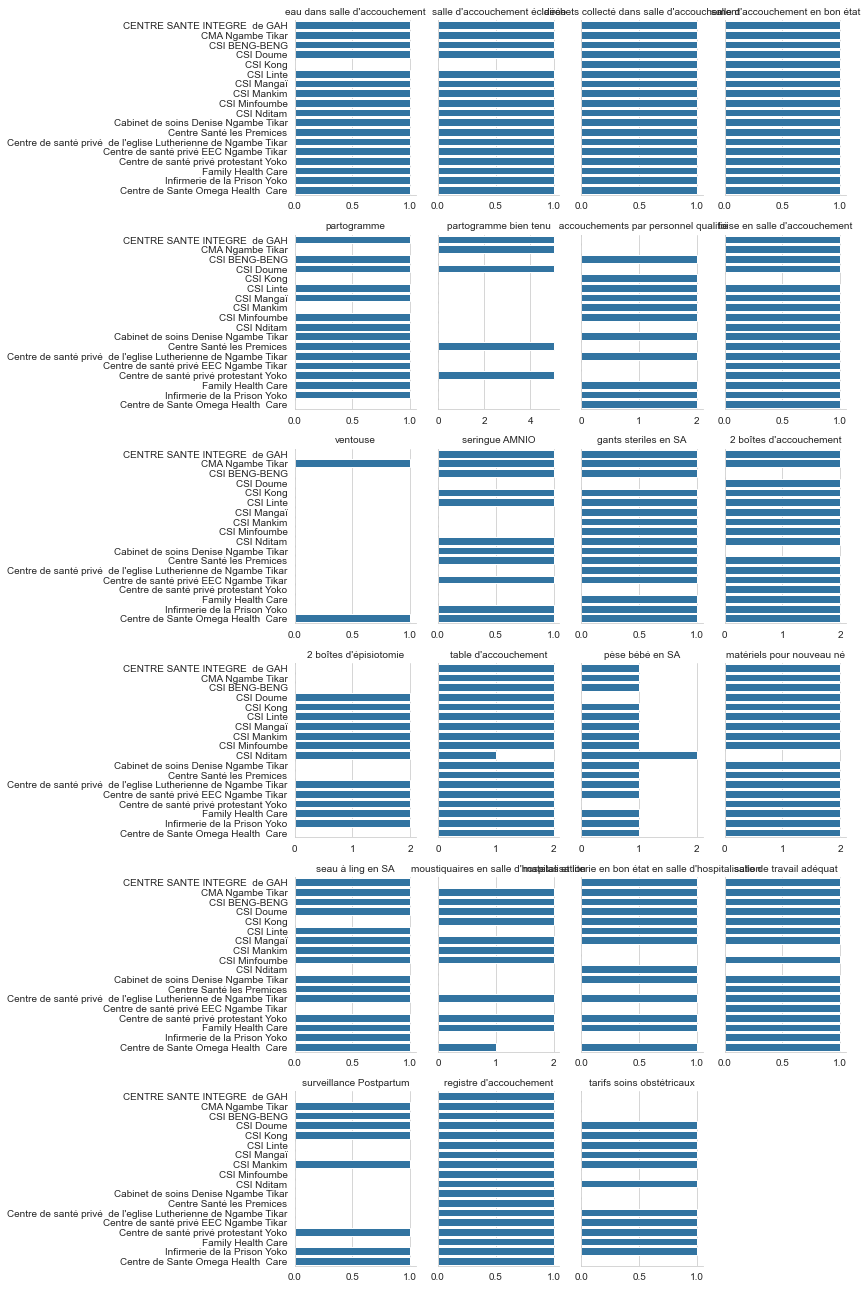

In [108]:
maternite_df = get_dataframe(scores, indicateurs_maternite_list, indicateurs_FOSA_periode_list)
maternite_df = maternite_df.drop(columns=["Trimestre", "période"], axis=1)
maternite_df_melt = maternite_df.melt(id_vars=["FOSA", "Year", "Trim"])
maternite_df_melt = maternite_df_melt[(maternite_df_melt["Year"] == "2021") & (maternite_df_melt["Trim"] == "4")]
maternite_df_melt = maternite_df_melt.fillna(0)
g = sns.FacetGrid(maternite_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.savefig("images/Performance_evolution/" + "maternite_detail_2")

# Planning familial

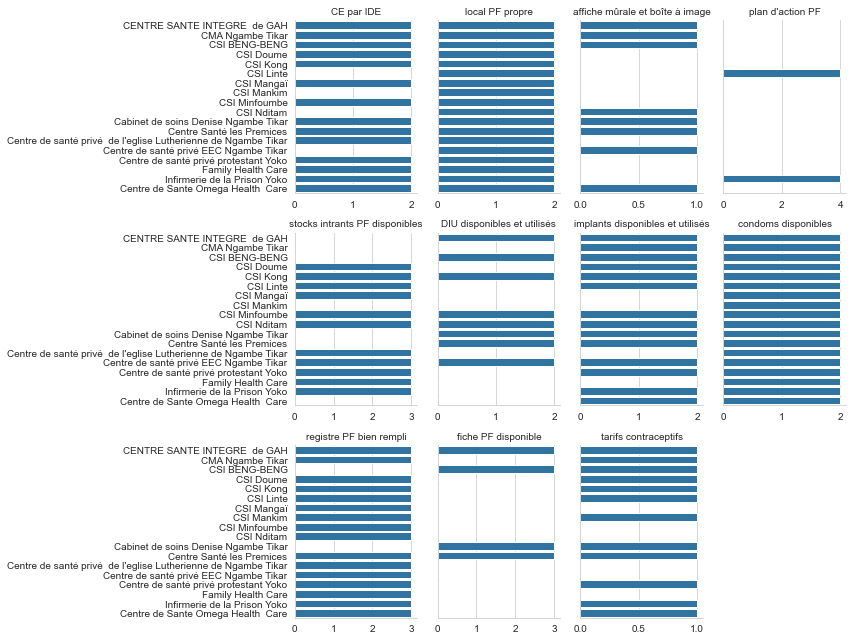

In [109]:
planning_df = get_dataframe(scores, indicateurs_pf_list, indicateurs_FOSA_periode_list)
planning_df = planning_df.drop(columns=["Trimestre", "période"], axis=1)
planning_df_melt = planning_df.melt(id_vars=["FOSA", "Year", "Trim"])
planning_df_melt = planning_df_melt[(planning_df_melt["Year"] == "2021") & (planning_df_melt["Trim"] == "4")]
planning_df_melt = planning_df_melt.fillna(0)
g = sns.FacetGrid(planning_df_melt, col = "variable", col_wrap = 4, sharex=False)
g.map_dataframe(sns.barplot, x="value", y="FOSA")
g.add_legend(loc='upper right', fontsize=20);
g.set_titles(col_template='{col_name}')
g.savefig("images/Performance_evolution/" + "planning_detail_2")

## Données manquantes - catégorie vaccination - 2021

In [110]:
vaccination_df

chaîne du froid ace thermomètre  registre PEV  \
0                                NaN           NaN   
1                                NaN           NaN   
2                                3.0           1.0   
3                                3.0           1.0   
4                                NaN           NaN   
..                               ...           ...   
235                              NaN           NaN   
236                              NaN           NaN   
237                              NaN           NaN   
238                              NaN           NaN   
239                              NaN           NaN   

     conditions d'attente adéquates pour PEV  jetons au PEV  pèse bébé au PEV  \
0                                        NaN            NaN               NaN   
1                                        NaN            NaN               NaN   
2                                        1.0            1.0               1.0   
3                                        1.0            1.0               1.0   
4                                        NaN            NaN               NaN   
..                                       ...            ...               ...   
235                                      NaN            NaN               NaN   
236                                      NaN            NaN               NaN   
237                                      NaN            NaN               NaN   
238                                      NaN            NaN               NaN   
239                                      NaN            NaN               NaN   

     planning PEV  90 % de séance PEV réalisées  liste de PDV PEV  \
0             NaN                           NaN               NaN   
1             NaN                           NaN               NaN   
2             NaN                           NaN               NaN   
3             NaN                           NaN               NaN   
4             NaN                           NaN               NaN   
..            ...                           ...               ...   
235           NaN                           NaN               NaN   
236           NaN                           NaN               NaN   
237           NaN                           NaN               NaN   
238           NaN                           NaN               NaN   
239           NaN                           NaN               NaN   

     besoins en vaccins connus  vaccins disponibles  vaccins rangés  \
0                          NaN                  NaN             NaN   
1                          NaN                  NaN             NaN   
2                          2.0                  NaN             1.0   
3                          2.0                  NaN             1.0   
4                          NaN                  NaN             NaN   
..                         ...                  ...             ...   
235                        NaN                  NaN             NaN   
236                        NaN                  NaN             NaN   
237                        NaN                  NaN             NaN   
238                        NaN                  NaN             NaN   
239                        NaN                  NaN             NaN   

     chaîne du froid avec energie  accumulateurs congélés  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2                             1.0                     1.0   
3                             1.0                     1.0   
4                             NaN                     NaN   
..                            ...                     ...   
235                           NaN                     NaN   
236                           NaN                     NaN   
237                           NaN                     NaN   
238                           NaN                     NaN   
239                           

In [111]:
vaccination_df_T4_2021 = vaccination_df[(vaccination_df["Year"] == "2021") & (vaccination_df["Trim"] == "4")]

In [112]:
vaccination_df_T4_2021

chaîne du froid ace thermomètre  registre PEV  \
3                                3.0           1.0   
15                               NaN           1.0   
27                               NaN           1.0   
39                               3.0           1.0   
51                               3.0           1.0   
63                               3.0           1.0   
75                               3.0           1.0   
87                               NaN           1.0   
99                               NaN           1.0   
111                              3.0           1.0   
135                              NaN           1.0   
147                              3.0           1.0   
171                              3.0           1.0   
183                              3.0           1.0   
195                              3.0           1.0   
207                              3.0           1.0   
219                              NaN           NaN   
231                              NaN           1.0   

     conditions d'attente adéquates pour PEV  jetons au PEV  pèse bébé au PEV  \
3                                        1.0            1.0               1.0   
15                                       1.0            1.0               1.0   
27                                       1.0            1.0               1.0   
39                                       1.0            1.0               NaN   
51                                       1.0            1.0               1.0   
63                                       1.0            NaN               1.0   
75                                       1.0            1.0               1.0   
87                                       1.0            1.0               1.0   
99                                       1.0            1.0               1.0   
111                                      1.0            1.0               1.0   
135                                      1.0            1.0               1.0   
147                                      1.0            1.0               1.0   
171                                      1.0            1.0               1.0   
183                                      1.0            1.0               1.0   
195                                      1.0            1.0               NaN   
207                                      1.0            1.0               1.0   
219                                      NaN            NaN               NaN   
231                                      1.0            1.0               1.0   

     planning PEV  90 % de séance PEV réalisées  liste de PDV PEV  \
3             NaN                           NaN               NaN   
15            1.0                           3.0               NaN   
27            1.0                           3.0               NaN   
39            1.0                           3.0               NaN   
51            1.0                           3.0               2.0   
63            1.0                           3.0               NaN   
75            1.0                           3.0               2.0   
87            1.0                           3.0               NaN   
99            NaN                           3.0               NaN   
111           1.0                           3.0               NaN   
135           1.0                           3.0               NaN   
147           NaN                           NaN               NaN   
171           1.0                           3.0               2.0   
183           1.0                           3.0               NaN   
195           1.0                           3.0               NaN   
207           1.0                           3.0               2.0   
219           NaN                           NaN               NaN   
231           1.0                           3.0               NaN   

     besoins en vaccins connus  vaccins disponibles  vaccins rangés  \
3                          2.0                  NaN    

In [113]:
vaccination_df_T4_2021 = vaccination_df_T4_2021.set_index(["FOSA", "Year", "Trim"])
vaccination_df_T4_2021 = vaccination_df_T4_2021.isnull()

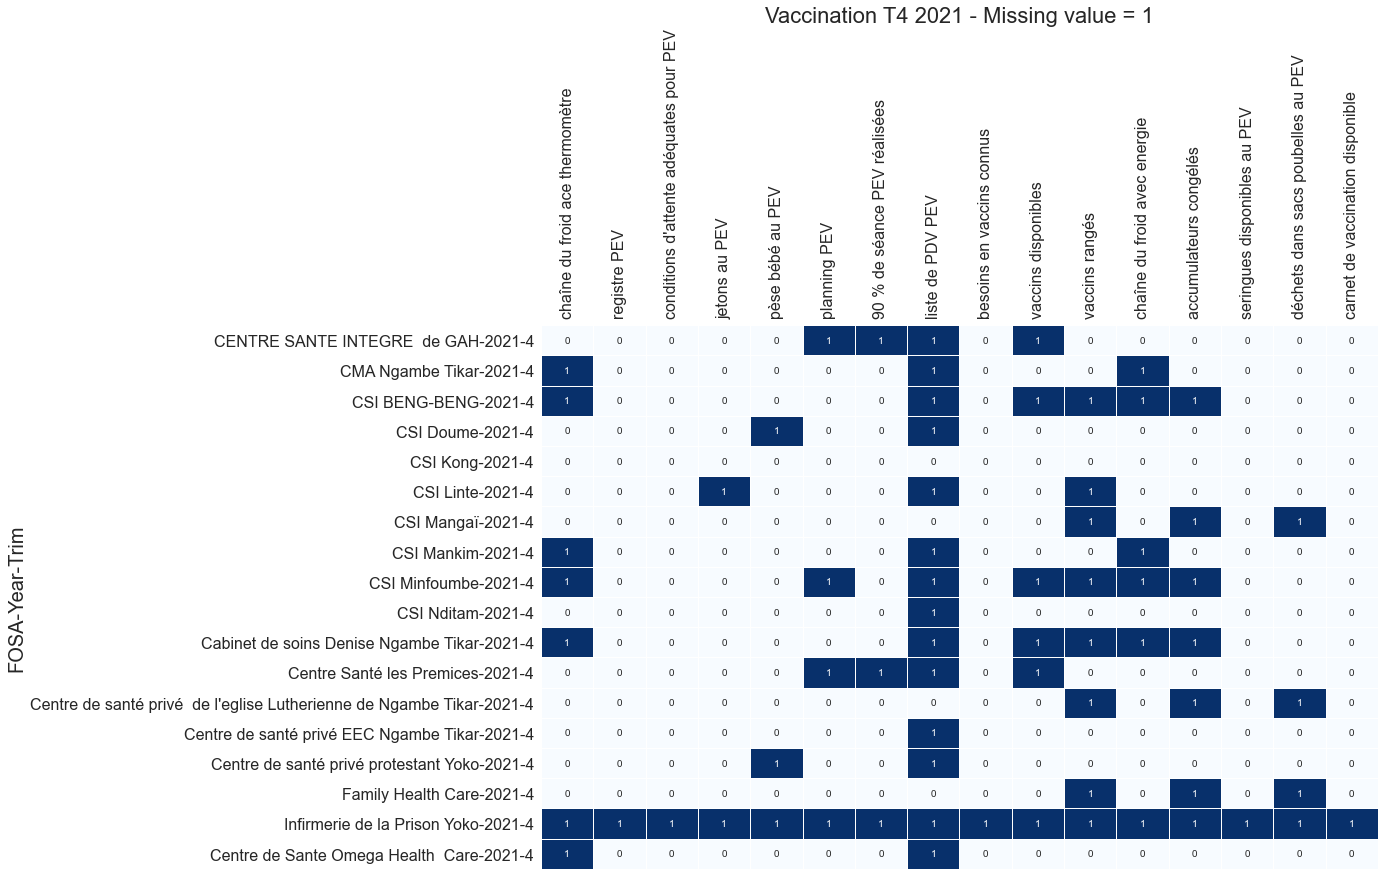

In [114]:
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.heatmap(vaccination_df_T4_2021, annot=True, linewidths=.5, cmap="Blues", cbar=False)
ax1.set_title("Vaccination T4 2021 - Missing value = 1", fontsize=22)
ax1.tick_params(labelbottom=False,labeltop=True)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=16)
ax1.set_ylabel("FOSA-Year-Trim", fontsize=20)
plt.savefig("images/Missing_values/heatmap_missing_value")
plt.savefig("heatmap_missing_value.svg")
plt.show()

## Données manquantes - catégorie CPN - 2021

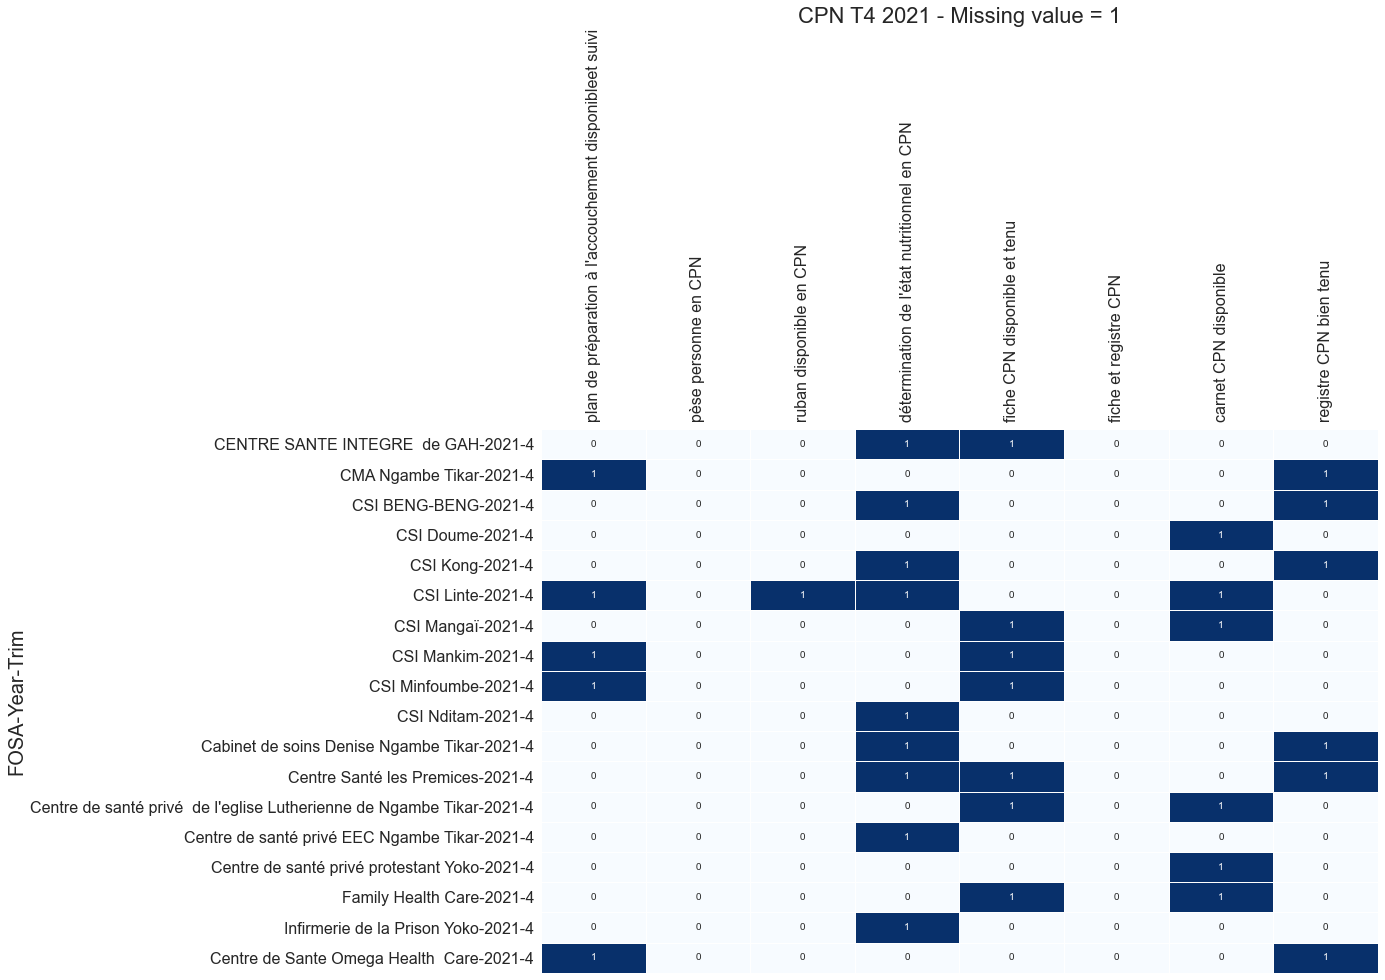

In [115]:
cpn_df_T4_2021 = cpn_df[(cpn_df["Year"] == "2021") & (cpn_df["Trim"] == "4")]
cpn_df_T4_2021 = cpn_df_T4_2021.set_index(["FOSA", "Year", "Trim"])
cpn_df_T4_2021 = cpn_df_T4_2021.isnull()
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.heatmap(cpn_df_T4_2021, annot=True, linewidths=.5, cmap="Blues", cbar=False)
ax1.set_title("CPN T4 2021 - Missing value = 1", fontsize=22)
ax1.tick_params(labelbottom=False,labeltop=True)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=16)
ax1.set_ylabel("FOSA-Year-Trim", fontsize=20)
plt.savefig("images/Missing_values/heatmap_missing_value_CPN")
plt.savefig("heatmap_missing_value_CPN.svg")
plt.show()

## Données manquantes - catégorie PF - 2021

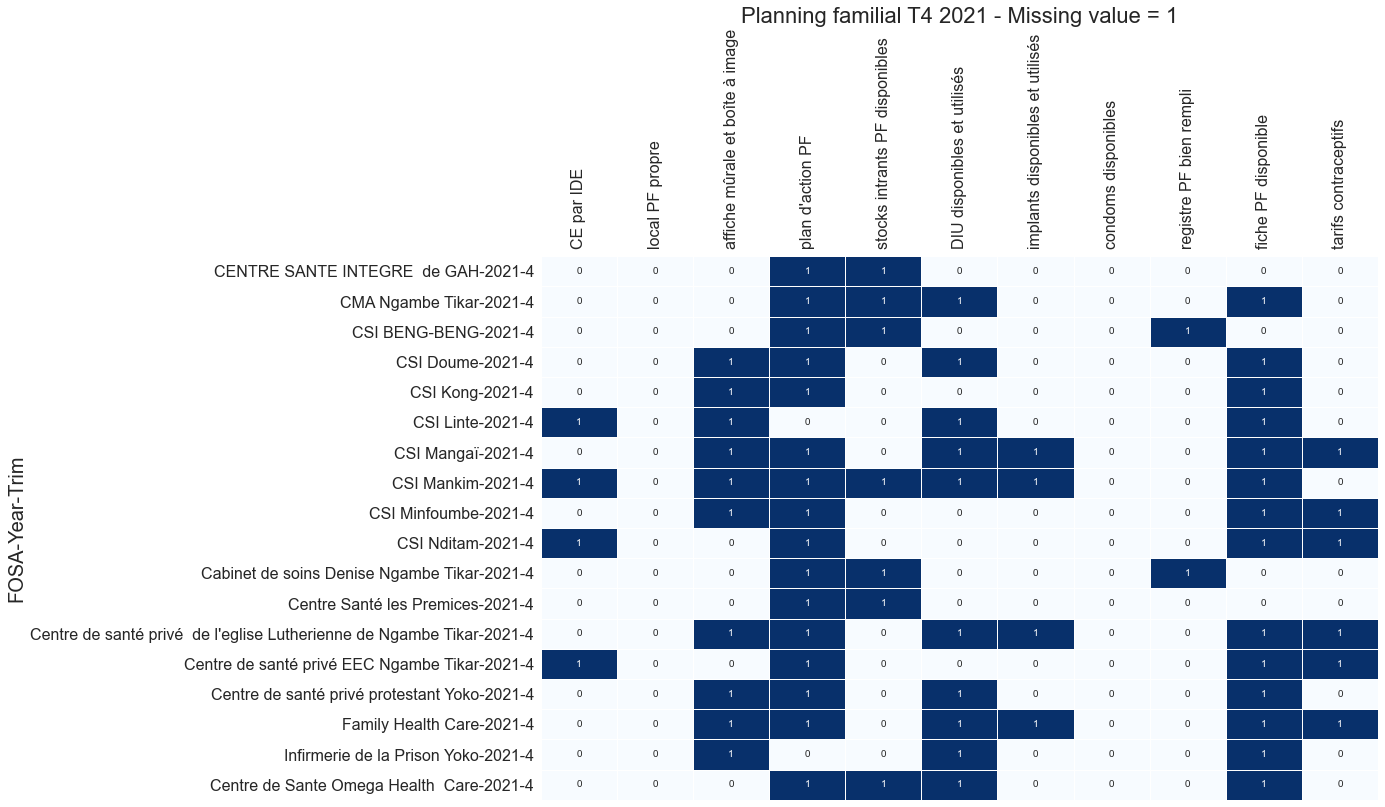

In [116]:
planning_df_T4_2021 = planning_df[(planning_df["Year"] == "2021") & (planning_df["Trim"] == "4")]
planning_df_T4_2021 = planning_df_T4_2021.set_index(["FOSA", "Year", "Trim"])
planning_df_T4_2021 = planning_df_T4_2021.isnull()
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.heatmap(planning_df_T4_2021, annot=True, linewidths=.5, cmap="Blues", cbar=False)
ax1.set_title("Planning familial T4 2021 - Missing value = 1", fontsize=22)
ax1.tick_params(labelbottom=False,labeltop=True)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=16)
ax1.set_ylabel("FOSA-Year-Trim", fontsize=20)
plt.savefig("images/Missing_values/heatmap_missing_value_Planning")
plt.savefig("heatmap_missing_value_Planning.svg")
plt.show()

## Données manquantes - catégorie maternité - 2021

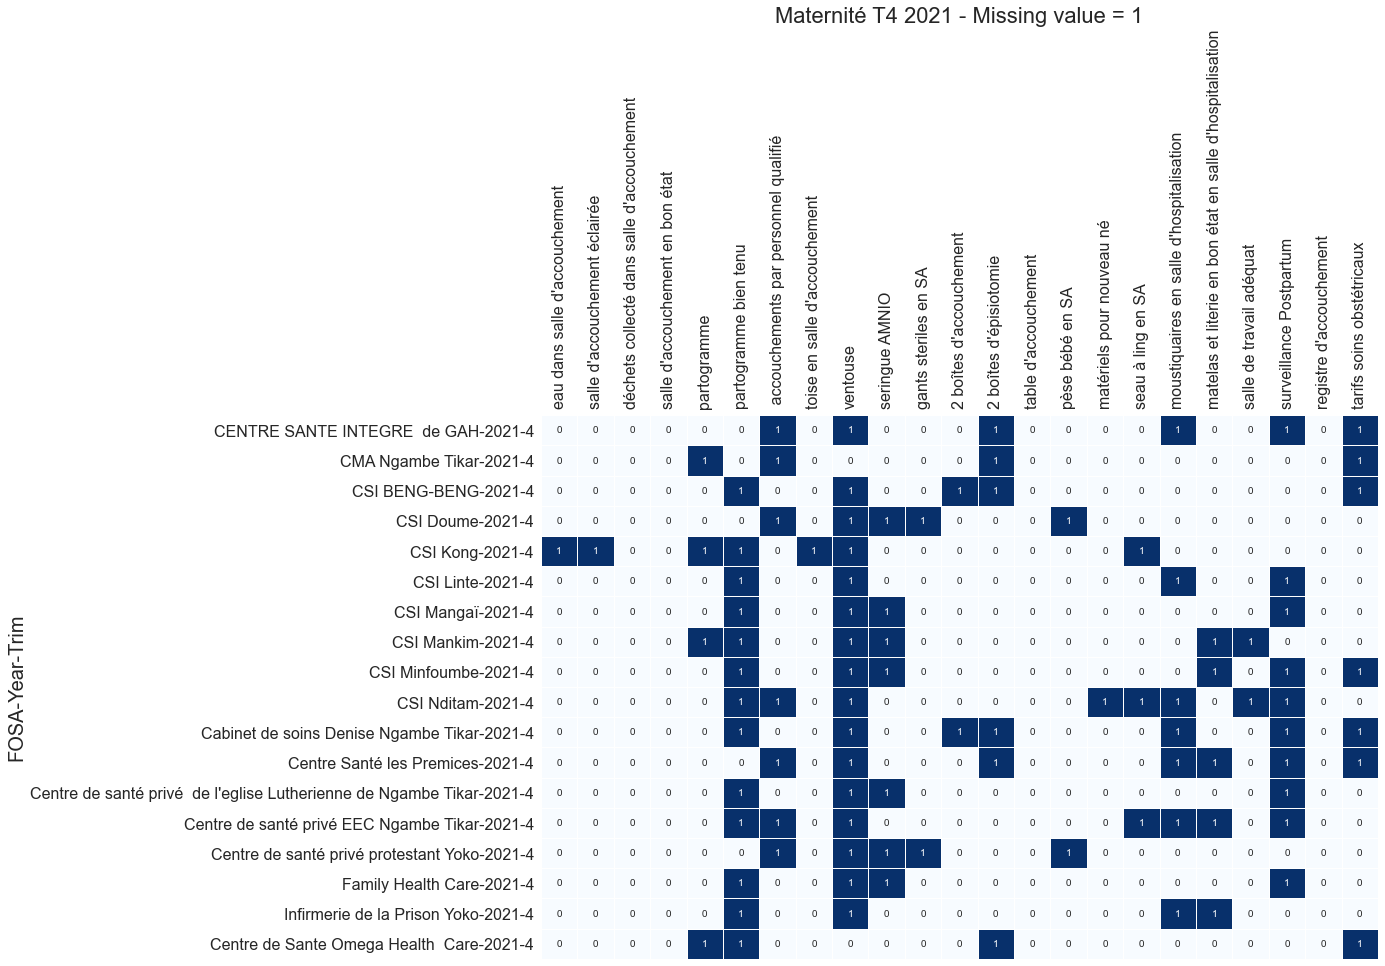

In [117]:
maternite_df_T4_2021 = maternite_df[(maternite_df["Year"] == "2021") & (maternite_df["Trim"] == "4")]
maternite_df_T4_2021 = maternite_df_T4_2021.set_index(["FOSA", "Year", "Trim"])
maternite_df_T4_2021 = maternite_df_T4_2021.isnull()
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.heatmap(maternite_df_T4_2021, annot=True, linewidths=.5, cmap="Blues", cbar=False)
ax1.set_title("Maternité T4 2021 - Missing value = 1", fontsize=22)
ax1.tick_params(labelbottom=False,labeltop=True)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(),fontsize=16)
ax1.set_ylabel("FOSA-Year-Trim", fontsize=20)
plt.savefig("images/Missing_values/heatmap_missing_value_Maternite")
plt.savefig("heatmap_missing_value_Maternite.svg")
plt.show()

In [118]:
#
#petite_chirurgie_df = get_dataframe(scores, indicateurs_petite_chirurgie_list, indicateurs_FOSA_periode_list)
#petite_chirurgie_df = petite_chirurgie_df.drop(columns=["Trimestre", "période"], axis=1)
#petite_chirurgie_df_melt = petite_chirurgie_df.melt(id_vars=["FOSA", "Year", "Trim"])
#petite_chirurgie_df_melt = petite_chirurgie_df_melt[(petite_chirurgie_df_melt["Year"] == "2021") & (petite_chirurgie_df_melt["Trim"] == "4")]
#petite_chirurgie_df_melt = petite_chirurgie_df_melt.fillna(0)
#g = sns.FacetGrid(petite_chirurgie_df_melt, col = "variable", col_wrap = 4, sharex=False)
#g.map_dataframe(sns.barplot, x="value", y="FOSA")
#g.add_legend(loc='upper right', fontsize=20);
#g.set_titles(col_template='{col_name}')
#g.savefig("images/Performance_evolution/" + "petite_chirurgie_detail_2")